### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, r2_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

C:\Users\vijay\anaconda3\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


### Reading CSV File

In [2]:
df = pd.read_csv('Copper_Cleaned.csv')

In [3]:
df.head()

,quantity tons,country,status,application,thickness,width,material_ref,selling_price,purchased_month,purchased_year,delivered_month,delivered_year,item_type_PL,item_type_S,item_type_W
0,5.64,28,1,1.71,0.69,992.83,4329,15.26,4.0,2021.0,7.0,2021.0,0,0,1
1,4.71,27,1,1.71,0.38,685.97,4243,15.83,4.0,2021.0,7.0,2021.0,0,1,0
2,6.28,30,1,2.25,0.38,846.64,7471,16.63,4.0,2021.0,4.0,2021.0,0,0,1
3,4.00,30,1,1.71,0.31,615.86,2143,17.20,4.0,2021.0,7.0,2021.0,0,0,1
4,6.18,30,1,2.25,0.38,846.64,5577,16.63,4.0,2021.0,4.0,2021.0,0,0,1


In [4]:
df.status.value_counts()

status
1    47136
0     6540
Name: count, dtype: int64

### SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

X = df.drop(['status'], axis = 1)
y = df['status']

In [6]:
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(X, y)

In [7]:
X.shape

(94272, 14)

In [8]:
y.shape

(94272,)

### Model

In [9]:
def run_classification(pipeline, param_grid, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)
    
    X_train = pipeline.named_steps['scaler'].fit_transform(X_train)
    
    X_test = pipeline.named_steps['scaler'].transform(X_test)
    
    grid = GridSearchCV(pipeline, param_grid, cv = 5, scoring='accuracy')
    
    grid.fit(X_train, y_train)
    
    print('\nBest Parameters: ',grid.best_params_)
    
    y_pred = grid.predict(X_test)
    
    print('\nClassification Report:\n',classification_report(y_test, y_pred))
    
    print('\nR2 Score: ', r2_score(y_test, y_pred))
    
    y_pred_proba = grid.predict_proba(X_test)[:,1]
    
    print('\nAUC Score: ',roc_auc_score(y_test, y_pred_proba))
    
    ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

### Logistic Regression


Best Parameters:  {'lr__C': 10, 'lr__penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74     14141
           1       0.74      0.74      0.74     14141

    accuracy                           0.74     28282
   macro avg       0.74      0.74      0.74     28282
weighted avg       0.74      0.74      0.74     28282


R2 Score:  -0.032317375008839466

AUC Score:  0.825766684000617


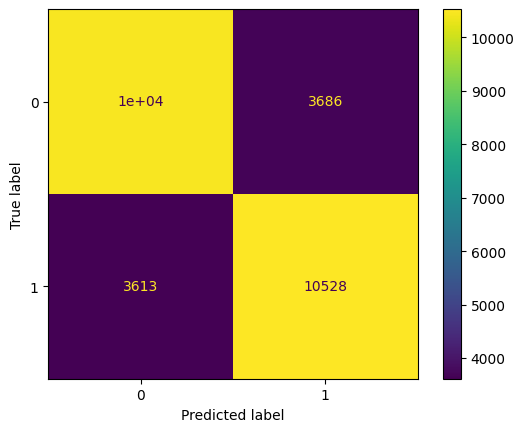

In [10]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

param_grid_lr = {'lr__penalty': ['l2'],
              'lr__C': [0.001,0.01,0.1,1,10,100]}

run_classification(pipeline, param_grid_lr, X, y)

### XGBClassifier


Best Parameters:  {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     14141
           1       0.98      0.97      0.98     14141

    accuracy                           0.98     28282
   macro avg       0.98      0.98      0.98     28282
weighted avg       0.98      0.98      0.98     28282


R2 Score:  0.9031185913301747

AUC Score:  0.996482482604294


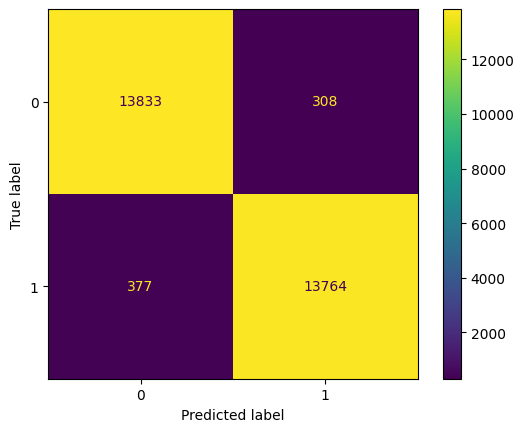

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

param_grid_xgb = {'xgb__learning_rate': [0.01, 0.1, 0.2],
                 'xgb__n_estimators': [50, 100 ,200],
                 'xgb__max_depth': [3, 5, 7]}

run_classification(pipeline, param_grid_xgb, X, y)

### Extra Trees Classifier


Best Parameters:  {'et__max_depth': None, 'et__min_samples_leaf': 1, 'et__min_samples_split': 2, 'et__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     14141
           1       0.99      0.98      0.98     14141

    accuracy                           0.98     28282
   macro avg       0.98      0.98      0.98     28282
weighted avg       0.98      0.98      0.98     28282


R2 Score:  0.938193904250053

AUC Score:  0.9982706997830316


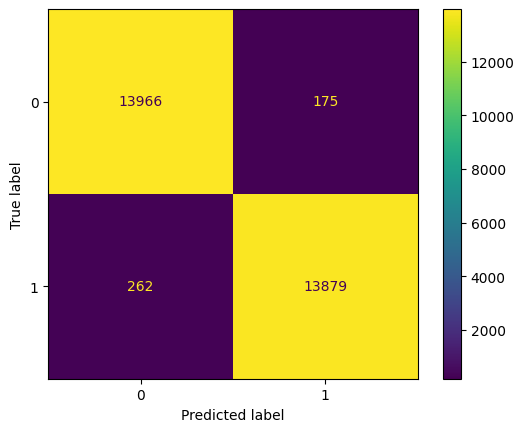

In [12]:
pipeline_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])

param_grid_et = {
    'et__n_estimators': [50, 100],
    'et__max_depth': [None, 5, 10],
    'et__min_samples_split': [2, 5],
    'et__min_samples_leaf': [1, 2]
}

run_classification(pipeline_et, param_grid_et, X, y)

### LGBM Classifier

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 26396, number of neg

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2619
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2619
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2619
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2619
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, numb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosi

[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2620
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 26396, number of negative: 26396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 52792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

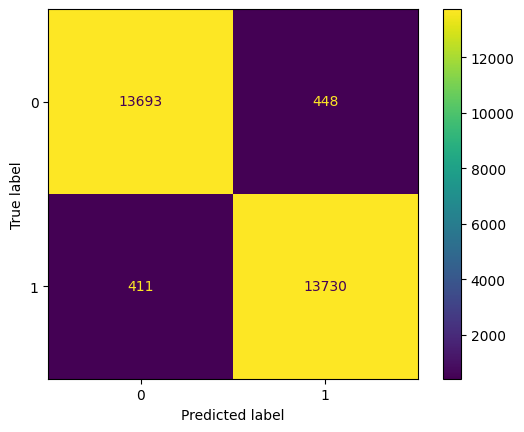

In [13]:
classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier())
])

classification_param_grid = {
    'lgbm__n_estimators': [100, 200, 300],
    'lgbm__learning_rate': [0.01, 0.1, 0.2],
    'lgbm__max_depth': [3, 4, 5]
}

run_classification(classification_pipeline, classification_param_grid, X, y)

### CatBoost Classifier

0:	learn: 0.6914858	total: 165ms	remaining: 16.4s
1:	learn: 0.6899699	total: 175ms	remaining: 8.57s
2:	learn: 0.6883775	total: 181ms	remaining: 5.87s
3:	learn: 0.6867946	total: 188ms	remaining: 4.52s
4:	learn: 0.6852524	total: 195ms	remaining: 3.7s
5:	learn: 0.6837381	total: 201ms	remaining: 3.15s
6:	learn: 0.6822410	total: 207ms	remaining: 2.75s
7:	learn: 0.6807830	total: 213ms	remaining: 2.44s
8:	learn: 0.6793571	total: 218ms	remaining: 2.2s
9:	learn: 0.6779532	total: 224ms	remaining: 2.02s
10:	learn: 0.6766210	total: 229ms	remaining: 1.85s
11:	learn: 0.6752670	total: 235ms	remaining: 1.72s
12:	learn: 0.6739314	total: 240ms	remaining: 1.6s
13:	learn: 0.6726016	total: 245ms	remaining: 1.5s
14:	learn: 0.6713594	total: 250ms	remaining: 1.42s
15:	learn: 0.6701341	total: 256ms	remaining: 1.34s
16:	learn: 0.6688214	total: 261ms	remaining: 1.27s
17:	learn: 0.6676254	total: 266ms	remaining: 1.21s
18:	learn: 0.6664266	total: 272ms	remaining: 1.16s
19:	learn: 0.6651681	total: 276ms	remaining: 

90:	learn: 0.6097375	total: 421ms	remaining: 41.6ms
91:	learn: 0.6092395	total: 426ms	remaining: 37.1ms
92:	learn: 0.6087054	total: 432ms	remaining: 32.5ms
93:	learn: 0.6082221	total: 437ms	remaining: 27.9ms
94:	learn: 0.6077724	total: 441ms	remaining: 23.2ms
95:	learn: 0.6072548	total: 446ms	remaining: 18.6ms
96:	learn: 0.6068050	total: 450ms	remaining: 13.9ms
97:	learn: 0.6063450	total: 454ms	remaining: 9.26ms
98:	learn: 0.6059036	total: 458ms	remaining: 4.63ms
99:	learn: 0.6054029	total: 463ms	remaining: 0us
0:	learn: 0.6914918	total: 6.29ms	remaining: 623ms
1:	learn: 0.6899905	total: 12.1ms	remaining: 592ms
2:	learn: 0.6884312	total: 17.4ms	remaining: 562ms
3:	learn: 0.6868528	total: 22.6ms	remaining: 543ms
4:	learn: 0.6853192	total: 27.9ms	remaining: 530ms
5:	learn: 0.6838115	total: 32.9ms	remaining: 515ms
6:	learn: 0.6823146	total: 38.2ms	remaining: 508ms
7:	learn: 0.6808548	total: 42.8ms	remaining: 492ms
8:	learn: 0.6794260	total: 47ms	remaining: 476ms
9:	learn: 0.6780293	total:

85:	learn: 0.6130961	total: 392ms	remaining: 63.9ms
86:	learn: 0.6125263	total: 397ms	remaining: 59.3ms
87:	learn: 0.6120382	total: 401ms	remaining: 54.6ms
88:	learn: 0.6115022	total: 404ms	remaining: 50ms
89:	learn: 0.6109787	total: 408ms	remaining: 45.4ms
90:	learn: 0.6104598	total: 412ms	remaining: 40.8ms
91:	learn: 0.6099181	total: 418ms	remaining: 36.3ms
92:	learn: 0.6093859	total: 423ms	remaining: 31.8ms
93:	learn: 0.6089075	total: 428ms	remaining: 27.3ms
94:	learn: 0.6083798	total: 432ms	remaining: 22.7ms
95:	learn: 0.6078670	total: 437ms	remaining: 18.2ms
96:	learn: 0.6074293	total: 441ms	remaining: 13.6ms
97:	learn: 0.6069754	total: 445ms	remaining: 9.08ms
98:	learn: 0.6065362	total: 449ms	remaining: 4.54ms
99:	learn: 0.6060559	total: 455ms	remaining: 0us
0:	learn: 0.6914777	total: 6.5ms	remaining: 644ms
1:	learn: 0.6899712	total: 12.3ms	remaining: 604ms
2:	learn: 0.6883780	total: 17.5ms	remaining: 565ms
3:	learn: 0.6868102	total: 22ms	remaining: 527ms
4:	learn: 0.6852669	tota

87:	learn: 0.4346866	total: 422ms	remaining: 57.6ms
88:	learn: 0.4336330	total: 427ms	remaining: 52.8ms
89:	learn: 0.4325045	total: 432ms	remaining: 48ms
90:	learn: 0.4318129	total: 437ms	remaining: 43.3ms
91:	learn: 0.4309850	total: 442ms	remaining: 38.4ms
92:	learn: 0.4301676	total: 446ms	remaining: 33.5ms
93:	learn: 0.4290232	total: 450ms	remaining: 28.8ms
94:	learn: 0.4279024	total: 455ms	remaining: 24ms
95:	learn: 0.4271707	total: 460ms	remaining: 19.2ms
96:	learn: 0.4259456	total: 464ms	remaining: 14.4ms
97:	learn: 0.4253514	total: 468ms	remaining: 9.55ms
98:	learn: 0.4246611	total: 473ms	remaining: 4.78ms
99:	learn: 0.4241323	total: 478ms	remaining: 0us
0:	learn: 0.6773096	total: 5.93ms	remaining: 587ms
1:	learn: 0.6646884	total: 11.9ms	remaining: 582ms
2:	learn: 0.6531070	total: 17ms	remaining: 550ms
3:	learn: 0.6431875	total: 22.3ms	remaining: 536ms
4:	learn: 0.6351186	total: 27.6ms	remaining: 524ms
5:	learn: 0.6269982	total: 32.5ms	remaining: 509ms
6:	learn: 0.6203653	total: 

82:	learn: 0.4434822	total: 412ms	remaining: 84.4ms
83:	learn: 0.4416103	total: 417ms	remaining: 79.4ms
84:	learn: 0.4404466	total: 421ms	remaining: 74.3ms
85:	learn: 0.4397438	total: 427ms	remaining: 69.5ms
86:	learn: 0.4389909	total: 431ms	remaining: 64.4ms
87:	learn: 0.4374190	total: 435ms	remaining: 59.3ms
88:	learn: 0.4363580	total: 439ms	remaining: 54.3ms
89:	learn: 0.4350987	total: 444ms	remaining: 49.3ms
90:	learn: 0.4345449	total: 449ms	remaining: 44.4ms
91:	learn: 0.4330015	total: 453ms	remaining: 39.4ms
92:	learn: 0.4321476	total: 457ms	remaining: 34.4ms
93:	learn: 0.4312474	total: 461ms	remaining: 29.4ms
94:	learn: 0.4307348	total: 466ms	remaining: 24.5ms
95:	learn: 0.4300306	total: 470ms	remaining: 19.6ms
96:	learn: 0.4290285	total: 474ms	remaining: 14.7ms
97:	learn: 0.4282654	total: 479ms	remaining: 9.77ms
98:	learn: 0.4277165	total: 484ms	remaining: 4.88ms
99:	learn: 0.4272086	total: 488ms	remaining: 0us
0:	learn: 0.6774288	total: 6.75ms	remaining: 668ms
1:	learn: 0.6652

42:	learn: 0.5002696	total: 206ms	remaining: 273ms
43:	learn: 0.4988468	total: 211ms	remaining: 268ms
44:	learn: 0.4948918	total: 216ms	remaining: 263ms
45:	learn: 0.4920543	total: 220ms	remaining: 258ms
46:	learn: 0.4901811	total: 225ms	remaining: 253ms
47:	learn: 0.4877204	total: 229ms	remaining: 248ms
48:	learn: 0.4856773	total: 234ms	remaining: 243ms
49:	learn: 0.4846053	total: 238ms	remaining: 238ms
50:	learn: 0.4832282	total: 242ms	remaining: 233ms
51:	learn: 0.4798544	total: 248ms	remaining: 229ms
52:	learn: 0.4775118	total: 252ms	remaining: 224ms
53:	learn: 0.4764945	total: 256ms	remaining: 218ms
54:	learn: 0.4755476	total: 260ms	remaining: 213ms
55:	learn: 0.4741385	total: 265ms	remaining: 208ms
56:	learn: 0.4724884	total: 269ms	remaining: 203ms
57:	learn: 0.4717162	total: 274ms	remaining: 198ms
58:	learn: 0.4703777	total: 278ms	remaining: 193ms
59:	learn: 0.4689969	total: 282ms	remaining: 188ms
60:	learn: 0.4673557	total: 287ms	remaining: 183ms
61:	learn: 0.4648122	total: 292

40:	learn: 0.4432422	total: 204ms	remaining: 294ms
41:	learn: 0.4414032	total: 209ms	remaining: 289ms
42:	learn: 0.4403696	total: 213ms	remaining: 283ms
43:	learn: 0.4370057	total: 218ms	remaining: 278ms
44:	learn: 0.4347974	total: 223ms	remaining: 272ms
45:	learn: 0.4322989	total: 228ms	remaining: 268ms
46:	learn: 0.4294037	total: 232ms	remaining: 262ms
47:	learn: 0.4272369	total: 237ms	remaining: 257ms
48:	learn: 0.4249841	total: 241ms	remaining: 251ms
49:	learn: 0.4236703	total: 246ms	remaining: 246ms
50:	learn: 0.4222992	total: 251ms	remaining: 241ms
51:	learn: 0.4205670	total: 255ms	remaining: 235ms
52:	learn: 0.4177133	total: 260ms	remaining: 231ms
53:	learn: 0.4163260	total: 265ms	remaining: 226ms
54:	learn: 0.4148775	total: 270ms	remaining: 221ms
55:	learn: 0.4140031	total: 275ms	remaining: 216ms
56:	learn: 0.4126719	total: 279ms	remaining: 211ms
57:	learn: 0.4106965	total: 284ms	remaining: 206ms
58:	learn: 0.4084731	total: 289ms	remaining: 201ms
59:	learn: 0.4069483	total: 293

0:	learn: 0.6633443	total: 7.08ms	remaining: 701ms
1:	learn: 0.6415776	total: 14ms	remaining: 686ms
2:	learn: 0.6244195	total: 19.3ms	remaining: 623ms
3:	learn: 0.6126782	total: 24.7ms	remaining: 592ms
4:	learn: 0.6014635	total: 30.7ms	remaining: 584ms
5:	learn: 0.5926546	total: 37.2ms	remaining: 582ms
6:	learn: 0.5810394	total: 42.9ms	remaining: 569ms
7:	learn: 0.5740398	total: 48.6ms	remaining: 559ms
8:	learn: 0.5680043	total: 54ms	remaining: 546ms
9:	learn: 0.5635881	total: 59.2ms	remaining: 533ms
10:	learn: 0.5546874	total: 65.7ms	remaining: 531ms
11:	learn: 0.5478112	total: 71.7ms	remaining: 526ms
12:	learn: 0.5423635	total: 76.9ms	remaining: 515ms
13:	learn: 0.5384620	total: 81.6ms	remaining: 501ms
14:	learn: 0.5344908	total: 86.9ms	remaining: 493ms
15:	learn: 0.5299454	total: 92.3ms	remaining: 485ms
16:	learn: 0.5214525	total: 98.5ms	remaining: 481ms
17:	learn: 0.5159456	total: 103ms	remaining: 471ms
18:	learn: 0.5129013	total: 109ms	remaining: 463ms
19:	learn: 0.5091353	total: 

80:	learn: 0.3756766	total: 409ms	remaining: 95.9ms
81:	learn: 0.3743077	total: 414ms	remaining: 90.9ms
82:	learn: 0.3732885	total: 418ms	remaining: 85.6ms
83:	learn: 0.3717970	total: 423ms	remaining: 80.5ms
84:	learn: 0.3701620	total: 427ms	remaining: 75.3ms
85:	learn: 0.3689675	total: 432ms	remaining: 70.3ms
86:	learn: 0.3680142	total: 437ms	remaining: 65.2ms
87:	learn: 0.3667917	total: 442ms	remaining: 60.2ms
88:	learn: 0.3662585	total: 447ms	remaining: 55.2ms
89:	learn: 0.3651319	total: 451ms	remaining: 50.1ms
90:	learn: 0.3636761	total: 456ms	remaining: 45.1ms
91:	learn: 0.3618928	total: 461ms	remaining: 40.1ms
92:	learn: 0.3608675	total: 465ms	remaining: 35ms
93:	learn: 0.3600812	total: 470ms	remaining: 30ms
94:	learn: 0.3591894	total: 474ms	remaining: 25ms
95:	learn: 0.3582860	total: 479ms	remaining: 20ms
96:	learn: 0.3569016	total: 483ms	remaining: 14.9ms
97:	learn: 0.3555839	total: 488ms	remaining: 9.96ms
98:	learn: 0.3545077	total: 492ms	remaining: 4.97ms
99:	learn: 0.3539850

151:	learn: 0.5560079	total: 1.48s	remaining: 468ms
152:	learn: 0.5556652	total: 1.49s	remaining: 458ms
153:	learn: 0.5552999	total: 1.5s	remaining: 448ms
154:	learn: 0.5550139	total: 1.51s	remaining: 438ms
155:	learn: 0.5547374	total: 1.52s	remaining: 428ms
156:	learn: 0.5544848	total: 1.53s	remaining: 419ms
157:	learn: 0.5541553	total: 1.54s	remaining: 409ms
158:	learn: 0.5528024	total: 1.55s	remaining: 399ms
159:	learn: 0.5524628	total: 1.56s	remaining: 389ms
160:	learn: 0.5521708	total: 1.57s	remaining: 380ms
161:	learn: 0.5519033	total: 1.58s	remaining: 370ms
162:	learn: 0.5515547	total: 1.59s	remaining: 360ms
163:	learn: 0.5510706	total: 1.6s	remaining: 350ms
164:	learn: 0.5507116	total: 1.6s	remaining: 340ms
165:	learn: 0.5503917	total: 1.61s	remaining: 331ms
166:	learn: 0.5490685	total: 1.63s	remaining: 321ms
167:	learn: 0.5487403	total: 1.64s	remaining: 311ms
168:	learn: 0.5483908	total: 1.64s	remaining: 302ms
169:	learn: 0.5481773	total: 1.65s	remaining: 292ms
170:	learn: 0.5

129:	learn: 0.5708669	total: 1.27s	remaining: 685ms
130:	learn: 0.5704307	total: 1.28s	remaining: 675ms
131:	learn: 0.5700068	total: 1.29s	remaining: 665ms
132:	learn: 0.5683164	total: 1.3s	remaining: 656ms
133:	learn: 0.5679070	total: 1.31s	remaining: 646ms
134:	learn: 0.5673047	total: 1.32s	remaining: 636ms
135:	learn: 0.5669759	total: 1.33s	remaining: 626ms
136:	learn: 0.5666540	total: 1.34s	remaining: 616ms
137:	learn: 0.5647516	total: 1.35s	remaining: 607ms
138:	learn: 0.5643983	total: 1.36s	remaining: 597ms
139:	learn: 0.5640028	total: 1.37s	remaining: 586ms
140:	learn: 0.5636056	total: 1.38s	remaining: 577ms
141:	learn: 0.5632529	total: 1.39s	remaining: 567ms
142:	learn: 0.5628712	total: 1.4s	remaining: 557ms
143:	learn: 0.5611049	total: 1.41s	remaining: 548ms
144:	learn: 0.5607429	total: 1.42s	remaining: 538ms
145:	learn: 0.5604316	total: 1.43s	remaining: 528ms
146:	learn: 0.5600607	total: 1.44s	remaining: 518ms
147:	learn: 0.5596945	total: 1.45s	remaining: 508ms
148:	learn: 0.

106:	learn: 0.5839665	total: 1.03s	remaining: 895ms
107:	learn: 0.5835381	total: 1.04s	remaining: 886ms
108:	learn: 0.5830986	total: 1.05s	remaining: 876ms
109:	learn: 0.5826897	total: 1.06s	remaining: 866ms
110:	learn: 0.5822624	total: 1.07s	remaining: 856ms
111:	learn: 0.5818484	total: 1.07s	remaining: 845ms
112:	learn: 0.5800499	total: 1.09s	remaining: 837ms
113:	learn: 0.5796263	total: 1.1s	remaining: 827ms
114:	learn: 0.5778533	total: 1.11s	remaining: 818ms
115:	learn: 0.5774939	total: 1.11s	remaining: 808ms
116:	learn: 0.5770620	total: 1.12s	remaining: 798ms
117:	learn: 0.5752708	total: 1.14s	remaining: 789ms
118:	learn: 0.5748608	total: 1.14s	remaining: 779ms
119:	learn: 0.5745146	total: 1.15s	remaining: 770ms
120:	learn: 0.5741514	total: 1.16s	remaining: 760ms
121:	learn: 0.5738000	total: 1.17s	remaining: 750ms
122:	learn: 0.5734077	total: 1.18s	remaining: 741ms
123:	learn: 0.5730324	total: 1.19s	remaining: 731ms
124:	learn: 0.5725867	total: 1.2s	remaining: 722ms
125:	learn: 0.

66:	learn: 0.6119900	total: 646ms	remaining: 1.28s
67:	learn: 0.6112310	total: 655ms	remaining: 1.27s
68:	learn: 0.6106509	total: 665ms	remaining: 1.26s
69:	learn: 0.6099395	total: 674ms	remaining: 1.25s
70:	learn: 0.6092541	total: 683ms	remaining: 1.24s
71:	learn: 0.6086370	total: 692ms	remaining: 1.23s
72:	learn: 0.6079669	total: 701ms	remaining: 1.22s
73:	learn: 0.6070276	total: 712ms	remaining: 1.21s
74:	learn: 0.6063455	total: 721ms	remaining: 1.2s
75:	learn: 0.6057621	total: 730ms	remaining: 1.19s
76:	learn: 0.6051971	total: 739ms	remaining: 1.18s
77:	learn: 0.6043028	total: 750ms	remaining: 1.17s
78:	learn: 0.6036894	total: 760ms	remaining: 1.16s
79:	learn: 0.6030816	total: 769ms	remaining: 1.15s
80:	learn: 0.6025036	total: 778ms	remaining: 1.14s
81:	learn: 0.6019469	total: 788ms	remaining: 1.13s
82:	learn: 0.6014023	total: 798ms	remaining: 1.12s
83:	learn: 0.6008303	total: 808ms	remaining: 1.11s
84:	learn: 0.6002557	total: 818ms	remaining: 1.11s
85:	learn: 0.5997214	total: 828m

43:	learn: 0.6332559	total: 419ms	remaining: 1.49s
44:	learn: 0.6319917	total: 430ms	remaining: 1.48s
45:	learn: 0.6309488	total: 441ms	remaining: 1.48s
46:	learn: 0.6300964	total: 451ms	remaining: 1.47s
47:	learn: 0.6290920	total: 460ms	remaining: 1.46s
48:	learn: 0.6278996	total: 472ms	remaining: 1.45s
49:	learn: 0.6269241	total: 480ms	remaining: 1.44s
50:	learn: 0.6259724	total: 489ms	remaining: 1.43s
51:	learn: 0.6250376	total: 498ms	remaining: 1.42s
52:	learn: 0.6241213	total: 506ms	remaining: 1.4s
53:	learn: 0.6231956	total: 517ms	remaining: 1.4s
54:	learn: 0.6223091	total: 526ms	remaining: 1.39s
55:	learn: 0.6215461	total: 535ms	remaining: 1.38s
56:	learn: 0.6207845	total: 543ms	remaining: 1.36s
57:	learn: 0.6200434	total: 552ms	remaining: 1.35s
58:	learn: 0.6192090	total: 561ms	remaining: 1.34s
59:	learn: 0.6184648	total: 570ms	remaining: 1.33s
60:	learn: 0.6176955	total: 579ms	remaining: 1.32s
61:	learn: 0.6170130	total: 588ms	remaining: 1.31s
62:	learn: 0.6159554	total: 598ms

21:	learn: 0.5215893	total: 218ms	remaining: 1.77s
22:	learn: 0.5188305	total: 228ms	remaining: 1.75s
23:	learn: 0.5152247	total: 237ms	remaining: 1.74s
24:	learn: 0.5109908	total: 247ms	remaining: 1.73s
25:	learn: 0.5085503	total: 257ms	remaining: 1.72s
26:	learn: 0.5059842	total: 265ms	remaining: 1.7s
27:	learn: 0.5044424	total: 276ms	remaining: 1.69s
28:	learn: 0.5013233	total: 285ms	remaining: 1.68s
29:	learn: 0.4997469	total: 294ms	remaining: 1.67s
30:	learn: 0.4973154	total: 303ms	remaining: 1.65s
31:	learn: 0.4951085	total: 314ms	remaining: 1.65s
32:	learn: 0.4936978	total: 323ms	remaining: 1.63s
33:	learn: 0.4888722	total: 332ms	remaining: 1.62s
34:	learn: 0.4872482	total: 340ms	remaining: 1.6s
35:	learn: 0.4859919	total: 348ms	remaining: 1.59s
36:	learn: 0.4835572	total: 358ms	remaining: 1.58s
37:	learn: 0.4806053	total: 369ms	remaining: 1.57s
38:	learn: 0.4793353	total: 379ms	remaining: 1.56s
39:	learn: 0.4753285	total: 389ms	remaining: 1.55s
40:	learn: 0.4744632	total: 397ms

195:	learn: 0.3291722	total: 1.87s	remaining: 38.2ms
196:	learn: 0.3287402	total: 1.88s	remaining: 28.7ms
197:	learn: 0.3283848	total: 1.89s	remaining: 19.1ms
198:	learn: 0.3279029	total: 1.9s	remaining: 9.56ms
199:	learn: 0.3275199	total: 1.91s	remaining: 0us
0:	learn: 0.6749572	total: 13.6ms	remaining: 2.71s
1:	learn: 0.6599628	total: 24ms	remaining: 2.37s
2:	learn: 0.6455208	total: 36ms	remaining: 2.36s
3:	learn: 0.6356013	total: 46.6ms	remaining: 2.29s
4:	learn: 0.6249955	total: 56ms	remaining: 2.18s
5:	learn: 0.6167113	total: 65.5ms	remaining: 2.12s
6:	learn: 0.6081060	total: 76.5ms	remaining: 2.11s
7:	learn: 0.6027192	total: 86.7ms	remaining: 2.08s
8:	learn: 0.5826504	total: 98.2ms	remaining: 2.08s
9:	learn: 0.5778136	total: 107ms	remaining: 2.04s
10:	learn: 0.5736123	total: 116ms	remaining: 1.99s
11:	learn: 0.5689563	total: 125ms	remaining: 1.96s
12:	learn: 0.5654833	total: 136ms	remaining: 1.95s
13:	learn: 0.5515822	total: 147ms	remaining: 1.96s
14:	learn: 0.5485210	total: 157m

170:	learn: 0.3424694	total: 1.68s	remaining: 285ms
171:	learn: 0.3417554	total: 1.69s	remaining: 275ms
172:	learn: 0.3413256	total: 1.7s	remaining: 266ms
173:	learn: 0.3403283	total: 1.71s	remaining: 256ms
174:	learn: 0.3389731	total: 1.72s	remaining: 246ms
175:	learn: 0.3384387	total: 1.73s	remaining: 236ms
176:	learn: 0.3367372	total: 1.74s	remaining: 226ms
177:	learn: 0.3362222	total: 1.75s	remaining: 217ms
178:	learn: 0.3355197	total: 1.76s	remaining: 207ms
179:	learn: 0.3347604	total: 1.77s	remaining: 197ms
180:	learn: 0.3343414	total: 1.78s	remaining: 187ms
181:	learn: 0.3338405	total: 1.79s	remaining: 177ms
182:	learn: 0.3336176	total: 1.8s	remaining: 167ms
183:	learn: 0.3332604	total: 1.81s	remaining: 157ms
184:	learn: 0.3327077	total: 1.82s	remaining: 147ms
185:	learn: 0.3318844	total: 1.83s	remaining: 138ms
186:	learn: 0.3314345	total: 1.84s	remaining: 128ms
187:	learn: 0.3309161	total: 1.84s	remaining: 118ms
188:	learn: 0.3305671	total: 1.85s	remaining: 108ms
189:	learn: 0.

148:	learn: 0.3558656	total: 1.47s	remaining: 503ms
149:	learn: 0.3547268	total: 1.48s	remaining: 494ms
150:	learn: 0.3539085	total: 1.49s	remaining: 484ms
151:	learn: 0.3534302	total: 1.5s	remaining: 474ms
152:	learn: 0.3530442	total: 1.51s	remaining: 464ms
153:	learn: 0.3526549	total: 1.52s	remaining: 455ms
154:	learn: 0.3522043	total: 1.53s	remaining: 444ms
155:	learn: 0.3515762	total: 1.54s	remaining: 434ms
156:	learn: 0.3509917	total: 1.55s	remaining: 424ms
157:	learn: 0.3504974	total: 1.56s	remaining: 414ms
158:	learn: 0.3499474	total: 1.57s	remaining: 404ms
159:	learn: 0.3487842	total: 1.58s	remaining: 394ms
160:	learn: 0.3481042	total: 1.59s	remaining: 384ms
161:	learn: 0.3476181	total: 1.6s	remaining: 375ms
162:	learn: 0.3472407	total: 1.6s	remaining: 364ms
163:	learn: 0.3462467	total: 1.61s	remaining: 355ms
164:	learn: 0.3452018	total: 1.63s	remaining: 345ms
165:	learn: 0.3439348	total: 1.64s	remaining: 335ms
166:	learn: 0.3432582	total: 1.64s	remaining: 325ms
167:	learn: 0.3

126:	learn: 0.3793191	total: 1.24s	remaining: 710ms
127:	learn: 0.3784867	total: 1.25s	remaining: 700ms
128:	learn: 0.3776015	total: 1.25s	remaining: 691ms
129:	learn: 0.3770432	total: 1.26s	remaining: 680ms
130:	learn: 0.3752469	total: 1.27s	remaining: 671ms
131:	learn: 0.3733273	total: 1.28s	remaining: 662ms
132:	learn: 0.3724433	total: 1.29s	remaining: 653ms
133:	learn: 0.3719984	total: 1.3s	remaining: 643ms
134:	learn: 0.3714163	total: 1.31s	remaining: 633ms
135:	learn: 0.3708674	total: 1.32s	remaining: 623ms
136:	learn: 0.3684445	total: 1.33s	remaining: 614ms
137:	learn: 0.3676022	total: 1.34s	remaining: 605ms
138:	learn: 0.3664196	total: 1.35s	remaining: 595ms
139:	learn: 0.3658322	total: 1.36s	remaining: 585ms
140:	learn: 0.3655476	total: 1.37s	remaining: 575ms
141:	learn: 0.3650734	total: 1.38s	remaining: 565ms
142:	learn: 0.3639869	total: 1.39s	remaining: 555ms
143:	learn: 0.3634985	total: 1.4s	remaining: 546ms
144:	learn: 0.3626570	total: 1.41s	remaining: 536ms
145:	learn: 0.

87:	learn: 0.4124330	total: 861ms	remaining: 1.09s
88:	learn: 0.4113857	total: 869ms	remaining: 1.08s
89:	learn: 0.4099093	total: 880ms	remaining: 1.07s
90:	learn: 0.4093008	total: 890ms	remaining: 1.07s
91:	learn: 0.4071621	total: 900ms	remaining: 1.06s
92:	learn: 0.4063428	total: 910ms	remaining: 1.05s
93:	learn: 0.4051030	total: 921ms	remaining: 1.04s
94:	learn: 0.4043226	total: 929ms	remaining: 1.03s
95:	learn: 0.4035550	total: 938ms	remaining: 1.01s
96:	learn: 0.4025966	total: 946ms	remaining: 1s
97:	learn: 0.4014653	total: 958ms	remaining: 997ms
98:	learn: 0.3989393	total: 969ms	remaining: 989ms
99:	learn: 0.3979851	total: 980ms	remaining: 980ms
100:	learn: 0.3971375	total: 989ms	remaining: 970ms
101:	learn: 0.3966788	total: 1s	remaining: 961ms
102:	learn: 0.3959426	total: 1.01s	remaining: 951ms
103:	learn: 0.3953715	total: 1.02s	remaining: 941ms
104:	learn: 0.3946796	total: 1.03s	remaining: 932ms
105:	learn: 0.3941481	total: 1.04s	remaining: 923ms
106:	learn: 0.3933844	total: 1.

63:	learn: 0.3667117	total: 640ms	remaining: 1.36s
64:	learn: 0.3652003	total: 649ms	remaining: 1.35s
65:	learn: 0.3645473	total: 659ms	remaining: 1.34s
66:	learn: 0.3632240	total: 669ms	remaining: 1.33s
67:	learn: 0.3615656	total: 679ms	remaining: 1.32s
68:	learn: 0.3605470	total: 689ms	remaining: 1.31s
69:	learn: 0.3592504	total: 698ms	remaining: 1.3s
70:	learn: 0.3569321	total: 709ms	remaining: 1.29s
71:	learn: 0.3557257	total: 718ms	remaining: 1.27s
72:	learn: 0.3539494	total: 728ms	remaining: 1.26s
73:	learn: 0.3531162	total: 737ms	remaining: 1.25s
74:	learn: 0.3523439	total: 748ms	remaining: 1.25s
75:	learn: 0.3511230	total: 758ms	remaining: 1.24s
76:	learn: 0.3502593	total: 768ms	remaining: 1.23s
77:	learn: 0.3492309	total: 778ms	remaining: 1.22s
78:	learn: 0.3481050	total: 787ms	remaining: 1.21s
79:	learn: 0.3469839	total: 797ms	remaining: 1.2s
80:	learn: 0.3459822	total: 806ms	remaining: 1.18s
81:	learn: 0.3442495	total: 815ms	remaining: 1.17s
82:	learn: 0.3433211	total: 824ms

42:	learn: 0.4101865	total: 423ms	remaining: 1.54s
43:	learn: 0.4081444	total: 432ms	remaining: 1.53s
44:	learn: 0.4056594	total: 442ms	remaining: 1.52s
45:	learn: 0.4037454	total: 452ms	remaining: 1.51s
46:	learn: 0.4026730	total: 463ms	remaining: 1.5s
47:	learn: 0.4007234	total: 472ms	remaining: 1.5s
48:	learn: 0.3989578	total: 483ms	remaining: 1.49s
49:	learn: 0.3967046	total: 493ms	remaining: 1.48s
50:	learn: 0.3951028	total: 503ms	remaining: 1.47s
51:	learn: 0.3936561	total: 513ms	remaining: 1.46s
52:	learn: 0.3906656	total: 522ms	remaining: 1.45s
53:	learn: 0.3890283	total: 532ms	remaining: 1.44s
54:	learn: 0.3879686	total: 542ms	remaining: 1.43s
55:	learn: 0.3865180	total: 552ms	remaining: 1.42s
56:	learn: 0.3845374	total: 561ms	remaining: 1.41s
57:	learn: 0.3835668	total: 571ms	remaining: 1.4s
58:	learn: 0.3792497	total: 583ms	remaining: 1.39s
59:	learn: 0.3779197	total: 594ms	remaining: 1.39s
60:	learn: 0.3766046	total: 603ms	remaining: 1.37s
61:	learn: 0.3747442	total: 612ms	

20:	learn: 0.4727332	total: 219ms	remaining: 1.86s
21:	learn: 0.4674484	total: 229ms	remaining: 1.85s
22:	learn: 0.4653415	total: 240ms	remaining: 1.84s
23:	learn: 0.4627294	total: 249ms	remaining: 1.83s
24:	learn: 0.4596819	total: 259ms	remaining: 1.81s
25:	learn: 0.4560918	total: 269ms	remaining: 1.8s
26:	learn: 0.4541801	total: 278ms	remaining: 1.78s
27:	learn: 0.4485960	total: 288ms	remaining: 1.77s
28:	learn: 0.4439635	total: 299ms	remaining: 1.76s
29:	learn: 0.4411759	total: 310ms	remaining: 1.75s
30:	learn: 0.4388843	total: 319ms	remaining: 1.74s
31:	learn: 0.4368561	total: 327ms	remaining: 1.72s
32:	learn: 0.4347969	total: 336ms	remaining: 1.7s
33:	learn: 0.4324170	total: 347ms	remaining: 1.69s
34:	learn: 0.4311552	total: 358ms	remaining: 1.69s
35:	learn: 0.4295423	total: 369ms	remaining: 1.68s
36:	learn: 0.4270487	total: 379ms	remaining: 1.67s
37:	learn: 0.4253436	total: 388ms	remaining: 1.65s
38:	learn: 0.4230885	total: 397ms	remaining: 1.64s
39:	learn: 0.4202726	total: 407ms

190:	learn: 0.2575831	total: 1.86s	remaining: 87.8ms
191:	learn: 0.2571750	total: 1.87s	remaining: 78ms
192:	learn: 0.2568692	total: 1.88s	remaining: 68.2ms
193:	learn: 0.2564078	total: 1.89s	remaining: 58.5ms
194:	learn: 0.2555327	total: 1.9s	remaining: 48.7ms
195:	learn: 0.2541460	total: 1.91s	remaining: 39ms
196:	learn: 0.2536908	total: 1.92s	remaining: 29.2ms
197:	learn: 0.2533148	total: 1.93s	remaining: 19.5ms
198:	learn: 0.2528030	total: 1.94s	remaining: 9.75ms
199:	learn: 0.2525068	total: 1.95s	remaining: 0us
0:	learn: 0.6592892	total: 16.3ms	remaining: 3.24s
1:	learn: 0.6369168	total: 28.3ms	remaining: 2.8s
2:	learn: 0.6145506	total: 40.9ms	remaining: 2.68s
3:	learn: 0.6003747	total: 51.8ms	remaining: 2.54s
4:	learn: 0.5881406	total: 64.5ms	remaining: 2.52s
5:	learn: 0.5589410	total: 76.6ms	remaining: 2.48s
6:	learn: 0.5518050	total: 87.3ms	remaining: 2.4s
7:	learn: 0.5329846	total: 98.6ms	remaining: 2.37s
8:	learn: 0.5264500	total: 110ms	remaining: 2.33s
9:	learn: 0.5216606	to

169:	learn: 0.2696521	total: 1.7s	remaining: 300ms
170:	learn: 0.2688158	total: 1.71s	remaining: 290ms
171:	learn: 0.2680535	total: 1.72s	remaining: 280ms
172:	learn: 0.2675491	total: 1.73s	remaining: 270ms
173:	learn: 0.2669831	total: 1.74s	remaining: 260ms
174:	learn: 0.2665963	total: 1.75s	remaining: 250ms
175:	learn: 0.2659633	total: 1.76s	remaining: 240ms
176:	learn: 0.2654968	total: 1.77s	remaining: 230ms
177:	learn: 0.2652667	total: 1.78s	remaining: 220ms
178:	learn: 0.2648898	total: 1.79s	remaining: 210ms
179:	learn: 0.2644974	total: 1.8s	remaining: 200ms
180:	learn: 0.2623914	total: 1.81s	remaining: 190ms
181:	learn: 0.2617449	total: 1.82s	remaining: 180ms
182:	learn: 0.2609852	total: 1.83s	remaining: 170ms
183:	learn: 0.2602973	total: 1.84s	remaining: 160ms
184:	learn: 0.2598044	total: 1.85s	remaining: 150ms
185:	learn: 0.2596010	total: 1.86s	remaining: 140ms
186:	learn: 0.2590344	total: 1.87s	remaining: 130ms
187:	learn: 0.2579194	total: 1.88s	remaining: 120ms
188:	learn: 0.

147:	learn: 0.2827632	total: 1.47s	remaining: 515ms
148:	learn: 0.2822053	total: 1.47s	remaining: 505ms
149:	learn: 0.2816276	total: 1.49s	remaining: 495ms
150:	learn: 0.2810540	total: 1.5s	remaining: 485ms
151:	learn: 0.2807934	total: 1.5s	remaining: 476ms
152:	learn: 0.2798297	total: 1.51s	remaining: 466ms
153:	learn: 0.2793527	total: 1.52s	remaining: 456ms
154:	learn: 0.2785993	total: 1.53s	remaining: 446ms
155:	learn: 0.2777020	total: 1.54s	remaining: 436ms
156:	learn: 0.2772930	total: 1.56s	remaining: 426ms
157:	learn: 0.2768506	total: 1.57s	remaining: 416ms
158:	learn: 0.2759059	total: 1.57s	remaining: 406ms
159:	learn: 0.2753355	total: 1.58s	remaining: 396ms
160:	learn: 0.2746400	total: 1.59s	remaining: 386ms
161:	learn: 0.2740580	total: 1.6s	remaining: 376ms
162:	learn: 0.2734672	total: 1.61s	remaining: 366ms
163:	learn: 0.2730202	total: 1.62s	remaining: 356ms
164:	learn: 0.2726269	total: 1.63s	remaining: 346ms
165:	learn: 0.2721340	total: 1.64s	remaining: 336ms
166:	learn: 0.2

107:	learn: 0.5823547	total: 1.03s	remaining: 1.83s
108:	learn: 0.5819213	total: 1.04s	remaining: 1.82s
109:	learn: 0.5814818	total: 1.05s	remaining: 1.81s
110:	learn: 0.5811055	total: 1.06s	remaining: 1.8s
111:	learn: 0.5806798	total: 1.06s	remaining: 1.79s
112:	learn: 0.5786740	total: 1.07s	remaining: 1.78s
113:	learn: 0.5782784	total: 1.08s	remaining: 1.77s
114:	learn: 0.5778606	total: 1.09s	remaining: 1.76s
115:	learn: 0.5775077	total: 1.1s	remaining: 1.75s
116:	learn: 0.5770424	total: 1.11s	remaining: 1.74s
117:	learn: 0.5766627	total: 1.12s	remaining: 1.73s
118:	learn: 0.5748749	total: 1.13s	remaining: 1.72s
119:	learn: 0.5731215	total: 1.14s	remaining: 1.72s
120:	learn: 0.5724296	total: 1.15s	remaining: 1.71s
121:	learn: 0.5719786	total: 1.16s	remaining: 1.7s
122:	learn: 0.5715966	total: 1.17s	remaining: 1.69s
123:	learn: 0.5712302	total: 1.18s	remaining: 1.68s
124:	learn: 0.5696513	total: 1.19s	remaining: 1.67s
125:	learn: 0.5692791	total: 1.2s	remaining: 1.66s
126:	learn: 0.56

279:	learn: 0.5100810	total: 2.69s	remaining: 192ms
280:	learn: 0.5098676	total: 2.7s	remaining: 182ms
281:	learn: 0.5094957	total: 2.71s	remaining: 173ms
282:	learn: 0.5092574	total: 2.72s	remaining: 163ms
283:	learn: 0.5089564	total: 2.73s	remaining: 154ms
284:	learn: 0.5085935	total: 2.74s	remaining: 144ms
285:	learn: 0.5082265	total: 2.75s	remaining: 135ms
286:	learn: 0.5080533	total: 2.76s	remaining: 125ms
287:	learn: 0.5078800	total: 2.77s	remaining: 115ms
288:	learn: 0.5076863	total: 2.78s	remaining: 106ms
289:	learn: 0.5074574	total: 2.79s	remaining: 96.2ms
290:	learn: 0.5072676	total: 2.8s	remaining: 86.6ms
291:	learn: 0.5070728	total: 2.81s	remaining: 76.9ms
292:	learn: 0.5068667	total: 2.82s	remaining: 67.3ms
293:	learn: 0.5066957	total: 2.83s	remaining: 57.7ms
294:	learn: 0.5062785	total: 2.84s	remaining: 48.1ms
295:	learn: 0.5058493	total: 2.85s	remaining: 38.5ms
296:	learn: 0.5056482	total: 2.85s	remaining: 28.8ms
297:	learn: 0.5051740	total: 2.86s	remaining: 19.2ms
298:	

157:	learn: 0.5530654	total: 1.5s	remaining: 1.35s
158:	learn: 0.5527174	total: 1.51s	remaining: 1.34s
159:	learn: 0.5524271	total: 1.52s	remaining: 1.33s
160:	learn: 0.5520370	total: 1.54s	remaining: 1.33s
161:	learn: 0.5516658	total: 1.55s	remaining: 1.32s
162:	learn: 0.5513925	total: 1.55s	remaining: 1.31s
163:	learn: 0.5500825	total: 1.56s	remaining: 1.3s
164:	learn: 0.5497445	total: 1.57s	remaining: 1.29s
165:	learn: 0.5493901	total: 1.58s	remaining: 1.28s
166:	learn: 0.5490489	total: 1.59s	remaining: 1.27s
167:	learn: 0.5487096	total: 1.6s	remaining: 1.26s
168:	learn: 0.5484531	total: 1.61s	remaining: 1.25s
169:	learn: 0.5481416	total: 1.62s	remaining: 1.24s
170:	learn: 0.5478385	total: 1.63s	remaining: 1.23s
171:	learn: 0.5475418	total: 1.64s	remaining: 1.22s
172:	learn: 0.5461555	total: 1.65s	remaining: 1.21s
173:	learn: 0.5458230	total: 1.66s	remaining: 1.2s
174:	learn: 0.5455418	total: 1.67s	remaining: 1.19s
175:	learn: 0.5452990	total: 1.68s	remaining: 1.18s
176:	learn: 0.54

23:	learn: 0.6558513	total: 229ms	remaining: 2.64s
24:	learn: 0.6546665	total: 238ms	remaining: 2.62s
25:	learn: 0.6535225	total: 247ms	remaining: 2.6s
26:	learn: 0.6523430	total: 256ms	remaining: 2.59s
27:	learn: 0.6512350	total: 264ms	remaining: 2.57s
28:	learn: 0.6499588	total: 272ms	remaining: 2.54s
29:	learn: 0.6487015	total: 281ms	remaining: 2.53s
30:	learn: 0.6473676	total: 291ms	remaining: 2.53s
31:	learn: 0.6463050	total: 301ms	remaining: 2.52s
32:	learn: 0.6452541	total: 310ms	remaining: 2.51s
33:	learn: 0.6440889	total: 319ms	remaining: 2.49s
34:	learn: 0.6430509	total: 328ms	remaining: 2.48s
35:	learn: 0.6419059	total: 337ms	remaining: 2.47s
36:	learn: 0.6404654	total: 349ms	remaining: 2.48s
37:	learn: 0.6394003	total: 358ms	remaining: 2.47s
38:	learn: 0.6382196	total: 368ms	remaining: 2.46s
39:	learn: 0.6370946	total: 378ms	remaining: 2.46s
40:	learn: 0.6360469	total: 387ms	remaining: 2.44s
41:	learn: 0.6349684	total: 397ms	remaining: 2.44s
42:	learn: 0.6340557	total: 406m

203:	learn: 0.5359209	total: 1.91s	remaining: 896ms
204:	learn: 0.5348997	total: 1.92s	remaining: 888ms
205:	learn: 0.5345929	total: 1.93s	remaining: 879ms
206:	learn: 0.5343138	total: 1.94s	remaining: 870ms
207:	learn: 0.5340244	total: 1.94s	remaining: 860ms
208:	learn: 0.5330611	total: 1.96s	remaining: 852ms
209:	learn: 0.5327797	total: 1.97s	remaining: 842ms
210:	learn: 0.5322433	total: 1.98s	remaining: 834ms
211:	learn: 0.5317557	total: 1.99s	remaining: 825ms
212:	learn: 0.5314992	total: 2s	remaining: 816ms
213:	learn: 0.5312401	total: 2.01s	remaining: 807ms
214:	learn: 0.5309519	total: 2.02s	remaining: 798ms
215:	learn: 0.5307567	total: 2.03s	remaining: 789ms
216:	learn: 0.5304906	total: 2.04s	remaining: 779ms
217:	learn: 0.5302310	total: 2.04s	remaining: 769ms
218:	learn: 0.5299677	total: 2.05s	remaining: 760ms
219:	learn: 0.5297599	total: 2.06s	remaining: 750ms
220:	learn: 0.5295692	total: 2.07s	remaining: 741ms
221:	learn: 0.5292533	total: 2.08s	remaining: 732ms
222:	learn: 0.5

65:	learn: 0.6143473	total: 649ms	remaining: 2.3s
66:	learn: 0.6119900	total: 659ms	remaining: 2.29s
67:	learn: 0.6112310	total: 668ms	remaining: 2.28s
68:	learn: 0.6106509	total: 677ms	remaining: 2.27s
69:	learn: 0.6099395	total: 686ms	remaining: 2.25s
70:	learn: 0.6092541	total: 695ms	remaining: 2.24s
71:	learn: 0.6086370	total: 704ms	remaining: 2.23s
72:	learn: 0.6079669	total: 713ms	remaining: 2.21s
73:	learn: 0.6070276	total: 723ms	remaining: 2.21s
74:	learn: 0.6063455	total: 732ms	remaining: 2.19s
75:	learn: 0.6057621	total: 740ms	remaining: 2.18s
76:	learn: 0.6051971	total: 749ms	remaining: 2.17s
77:	learn: 0.6043028	total: 759ms	remaining: 2.16s
78:	learn: 0.6036894	total: 769ms	remaining: 2.15s
79:	learn: 0.6030816	total: 777ms	remaining: 2.14s
80:	learn: 0.6025036	total: 786ms	remaining: 2.12s
81:	learn: 0.6019469	total: 794ms	remaining: 2.11s
82:	learn: 0.6014023	total: 804ms	remaining: 2.1s
83:	learn: 0.6008303	total: 815ms	remaining: 2.09s
84:	learn: 0.6002557	total: 824ms

241:	learn: 0.5232016	total: 2.31s	remaining: 554ms
242:	learn: 0.5229279	total: 2.32s	remaining: 545ms
243:	learn: 0.5227118	total: 2.33s	remaining: 535ms
244:	learn: 0.5224249	total: 2.34s	remaining: 526ms
245:	learn: 0.5219398	total: 2.35s	remaining: 516ms
246:	learn: 0.5214951	total: 2.36s	remaining: 507ms
247:	learn: 0.5212867	total: 2.37s	remaining: 497ms
248:	learn: 0.5208299	total: 2.38s	remaining: 487ms
249:	learn: 0.5205429	total: 2.39s	remaining: 478ms
250:	learn: 0.5201318	total: 2.4s	remaining: 468ms
251:	learn: 0.5196766	total: 2.41s	remaining: 459ms
252:	learn: 0.5194540	total: 2.42s	remaining: 449ms
253:	learn: 0.5192292	total: 2.43s	remaining: 440ms
254:	learn: 0.5189662	total: 2.44s	remaining: 430ms
255:	learn: 0.5185301	total: 2.45s	remaining: 421ms
256:	learn: 0.5182702	total: 2.46s	remaining: 411ms
257:	learn: 0.5180172	total: 2.47s	remaining: 402ms
258:	learn: 0.5178677	total: 2.48s	remaining: 392ms
259:	learn: 0.5174106	total: 2.49s	remaining: 383ms
260:	learn: 0

111:	learn: 0.5787982	total: 1.06s	remaining: 1.77s
112:	learn: 0.5783989	total: 1.07s	remaining: 1.77s
113:	learn: 0.5779865	total: 1.08s	remaining: 1.76s
114:	learn: 0.5775635	total: 1.09s	remaining: 1.75s
115:	learn: 0.5771580	total: 1.1s	remaining: 1.74s
116:	learn: 0.5767796	total: 1.1s	remaining: 1.73s
117:	learn: 0.5763742	total: 1.11s	remaining: 1.72s
118:	learn: 0.5757262	total: 1.12s	remaining: 1.71s
119:	learn: 0.5753660	total: 1.13s	remaining: 1.7s
120:	learn: 0.5749981	total: 1.14s	remaining: 1.69s
121:	learn: 0.5745777	total: 1.15s	remaining: 1.68s
122:	learn: 0.5741843	total: 1.16s	remaining: 1.67s
123:	learn: 0.5738119	total: 1.17s	remaining: 1.66s
124:	learn: 0.5734807	total: 1.18s	remaining: 1.65s
125:	learn: 0.5730371	total: 1.19s	remaining: 1.64s
126:	learn: 0.5724091	total: 1.2s	remaining: 1.63s
127:	learn: 0.5705098	total: 1.21s	remaining: 1.63s
128:	learn: 0.5700843	total: 1.22s	remaining: 1.61s
129:	learn: 0.5696832	total: 1.23s	remaining: 1.61s
130:	learn: 0.56

290:	learn: 0.5074152	total: 2.76s	remaining: 85.4ms
291:	learn: 0.5071585	total: 2.77s	remaining: 76ms
292:	learn: 0.5070205	total: 2.78s	remaining: 66.5ms
293:	learn: 0.5068819	total: 2.79s	remaining: 57ms
294:	learn: 0.5067339	total: 2.8s	remaining: 47.5ms
295:	learn: 0.5063292	total: 2.81s	remaining: 38ms
296:	learn: 0.5059952	total: 2.82s	remaining: 28.5ms
297:	learn: 0.5057807	total: 2.83s	remaining: 19ms
298:	learn: 0.5054014	total: 2.84s	remaining: 9.5ms
299:	learn: 0.5051006	total: 2.85s	remaining: 0us
0:	learn: 0.6749661	total: 11.8ms	remaining: 3.53s
1:	learn: 0.6601784	total: 21.8ms	remaining: 3.24s
2:	learn: 0.6454094	total: 34.3ms	remaining: 3.39s
3:	learn: 0.6335115	total: 44.3ms	remaining: 3.28s
4:	learn: 0.6213801	total: 54.9ms	remaining: 3.24s
5:	learn: 0.6127410	total: 64.7ms	remaining: 3.17s
6:	learn: 0.6060050	total: 74.3ms	remaining: 3.11s
7:	learn: 0.5997827	total: 83.6ms	remaining: 3.05s
8:	learn: 0.5943866	total: 93.5ms	remaining: 3.02s
9:	learn: 0.5749480	tota

153:	learn: 0.3532895	total: 1.48s	remaining: 1.4s
154:	learn: 0.3522987	total: 1.49s	remaining: 1.39s
155:	learn: 0.3513517	total: 1.5s	remaining: 1.38s
156:	learn: 0.3507478	total: 1.51s	remaining: 1.37s
157:	learn: 0.3499560	total: 1.52s	remaining: 1.36s
158:	learn: 0.3492927	total: 1.52s	remaining: 1.35s
159:	learn: 0.3484218	total: 1.53s	remaining: 1.34s
160:	learn: 0.3479054	total: 1.54s	remaining: 1.33s
161:	learn: 0.3474894	total: 1.55s	remaining: 1.32s
162:	learn: 0.3471654	total: 1.56s	remaining: 1.31s
163:	learn: 0.3462555	total: 1.57s	remaining: 1.3s
164:	learn: 0.3456799	total: 1.58s	remaining: 1.29s
165:	learn: 0.3452610	total: 1.59s	remaining: 1.28s
166:	learn: 0.3446919	total: 1.6s	remaining: 1.27s
167:	learn: 0.3442906	total: 1.61s	remaining: 1.26s
168:	learn: 0.3436140	total: 1.62s	remaining: 1.25s
169:	learn: 0.3431726	total: 1.63s	remaining: 1.24s
170:	learn: 0.3423776	total: 1.63s	remaining: 1.23s
171:	learn: 0.3420267	total: 1.64s	remaining: 1.22s
172:	learn: 0.34

21:	learn: 0.5277289	total: 227ms	remaining: 2.87s
22:	learn: 0.5243547	total: 238ms	remaining: 2.86s
23:	learn: 0.5220509	total: 247ms	remaining: 2.84s
24:	learn: 0.5179257	total: 257ms	remaining: 2.82s
25:	learn: 0.5141081	total: 268ms	remaining: 2.82s
26:	learn: 0.5115208	total: 279ms	remaining: 2.82s
27:	learn: 0.5088673	total: 291ms	remaining: 2.82s
28:	learn: 0.5067556	total: 300ms	remaining: 2.8s
29:	learn: 0.5046823	total: 309ms	remaining: 2.78s
30:	learn: 0.5000572	total: 320ms	remaining: 2.77s
31:	learn: 0.4944504	total: 331ms	remaining: 2.77s
32:	learn: 0.4926730	total: 341ms	remaining: 2.75s
33:	learn: 0.4907658	total: 351ms	remaining: 2.74s
34:	learn: 0.4873375	total: 361ms	remaining: 2.74s
35:	learn: 0.4841344	total: 371ms	remaining: 2.72s
36:	learn: 0.4822545	total: 379ms	remaining: 2.7s
37:	learn: 0.4806783	total: 389ms	remaining: 2.68s
38:	learn: 0.4779337	total: 399ms	remaining: 2.67s
39:	learn: 0.4766729	total: 409ms	remaining: 2.66s
40:	learn: 0.4752204	total: 419ms

193:	learn: 0.3268611	total: 1.88s	remaining: 1.03s
194:	learn: 0.3262680	total: 1.89s	remaining: 1.02s
195:	learn: 0.3259095	total: 1.9s	remaining: 1.01s
196:	learn: 0.3253450	total: 1.91s	remaining: 1s
197:	learn: 0.3250762	total: 1.92s	remaining: 990ms
198:	learn: 0.3246959	total: 1.93s	remaining: 980ms
199:	learn: 0.3240711	total: 1.94s	remaining: 970ms
200:	learn: 0.3237122	total: 1.95s	remaining: 961ms
201:	learn: 0.3230655	total: 1.96s	remaining: 951ms
202:	learn: 0.3227902	total: 1.97s	remaining: 941ms
203:	learn: 0.3222903	total: 1.98s	remaining: 931ms
204:	learn: 0.3218521	total: 1.99s	remaining: 922ms
205:	learn: 0.3214825	total: 2s	remaining: 911ms
206:	learn: 0.3207710	total: 2.01s	remaining: 902ms
207:	learn: 0.3205477	total: 2.02s	remaining: 892ms
208:	learn: 0.3200111	total: 2.03s	remaining: 883ms
209:	learn: 0.3195344	total: 2.04s	remaining: 873ms
210:	learn: 0.3190236	total: 2.05s	remaining: 863ms
211:	learn: 0.3184532	total: 2.06s	remaining: 853ms
212:	learn: 0.31808

64:	learn: 0.4386071	total: 649ms	remaining: 2.34s
65:	learn: 0.4376897	total: 658ms	remaining: 2.33s
66:	learn: 0.4353200	total: 668ms	remaining: 2.32s
67:	learn: 0.4324346	total: 679ms	remaining: 2.32s
68:	learn: 0.4315363	total: 688ms	remaining: 2.3s
69:	learn: 0.4305488	total: 697ms	remaining: 2.29s
70:	learn: 0.4300079	total: 707ms	remaining: 2.28s
71:	learn: 0.4291074	total: 716ms	remaining: 2.27s
72:	learn: 0.4278760	total: 725ms	remaining: 2.25s
73:	learn: 0.4270880	total: 736ms	remaining: 2.25s
74:	learn: 0.4256166	total: 744ms	remaining: 2.23s
75:	learn: 0.4247752	total: 753ms	remaining: 2.22s
76:	learn: 0.4237619	total: 763ms	remaining: 2.21s
77:	learn: 0.4232823	total: 774ms	remaining: 2.2s
78:	learn: 0.4220668	total: 782ms	remaining: 2.19s
79:	learn: 0.4213915	total: 792ms	remaining: 2.18s
80:	learn: 0.4203318	total: 800ms	remaining: 2.16s
81:	learn: 0.4194210	total: 809ms	remaining: 2.15s
82:	learn: 0.4180693	total: 819ms	remaining: 2.14s
83:	learn: 0.4171408	total: 830ms

240:	learn: 0.3082987	total: 2.35s	remaining: 574ms
241:	learn: 0.3079526	total: 2.35s	remaining: 564ms
242:	learn: 0.3076269	total: 2.37s	remaining: 555ms
243:	learn: 0.3073822	total: 2.37s	remaining: 545ms
244:	learn: 0.3070859	total: 2.38s	remaining: 535ms
245:	learn: 0.3067849	total: 2.39s	remaining: 525ms
246:	learn: 0.3064314	total: 2.4s	remaining: 515ms
247:	learn: 0.3057816	total: 2.41s	remaining: 506ms
248:	learn: 0.3054575	total: 2.42s	remaining: 496ms
249:	learn: 0.3047212	total: 2.43s	remaining: 486ms
250:	learn: 0.3041492	total: 2.44s	remaining: 477ms
251:	learn: 0.3039621	total: 2.45s	remaining: 467ms
252:	learn: 0.3033276	total: 2.46s	remaining: 457ms
253:	learn: 0.3030731	total: 2.47s	remaining: 447ms
254:	learn: 0.3027281	total: 2.48s	remaining: 437ms
255:	learn: 0.3024541	total: 2.49s	remaining: 428ms
256:	learn: 0.3017942	total: 2.5s	remaining: 418ms
257:	learn: 0.3012887	total: 2.51s	remaining: 408ms
258:	learn: 0.3009004	total: 2.52s	remaining: 398ms
259:	learn: 0.

108:	learn: 0.3930584	total: 1.07s	remaining: 1.88s
109:	learn: 0.3923875	total: 1.08s	remaining: 1.87s
110:	learn: 0.3917498	total: 1.09s	remaining: 1.86s
111:	learn: 0.3911891	total: 1.1s	remaining: 1.85s
112:	learn: 0.3901659	total: 1.11s	remaining: 1.84s
113:	learn: 0.3896941	total: 1.12s	remaining: 1.83s
114:	learn: 0.3892681	total: 1.13s	remaining: 1.82s
115:	learn: 0.3884028	total: 1.14s	remaining: 1.8s
116:	learn: 0.3876676	total: 1.15s	remaining: 1.79s
117:	learn: 0.3870612	total: 1.16s	remaining: 1.79s
118:	learn: 0.3859090	total: 1.17s	remaining: 1.78s
119:	learn: 0.3846922	total: 1.18s	remaining: 1.77s
120:	learn: 0.3832877	total: 1.19s	remaining: 1.77s
121:	learn: 0.3822831	total: 1.21s	remaining: 1.76s
122:	learn: 0.3817371	total: 1.22s	remaining: 1.75s
123:	learn: 0.3813466	total: 1.23s	remaining: 1.74s
124:	learn: 0.3804525	total: 1.24s	remaining: 1.73s
125:	learn: 0.3799779	total: 1.25s	remaining: 1.72s
126:	learn: 0.3793191	total: 1.26s	remaining: 1.72s
127:	learn: 0.

279:	learn: 0.2958700	total: 2.77s	remaining: 198ms
280:	learn: 0.2954296	total: 2.78s	remaining: 188ms
281:	learn: 0.2950622	total: 2.79s	remaining: 178ms
282:	learn: 0.2946721	total: 2.8s	remaining: 168ms
283:	learn: 0.2943729	total: 2.81s	remaining: 158ms
284:	learn: 0.2941669	total: 2.82s	remaining: 149ms
285:	learn: 0.2939086	total: 2.83s	remaining: 139ms
286:	learn: 0.2936348	total: 2.84s	remaining: 129ms
287:	learn: 0.2932773	total: 2.85s	remaining: 119ms
288:	learn: 0.2930298	total: 2.86s	remaining: 109ms
289:	learn: 0.2926637	total: 2.87s	remaining: 98.9ms
290:	learn: 0.2921752	total: 2.88s	remaining: 89ms
291:	learn: 0.2918965	total: 2.89s	remaining: 79.1ms
292:	learn: 0.2915640	total: 2.89s	remaining: 69.2ms
293:	learn: 0.2912554	total: 2.9s	remaining: 59.2ms
294:	learn: 0.2905259	total: 2.91s	remaining: 49.3ms
295:	learn: 0.2902125	total: 2.92s	remaining: 39.5ms
296:	learn: 0.2900189	total: 2.93s	remaining: 29.6ms
297:	learn: 0.2898024	total: 2.94s	remaining: 19.7ms
298:	le

147:	learn: 0.3588573	total: 1.44s	remaining: 1.48s
148:	learn: 0.3583507	total: 1.45s	remaining: 1.47s
149:	learn: 0.3576407	total: 1.46s	remaining: 1.46s
150:	learn: 0.3572413	total: 1.47s	remaining: 1.45s
151:	learn: 0.3565571	total: 1.48s	remaining: 1.44s
152:	learn: 0.3562768	total: 1.49s	remaining: 1.43s
153:	learn: 0.3557169	total: 1.5s	remaining: 1.42s
154:	learn: 0.3551472	total: 1.51s	remaining: 1.41s
155:	learn: 0.3540576	total: 1.52s	remaining: 1.4s
156:	learn: 0.3536797	total: 1.53s	remaining: 1.39s
157:	learn: 0.3530755	total: 1.54s	remaining: 1.38s
158:	learn: 0.3526007	total: 1.55s	remaining: 1.37s
159:	learn: 0.3517767	total: 1.56s	remaining: 1.36s
160:	learn: 0.3514556	total: 1.57s	remaining: 1.35s
161:	learn: 0.3509670	total: 1.58s	remaining: 1.34s
162:	learn: 0.3504479	total: 1.58s	remaining: 1.33s
163:	learn: 0.3499447	total: 1.6s	remaining: 1.32s
164:	learn: 0.3491788	total: 1.61s	remaining: 1.31s
165:	learn: 0.3469943	total: 1.62s	remaining: 1.31s
166:	learn: 0.3

20:	learn: 0.4749324	total: 222ms	remaining: 2.94s
21:	learn: 0.4706271	total: 232ms	remaining: 2.94s
22:	learn: 0.4673944	total: 240ms	remaining: 2.9s
23:	learn: 0.4647456	total: 249ms	remaining: 2.86s
24:	learn: 0.4588061	total: 259ms	remaining: 2.84s
25:	learn: 0.4542673	total: 269ms	remaining: 2.83s
26:	learn: 0.4519129	total: 277ms	remaining: 2.8s
27:	learn: 0.4496227	total: 286ms	remaining: 2.77s
28:	learn: 0.4446152	total: 294ms	remaining: 2.75s
29:	learn: 0.4419784	total: 303ms	remaining: 2.73s
30:	learn: 0.4378015	total: 315ms	remaining: 2.73s
31:	learn: 0.4352942	total: 325ms	remaining: 2.72s
32:	learn: 0.4331192	total: 333ms	remaining: 2.69s
33:	learn: 0.4281057	total: 344ms	remaining: 2.69s
34:	learn: 0.4263136	total: 354ms	remaining: 2.68s
35:	learn: 0.4148329	total: 364ms	remaining: 2.67s
36:	learn: 0.4140311	total: 375ms	remaining: 2.67s
37:	learn: 0.4122311	total: 385ms	remaining: 2.65s
38:	learn: 0.4106713	total: 394ms	remaining: 2.64s
39:	learn: 0.4093298	total: 405ms

192:	learn: 0.2551196	total: 1.89s	remaining: 1.05s
193:	learn: 0.2543391	total: 1.9s	remaining: 1.04s
194:	learn: 0.2535071	total: 1.91s	remaining: 1.03s
195:	learn: 0.2531077	total: 1.92s	remaining: 1.02s
196:	learn: 0.2528432	total: 1.93s	remaining: 1.01s
197:	learn: 0.2524329	total: 1.94s	remaining: 1s
198:	learn: 0.2521220	total: 1.95s	remaining: 991ms
199:	learn: 0.2515388	total: 1.96s	remaining: 980ms
200:	learn: 0.2508675	total: 1.97s	remaining: 970ms
201:	learn: 0.2503528	total: 1.98s	remaining: 960ms
202:	learn: 0.2499163	total: 1.99s	remaining: 950ms
203:	learn: 0.2496527	total: 2s	remaining: 941ms
204:	learn: 0.2493063	total: 2.01s	remaining: 931ms
205:	learn: 0.2485608	total: 2.02s	remaining: 921ms
206:	learn: 0.2481921	total: 2.03s	remaining: 911ms
207:	learn: 0.2476072	total: 2.04s	remaining: 901ms
208:	learn: 0.2471615	total: 2.05s	remaining: 891ms
209:	learn: 0.2464157	total: 2.06s	remaining: 882ms
210:	learn: 0.2461963	total: 2.07s	remaining: 872ms
211:	learn: 0.24533

62:	learn: 0.3734970	total: 642ms	remaining: 2.42s
63:	learn: 0.3723377	total: 651ms	remaining: 2.4s
64:	learn: 0.3716450	total: 662ms	remaining: 2.39s
65:	learn: 0.3701995	total: 673ms	remaining: 2.39s
66:	learn: 0.3682920	total: 683ms	remaining: 2.38s
67:	learn: 0.3664862	total: 693ms	remaining: 2.36s
68:	learn: 0.3601155	total: 703ms	remaining: 2.35s
69:	learn: 0.3583842	total: 712ms	remaining: 2.34s
70:	learn: 0.3574620	total: 723ms	remaining: 2.33s
71:	learn: 0.3565683	total: 733ms	remaining: 2.32s
72:	learn: 0.3546241	total: 743ms	remaining: 2.31s
73:	learn: 0.3529538	total: 752ms	remaining: 2.3s
74:	learn: 0.3520260	total: 761ms	remaining: 2.28s
75:	learn: 0.3504470	total: 771ms	remaining: 2.27s
76:	learn: 0.3483440	total: 781ms	remaining: 2.26s
77:	learn: 0.3474614	total: 791ms	remaining: 2.25s
78:	learn: 0.3455867	total: 801ms	remaining: 2.24s
79:	learn: 0.3443825	total: 811ms	remaining: 2.23s
80:	learn: 0.3438233	total: 822ms	remaining: 2.22s
81:	learn: 0.3425747	total: 832ms

237:	learn: 0.2326218	total: 2.34s	remaining: 610ms
238:	learn: 0.2322071	total: 2.35s	remaining: 601ms
239:	learn: 0.2317904	total: 2.36s	remaining: 591ms
240:	learn: 0.2312172	total: 2.37s	remaining: 581ms
241:	learn: 0.2309607	total: 2.38s	remaining: 571ms
242:	learn: 0.2304706	total: 2.39s	remaining: 561ms
243:	learn: 0.2302425	total: 2.4s	remaining: 551ms
244:	learn: 0.2297419	total: 2.41s	remaining: 541ms
245:	learn: 0.2294736	total: 2.42s	remaining: 531ms
246:	learn: 0.2291739	total: 2.43s	remaining: 521ms
247:	learn: 0.2289314	total: 2.44s	remaining: 511ms
248:	learn: 0.2287065	total: 2.45s	remaining: 502ms
249:	learn: 0.2279379	total: 2.46s	remaining: 492ms
250:	learn: 0.2277920	total: 2.47s	remaining: 482ms
251:	learn: 0.2271487	total: 2.48s	remaining: 473ms
252:	learn: 0.2267042	total: 2.49s	remaining: 463ms
253:	learn: 0.2263967	total: 2.5s	remaining: 453ms
254:	learn: 0.2258706	total: 2.51s	remaining: 443ms
255:	learn: 0.2253766	total: 2.52s	remaining: 433ms
256:	learn: 0.

99:	learn: 0.3266106	total: 1.06s	remaining: 2.11s
100:	learn: 0.3259952	total: 1.07s	remaining: 2.11s
101:	learn: 0.3250011	total: 1.08s	remaining: 2.1s
102:	learn: 0.3241786	total: 1.09s	remaining: 2.08s
103:	learn: 0.3225870	total: 1.1s	remaining: 2.07s
104:	learn: 0.3213263	total: 1.11s	remaining: 2.06s
105:	learn: 0.3203553	total: 1.12s	remaining: 2.05s
106:	learn: 0.3198296	total: 1.13s	remaining: 2.04s
107:	learn: 0.3193016	total: 1.14s	remaining: 2.03s
108:	learn: 0.3184056	total: 1.15s	remaining: 2.02s
109:	learn: 0.3175507	total: 1.16s	remaining: 2.01s
110:	learn: 0.3167399	total: 1.17s	remaining: 2s
111:	learn: 0.3160592	total: 1.18s	remaining: 1.99s
112:	learn: 0.3154548	total: 1.19s	remaining: 1.98s
113:	learn: 0.3147337	total: 1.21s	remaining: 1.97s
114:	learn: 0.3134272	total: 1.22s	remaining: 1.96s
115:	learn: 0.3126999	total: 1.23s	remaining: 1.94s
116:	learn: 0.3122367	total: 1.24s	remaining: 1.93s
117:	learn: 0.3108584	total: 1.24s	remaining: 1.92s
118:	learn: 0.3099

267:	learn: 0.2208861	total: 2.75s	remaining: 328ms
268:	learn: 0.2206224	total: 2.76s	remaining: 318ms
269:	learn: 0.2202862	total: 2.77s	remaining: 307ms
270:	learn: 0.2199056	total: 2.78s	remaining: 297ms
271:	learn: 0.2196267	total: 2.79s	remaining: 287ms
272:	learn: 0.2190284	total: 2.8s	remaining: 277ms
273:	learn: 0.2187025	total: 2.81s	remaining: 266ms
274:	learn: 0.2184124	total: 2.82s	remaining: 256ms
275:	learn: 0.2182774	total: 2.83s	remaining: 246ms
276:	learn: 0.2179842	total: 2.84s	remaining: 236ms
277:	learn: 0.2174527	total: 2.85s	remaining: 225ms
278:	learn: 0.2172060	total: 2.86s	remaining: 215ms
279:	learn: 0.2169546	total: 2.87s	remaining: 205ms
280:	learn: 0.2163950	total: 2.88s	remaining: 195ms
281:	learn: 0.2158915	total: 2.89s	remaining: 184ms
282:	learn: 0.2156543	total: 2.9s	remaining: 174ms
283:	learn: 0.2154635	total: 2.91s	remaining: 164ms
284:	learn: 0.2151362	total: 2.92s	remaining: 154ms
285:	learn: 0.2147730	total: 2.92s	remaining: 143ms
286:	learn: 0.

146:	learn: 0.2877570	total: 1.49s	remaining: 1.55s
147:	learn: 0.2870169	total: 1.5s	remaining: 1.54s
148:	learn: 0.2863946	total: 1.51s	remaining: 1.53s
149:	learn: 0.2854246	total: 1.52s	remaining: 1.52s
150:	learn: 0.2843815	total: 1.53s	remaining: 1.51s
151:	learn: 0.2823898	total: 1.54s	remaining: 1.5s
152:	learn: 0.2805654	total: 1.55s	remaining: 1.49s
153:	learn: 0.2799313	total: 1.57s	remaining: 1.48s
154:	learn: 0.2794243	total: 1.57s	remaining: 1.47s
155:	learn: 0.2783564	total: 1.59s	remaining: 1.46s
156:	learn: 0.2774939	total: 1.6s	remaining: 1.46s
157:	learn: 0.2770417	total: 1.61s	remaining: 1.44s
158:	learn: 0.2763208	total: 1.62s	remaining: 1.43s
159:	learn: 0.2757463	total: 1.63s	remaining: 1.42s
160:	learn: 0.2746194	total: 1.64s	remaining: 1.41s
161:	learn: 0.2742076	total: 1.65s	remaining: 1.4s
162:	learn: 0.2731890	total: 1.66s	remaining: 1.39s
163:	learn: 0.2726717	total: 1.67s	remaining: 1.38s
164:	learn: 0.2722277	total: 1.68s	remaining: 1.37s
165:	learn: 0.27

20:	learn: 0.4791079	total: 222ms	remaining: 2.95s
21:	learn: 0.4658290	total: 234ms	remaining: 2.95s
22:	learn: 0.4626183	total: 244ms	remaining: 2.94s
23:	learn: 0.4605298	total: 254ms	remaining: 2.92s
24:	learn: 0.4573310	total: 263ms	remaining: 2.89s
25:	learn: 0.4557606	total: 275ms	remaining: 2.89s
26:	learn: 0.4535288	total: 285ms	remaining: 2.88s
27:	learn: 0.4476493	total: 295ms	remaining: 2.87s
28:	learn: 0.4451878	total: 305ms	remaining: 2.85s
29:	learn: 0.4424873	total: 315ms	remaining: 2.83s
30:	learn: 0.4400930	total: 324ms	remaining: 2.81s
31:	learn: 0.4362945	total: 335ms	remaining: 2.8s
32:	learn: 0.4350445	total: 344ms	remaining: 2.78s
33:	learn: 0.4331305	total: 354ms	remaining: 2.77s
34:	learn: 0.4296165	total: 365ms	remaining: 2.76s
35:	learn: 0.4277687	total: 375ms	remaining: 2.75s
36:	learn: 0.4254046	total: 385ms	remaining: 2.73s
37:	learn: 0.4230797	total: 395ms	remaining: 2.72s
38:	learn: 0.4214902	total: 405ms	remaining: 2.71s
39:	learn: 0.4170034	total: 417m

182:	learn: 0.2639229	total: 1.89s	remaining: 1.21s
183:	learn: 0.2636100	total: 1.9s	remaining: 1.2s
184:	learn: 0.2631803	total: 1.91s	remaining: 1.18s
185:	learn: 0.2626761	total: 1.92s	remaining: 1.17s
186:	learn: 0.2621132	total: 1.93s	remaining: 1.16s
187:	learn: 0.2617317	total: 1.94s	remaining: 1.15s
188:	learn: 0.2613783	total: 1.95s	remaining: 1.14s
189:	learn: 0.2610329	total: 1.96s	remaining: 1.13s
190:	learn: 0.2598646	total: 1.97s	remaining: 1.12s
191:	learn: 0.2591950	total: 1.98s	remaining: 1.11s
192:	learn: 0.2583090	total: 1.99s	remaining: 1.1s
193:	learn: 0.2580717	total: 2s	remaining: 1.09s
194:	learn: 0.2575337	total: 2.01s	remaining: 1.08s
195:	learn: 0.2568009	total: 2.02s	remaining: 1.07s
196:	learn: 0.2560988	total: 2.02s	remaining: 1.06s
197:	learn: 0.2558072	total: 2.04s	remaining: 1.05s
198:	learn: 0.2556195	total: 2.05s	remaining: 1.04s
199:	learn: 0.2550782	total: 2.06s	remaining: 1.03s
200:	learn: 0.2545323	total: 2.06s	remaining: 1.02s
201:	learn: 0.2541

70:	learn: 0.6089990	total: 414ms	remaining: 169ms
71:	learn: 0.6082364	total: 419ms	remaining: 163ms
72:	learn: 0.6075117	total: 426ms	remaining: 157ms
73:	learn: 0.6068099	total: 432ms	remaining: 152ms
74:	learn: 0.6060468	total: 438ms	remaining: 146ms
75:	learn: 0.6053320	total: 442ms	remaining: 140ms
76:	learn: 0.6046876	total: 448ms	remaining: 134ms
77:	learn: 0.6039839	total: 453ms	remaining: 128ms
78:	learn: 0.6031420	total: 459ms	remaining: 122ms
79:	learn: 0.6024901	total: 465ms	remaining: 116ms
80:	learn: 0.6018573	total: 472ms	remaining: 111ms
81:	learn: 0.6010532	total: 477ms	remaining: 105ms
82:	learn: 0.6004084	total: 484ms	remaining: 99.1ms
83:	learn: 0.5997839	total: 489ms	remaining: 93.2ms
84:	learn: 0.5991420	total: 495ms	remaining: 87.3ms
85:	learn: 0.5984867	total: 500ms	remaining: 81.4ms
86:	learn: 0.5978277	total: 505ms	remaining: 75.5ms
87:	learn: 0.5972069	total: 512ms	remaining: 69.8ms
88:	learn: 0.5965730	total: 517ms	remaining: 63.9ms
89:	learn: 0.5959574	tot

35:	learn: 0.6409250	total: 210ms	remaining: 373ms
36:	learn: 0.6397965	total: 215ms	remaining: 366ms
37:	learn: 0.6387084	total: 220ms	remaining: 359ms
38:	learn: 0.6376524	total: 226ms	remaining: 354ms
39:	learn: 0.6366241	total: 233ms	remaining: 349ms
40:	learn: 0.6355797	total: 238ms	remaining: 343ms
41:	learn: 0.6345120	total: 243ms	remaining: 335ms
42:	learn: 0.6334645	total: 248ms	remaining: 329ms
43:	learn: 0.6324406	total: 253ms	remaining: 322ms
44:	learn: 0.6314673	total: 260ms	remaining: 317ms
45:	learn: 0.6303043	total: 265ms	remaining: 311ms
46:	learn: 0.6293890	total: 271ms	remaining: 305ms
47:	learn: 0.6284896	total: 277ms	remaining: 300ms
48:	learn: 0.6275708	total: 283ms	remaining: 295ms
49:	learn: 0.6266092	total: 289ms	remaining: 289ms
50:	learn: 0.6256744	total: 293ms	remaining: 282ms
51:	learn: 0.6247570	total: 300ms	remaining: 277ms
52:	learn: 0.6238857	total: 305ms	remaining: 270ms
53:	learn: 0.6230197	total: 310ms	remaining: 264ms
54:	learn: 0.6221693	total: 315

0:	learn: 0.6911907	total: 7.83ms	remaining: 776ms
1:	learn: 0.6893023	total: 13.8ms	remaining: 678ms
2:	learn: 0.6874641	total: 19.7ms	remaining: 637ms
3:	learn: 0.6856021	total: 25.6ms	remaining: 614ms
4:	learn: 0.6838071	total: 31.4ms	remaining: 597ms
5:	learn: 0.6820191	total: 36.8ms	remaining: 577ms
6:	learn: 0.6802537	total: 43.4ms	remaining: 576ms
7:	learn: 0.6785436	total: 49.2ms	remaining: 565ms
8:	learn: 0.6768182	total: 54.8ms	remaining: 554ms
9:	learn: 0.6751563	total: 60.1ms	remaining: 541ms
10:	learn: 0.6734819	total: 65.4ms	remaining: 529ms
11:	learn: 0.6719057	total: 70.8ms	remaining: 519ms
12:	learn: 0.6703590	total: 76.1ms	remaining: 509ms
13:	learn: 0.6687832	total: 83.2ms	remaining: 511ms
14:	learn: 0.6672623	total: 90.1ms	remaining: 510ms
15:	learn: 0.6658415	total: 96.1ms	remaining: 504ms
16:	learn: 0.6643668	total: 102ms	remaining: 497ms
17:	learn: 0.6629767	total: 108ms	remaining: 492ms
18:	learn: 0.6615284	total: 113ms	remaining: 483ms
19:	learn: 0.6601152	tota

68:	learn: 0.4196176	total: 427ms	remaining: 192ms
69:	learn: 0.4174121	total: 433ms	remaining: 185ms
70:	learn: 0.4161845	total: 439ms	remaining: 179ms
71:	learn: 0.4138418	total: 445ms	remaining: 173ms
72:	learn: 0.4130023	total: 451ms	remaining: 167ms
73:	learn: 0.4114219	total: 457ms	remaining: 160ms
74:	learn: 0.4105863	total: 463ms	remaining: 154ms
75:	learn: 0.4089468	total: 469ms	remaining: 148ms
76:	learn: 0.4082859	total: 476ms	remaining: 142ms
77:	learn: 0.4068145	total: 480ms	remaining: 136ms
78:	learn: 0.4055547	total: 486ms	remaining: 129ms
79:	learn: 0.4045443	total: 493ms	remaining: 123ms
80:	learn: 0.4034393	total: 499ms	remaining: 117ms
81:	learn: 0.4020105	total: 505ms	remaining: 111ms
82:	learn: 0.4006905	total: 510ms	remaining: 105ms
83:	learn: 0.3995936	total: 516ms	remaining: 98.3ms
84:	learn: 0.3980043	total: 523ms	remaining: 92.2ms
85:	learn: 0.3971162	total: 528ms	remaining: 86ms
86:	learn: 0.3962630	total: 534ms	remaining: 79.8ms
87:	learn: 0.3952599	total: 5

32:	learn: 0.4889948	total: 209ms	remaining: 423ms
33:	learn: 0.4861616	total: 214ms	remaining: 416ms
34:	learn: 0.4817028	total: 220ms	remaining: 409ms
35:	learn: 0.4796664	total: 226ms	remaining: 402ms
36:	learn: 0.4773764	total: 232ms	remaining: 394ms
37:	learn: 0.4759312	total: 238ms	remaining: 388ms
38:	learn: 0.4745286	total: 244ms	remaining: 381ms
39:	learn: 0.4722969	total: 250ms	remaining: 375ms
40:	learn: 0.4706683	total: 257ms	remaining: 369ms
41:	learn: 0.4685710	total: 262ms	remaining: 362ms
42:	learn: 0.4654038	total: 268ms	remaining: 356ms
43:	learn: 0.4638010	total: 274ms	remaining: 348ms
44:	learn: 0.4624345	total: 279ms	remaining: 341ms
45:	learn: 0.4614173	total: 285ms	remaining: 334ms
46:	learn: 0.4573554	total: 290ms	remaining: 327ms
47:	learn: 0.4555924	total: 296ms	remaining: 321ms
48:	learn: 0.4536348	total: 302ms	remaining: 314ms
49:	learn: 0.4517030	total: 308ms	remaining: 308ms
50:	learn: 0.4502451	total: 314ms	remaining: 301ms
51:	learn: 0.4472463	total: 320

0:	learn: 0.6744249	total: 6.95ms	remaining: 688ms
1:	learn: 0.6586884	total: 14.2ms	remaining: 697ms
2:	learn: 0.6450243	total: 21ms	remaining: 678ms
3:	learn: 0.6337171	total: 28.3ms	remaining: 679ms
4:	learn: 0.6249236	total: 35.4ms	remaining: 673ms
5:	learn: 0.6164474	total: 41.4ms	remaining: 649ms
6:	learn: 0.6086286	total: 46.8ms	remaining: 622ms
7:	learn: 0.6010583	total: 54.1ms	remaining: 623ms
8:	learn: 0.5942727	total: 61.5ms	remaining: 622ms
9:	learn: 0.5863692	total: 68.2ms	remaining: 614ms
10:	learn: 0.5811415	total: 74.4ms	remaining: 602ms
11:	learn: 0.5757227	total: 80.9ms	remaining: 593ms
12:	learn: 0.5696728	total: 86.4ms	remaining: 578ms
13:	learn: 0.5650061	total: 94.2ms	remaining: 578ms
14:	learn: 0.5596614	total: 100ms	remaining: 569ms
15:	learn: 0.5552254	total: 106ms	remaining: 557ms
16:	learn: 0.5504685	total: 113ms	remaining: 550ms
17:	learn: 0.5454070	total: 120ms	remaining: 548ms
18:	learn: 0.5413361	total: 126ms	remaining: 536ms
19:	learn: 0.5370155	total: 1

68:	learn: 0.3490767	total: 424ms	remaining: 190ms
69:	learn: 0.3467127	total: 431ms	remaining: 185ms
70:	learn: 0.3456335	total: 437ms	remaining: 178ms
71:	learn: 0.3444386	total: 443ms	remaining: 172ms
72:	learn: 0.3432348	total: 449ms	remaining: 166ms
73:	learn: 0.3415953	total: 455ms	remaining: 160ms
74:	learn: 0.3402724	total: 460ms	remaining: 153ms
75:	learn: 0.3385638	total: 467ms	remaining: 148ms
76:	learn: 0.3374130	total: 474ms	remaining: 142ms
77:	learn: 0.3363936	total: 480ms	remaining: 135ms
78:	learn: 0.3352429	total: 487ms	remaining: 129ms
79:	learn: 0.3326633	total: 494ms	remaining: 123ms
80:	learn: 0.3299600	total: 501ms	remaining: 117ms
81:	learn: 0.3282455	total: 507ms	remaining: 111ms
82:	learn: 0.3267360	total: 514ms	remaining: 105ms
83:	learn: 0.3240300	total: 520ms	remaining: 99.1ms
84:	learn: 0.3221851	total: 526ms	remaining: 92.8ms
85:	learn: 0.3211267	total: 532ms	remaining: 86.6ms
86:	learn: 0.3199258	total: 539ms	remaining: 80.5ms
87:	learn: 0.3184208	total:

32:	learn: 0.4254390	total: 210ms	remaining: 427ms
33:	learn: 0.4206957	total: 216ms	remaining: 419ms
34:	learn: 0.4177534	total: 222ms	remaining: 413ms
35:	learn: 0.4151124	total: 228ms	remaining: 406ms
36:	learn: 0.4109937	total: 235ms	remaining: 399ms
37:	learn: 0.4078409	total: 242ms	remaining: 394ms
38:	learn: 0.4064804	total: 248ms	remaining: 388ms
39:	learn: 0.4025237	total: 258ms	remaining: 387ms
40:	learn: 0.4007273	total: 266ms	remaining: 382ms
41:	learn: 0.3989504	total: 273ms	remaining: 377ms
42:	learn: 0.3957917	total: 279ms	remaining: 369ms
43:	learn: 0.3934377	total: 284ms	remaining: 362ms
44:	learn: 0.3918950	total: 290ms	remaining: 354ms
45:	learn: 0.3907895	total: 296ms	remaining: 348ms
46:	learn: 0.3886445	total: 303ms	remaining: 342ms
47:	learn: 0.3872173	total: 310ms	remaining: 336ms
48:	learn: 0.3859233	total: 316ms	remaining: 329ms
49:	learn: 0.3831018	total: 322ms	remaining: 322ms
50:	learn: 0.3805317	total: 327ms	remaining: 315ms
51:	learn: 0.3785742	total: 333

96:	learn: 0.3060630	total: 618ms	remaining: 19.1ms
97:	learn: 0.3049941	total: 624ms	remaining: 12.7ms
98:	learn: 0.3040991	total: 630ms	remaining: 6.37ms
99:	learn: 0.3028232	total: 637ms	remaining: 0us
0:	learn: 0.6576458	total: 7.5ms	remaining: 743ms
1:	learn: 0.6320503	total: 14.9ms	remaining: 732ms
2:	learn: 0.6124370	total: 21.1ms	remaining: 683ms
3:	learn: 0.5985433	total: 27.7ms	remaining: 666ms
4:	learn: 0.5887737	total: 33.1ms	remaining: 629ms
5:	learn: 0.5720141	total: 40.4ms	remaining: 634ms
6:	learn: 0.5637971	total: 46.7ms	remaining: 620ms
7:	learn: 0.5543004	total: 54.4ms	remaining: 626ms
8:	learn: 0.5391692	total: 62.9ms	remaining: 636ms
9:	learn: 0.5335834	total: 70.9ms	remaining: 638ms
10:	learn: 0.5246353	total: 79.1ms	remaining: 640ms
11:	learn: 0.5135452	total: 87.6ms	remaining: 643ms
12:	learn: 0.5053637	total: 95.4ms	remaining: 638ms
13:	learn: 0.5017472	total: 102ms	remaining: 624ms
14:	learn: 0.4948614	total: 108ms	remaining: 611ms
15:	learn: 0.4900657	total: 

74:	learn: 0.5835524	total: 859ms	remaining: 1.43s
75:	learn: 0.5814268	total: 872ms	remaining: 1.42s
76:	learn: 0.5807323	total: 882ms	remaining: 1.41s
77:	learn: 0.5800128	total: 892ms	remaining: 1.4s
78:	learn: 0.5792096	total: 903ms	remaining: 1.38s
79:	learn: 0.5785323	total: 913ms	remaining: 1.37s
80:	learn: 0.5777605	total: 923ms	remaining: 1.36s
81:	learn: 0.5770783	total: 934ms	remaining: 1.34s
82:	learn: 0.5750028	total: 946ms	remaining: 1.33s
83:	learn: 0.5743927	total: 955ms	remaining: 1.32s
84:	learn: 0.5737007	total: 966ms	remaining: 1.31s
85:	learn: 0.5730501	total: 976ms	remaining: 1.29s
86:	learn: 0.5711119	total: 989ms	remaining: 1.28s
87:	learn: 0.5705749	total: 999ms	remaining: 1.27s
88:	learn: 0.5686969	total: 1.01s	remaining: 1.26s
89:	learn: 0.5680785	total: 1.02s	remaining: 1.25s
90:	learn: 0.5662780	total: 1.03s	remaining: 1.24s
91:	learn: 0.5656505	total: 1.04s	remaining: 1.23s
92:	learn: 0.5650216	total: 1.06s	remaining: 1.22s
93:	learn: 0.5644499	total: 1.07

37:	learn: 0.6268306	total: 436ms	remaining: 1.86s
38:	learn: 0.6255853	total: 447ms	remaining: 1.85s
39:	learn: 0.6242602	total: 460ms	remaining: 1.84s
40:	learn: 0.6230995	total: 471ms	remaining: 1.83s
41:	learn: 0.6221187	total: 483ms	remaining: 1.81s
42:	learn: 0.6205945	total: 495ms	remaining: 1.81s
43:	learn: 0.6194404	total: 505ms	remaining: 1.79s
44:	learn: 0.6183256	total: 516ms	remaining: 1.78s
45:	learn: 0.6171858	total: 528ms	remaining: 1.77s
46:	learn: 0.6160914	total: 538ms	remaining: 1.75s
47:	learn: 0.6150947	total: 550ms	remaining: 1.74s
48:	learn: 0.6137942	total: 562ms	remaining: 1.73s
49:	learn: 0.6129031	total: 573ms	remaining: 1.72s
50:	learn: 0.6102355	total: 584ms	remaining: 1.71s
51:	learn: 0.6091986	total: 596ms	remaining: 1.7s
52:	learn: 0.6081925	total: 606ms	remaining: 1.68s
53:	learn: 0.6072228	total: 617ms	remaining: 1.67s
54:	learn: 0.6062414	total: 627ms	remaining: 1.65s
55:	learn: 0.6034306	total: 639ms	remaining: 1.64s
56:	learn: 0.6024462	total: 651m

0:	learn: 0.6906838	total: 14.7ms	remaining: 2.93s
1:	learn: 0.6883647	total: 27.6ms	remaining: 2.73s
2:	learn: 0.6863619	total: 41.7ms	remaining: 2.74s
3:	learn: 0.6838445	total: 54.4ms	remaining: 2.67s
4:	learn: 0.6815447	total: 67.5ms	remaining: 2.63s
5:	learn: 0.6793580	total: 79ms	remaining: 2.55s
6:	learn: 0.6772573	total: 90.4ms	remaining: 2.49s
7:	learn: 0.6751354	total: 102ms	remaining: 2.44s
8:	learn: 0.6730545	total: 115ms	remaining: 2.44s
9:	learn: 0.6709975	total: 127ms	remaining: 2.42s
10:	learn: 0.6690052	total: 139ms	remaining: 2.38s
11:	learn: 0.6673205	total: 150ms	remaining: 2.34s
12:	learn: 0.6657365	total: 161ms	remaining: 2.32s
13:	learn: 0.6638646	total: 172ms	remaining: 2.29s
14:	learn: 0.6617389	total: 184ms	remaining: 2.27s
15:	learn: 0.6596524	total: 195ms	remaining: 2.24s
16:	learn: 0.6579814	total: 206ms	remaining: 2.21s
17:	learn: 0.6559899	total: 219ms	remaining: 2.21s
18:	learn: 0.6542921	total: 230ms	remaining: 2.19s
19:	learn: 0.6526120	total: 242ms	re

166:	learn: 0.5198907	total: 1.91s	remaining: 378ms
167:	learn: 0.5195454	total: 1.92s	remaining: 366ms
168:	learn: 0.5182809	total: 1.93s	remaining: 355ms
169:	learn: 0.5177409	total: 1.95s	remaining: 343ms
170:	learn: 0.5172605	total: 1.96s	remaining: 332ms
171:	learn: 0.5168966	total: 1.97s	remaining: 320ms
172:	learn: 0.5161059	total: 1.98s	remaining: 309ms
173:	learn: 0.5157782	total: 1.99s	remaining: 298ms
174:	learn: 0.5152405	total: 2.01s	remaining: 287ms
175:	learn: 0.5147893	total: 2.02s	remaining: 275ms
176:	learn: 0.5143833	total: 2.03s	remaining: 264ms
177:	learn: 0.5140575	total: 2.04s	remaining: 252ms
178:	learn: 0.5138172	total: 2.05s	remaining: 241ms
179:	learn: 0.5134636	total: 2.06s	remaining: 229ms
180:	learn: 0.5131899	total: 2.08s	remaining: 218ms
181:	learn: 0.5126600	total: 2.09s	remaining: 206ms
182:	learn: 0.5123225	total: 2.1s	remaining: 195ms
183:	learn: 0.5112365	total: 2.11s	remaining: 183ms
184:	learn: 0.5108227	total: 2.12s	remaining: 172ms
185:	learn: 0

127:	learn: 0.5367035	total: 1.47s	remaining: 825ms
128:	learn: 0.5361708	total: 1.48s	remaining: 814ms
129:	learn: 0.5357714	total: 1.49s	remaining: 803ms
130:	learn: 0.5353357	total: 1.5s	remaining: 792ms
131:	learn: 0.5349074	total: 1.52s	remaining: 781ms
132:	learn: 0.5344266	total: 1.53s	remaining: 770ms
133:	learn: 0.5337113	total: 1.54s	remaining: 758ms
134:	learn: 0.5321579	total: 1.55s	remaining: 747ms
135:	learn: 0.5315854	total: 1.56s	remaining: 736ms
136:	learn: 0.5310228	total: 1.57s	remaining: 724ms
137:	learn: 0.5305159	total: 1.59s	remaining: 713ms
138:	learn: 0.5302142	total: 1.6s	remaining: 702ms
139:	learn: 0.5298500	total: 1.61s	remaining: 689ms
140:	learn: 0.5294547	total: 1.62s	remaining: 677ms
141:	learn: 0.5289208	total: 1.63s	remaining: 666ms
142:	learn: 0.5284578	total: 1.64s	remaining: 654ms
143:	learn: 0.5279383	total: 1.65s	remaining: 643ms
144:	learn: 0.5273476	total: 1.67s	remaining: 632ms
145:	learn: 0.5268589	total: 1.68s	remaining: 620ms
146:	learn: 0.

91:	learn: 0.5650619	total: 1.07s	remaining: 1.26s
92:	learn: 0.5644439	total: 1.08s	remaining: 1.25s
93:	learn: 0.5638030	total: 1.1s	remaining: 1.24s
94:	learn: 0.5630960	total: 1.11s	remaining: 1.22s
95:	learn: 0.5612266	total: 1.12s	remaining: 1.21s
96:	learn: 0.5596537	total: 1.13s	remaining: 1.2s
97:	learn: 0.5591159	total: 1.14s	remaining: 1.19s
98:	learn: 0.5585211	total: 1.15s	remaining: 1.17s
99:	learn: 0.5580449	total: 1.16s	remaining: 1.16s
100:	learn: 0.5575309	total: 1.17s	remaining: 1.15s
101:	learn: 0.5569866	total: 1.18s	remaining: 1.14s
102:	learn: 0.5563690	total: 1.19s	remaining: 1.12s
103:	learn: 0.5555744	total: 1.2s	remaining: 1.11s
104:	learn: 0.5550547	total: 1.22s	remaining: 1.1s
105:	learn: 0.5544746	total: 1.23s	remaining: 1.09s
106:	learn: 0.5538179	total: 1.24s	remaining: 1.08s
107:	learn: 0.5532975	total: 1.25s	remaining: 1.06s
108:	learn: 0.5526165	total: 1.26s	remaining: 1.05s
109:	learn: 0.5520792	total: 1.27s	remaining: 1.04s
110:	learn: 0.5504037	tot

54:	learn: 0.4066257	total: 653ms	remaining: 1.72s
55:	learn: 0.4054645	total: 666ms	remaining: 1.71s
56:	learn: 0.4012888	total: 678ms	remaining: 1.7s
57:	learn: 0.4003282	total: 691ms	remaining: 1.69s
58:	learn: 0.3991908	total: 702ms	remaining: 1.68s
59:	learn: 0.3976167	total: 713ms	remaining: 1.66s
60:	learn: 0.3958709	total: 724ms	remaining: 1.65s
61:	learn: 0.3952293	total: 736ms	remaining: 1.64s
62:	learn: 0.3930963	total: 748ms	remaining: 1.63s
63:	learn: 0.3918312	total: 760ms	remaining: 1.61s
64:	learn: 0.3908417	total: 771ms	remaining: 1.6s
65:	learn: 0.3893867	total: 781ms	remaining: 1.59s
66:	learn: 0.3883956	total: 793ms	remaining: 1.57s
67:	learn: 0.3867061	total: 804ms	remaining: 1.56s
68:	learn: 0.3856228	total: 816ms	remaining: 1.55s
69:	learn: 0.3845595	total: 827ms	remaining: 1.53s
70:	learn: 0.3831532	total: 837ms	remaining: 1.52s
71:	learn: 0.3808007	total: 850ms	remaining: 1.51s
72:	learn: 0.3796315	total: 862ms	remaining: 1.5s
73:	learn: 0.3788128	total: 875ms	

18:	learn: 0.4923955	total: 227ms	remaining: 2.16s
19:	learn: 0.4881784	total: 239ms	remaining: 2.15s
20:	learn: 0.4849370	total: 250ms	remaining: 2.13s
21:	learn: 0.4819294	total: 261ms	remaining: 2.11s
22:	learn: 0.4791181	total: 272ms	remaining: 2.09s
23:	learn: 0.4761991	total: 283ms	remaining: 2.07s
24:	learn: 0.4724881	total: 295ms	remaining: 2.06s
25:	learn: 0.4689888	total: 306ms	remaining: 2.05s
26:	learn: 0.4673655	total: 318ms	remaining: 2.04s
27:	learn: 0.4620804	total: 330ms	remaining: 2.03s
28:	learn: 0.4592255	total: 342ms	remaining: 2.02s
29:	learn: 0.4572506	total: 354ms	remaining: 2s
30:	learn: 0.4542629	total: 365ms	remaining: 1.99s
31:	learn: 0.4527919	total: 376ms	remaining: 1.97s
32:	learn: 0.4507089	total: 387ms	remaining: 1.96s
33:	learn: 0.4490225	total: 399ms	remaining: 1.95s
34:	learn: 0.4463912	total: 411ms	remaining: 1.94s
35:	learn: 0.4442001	total: 421ms	remaining: 1.92s
36:	learn: 0.4407535	total: 435ms	remaining: 1.92s
37:	learn: 0.4370173	total: 449ms	

181:	learn: 0.2823749	total: 2.13s	remaining: 210ms
182:	learn: 0.2815751	total: 2.14s	remaining: 199ms
183:	learn: 0.2810766	total: 2.16s	remaining: 188ms
184:	learn: 0.2806110	total: 2.17s	remaining: 176ms
185:	learn: 0.2801491	total: 2.18s	remaining: 164ms
186:	learn: 0.2781258	total: 2.19s	remaining: 152ms
187:	learn: 0.2776735	total: 2.2s	remaining: 141ms
188:	learn: 0.2772852	total: 2.21s	remaining: 129ms
189:	learn: 0.2768673	total: 2.23s	remaining: 117ms
190:	learn: 0.2761529	total: 2.24s	remaining: 105ms
191:	learn: 0.2753452	total: 2.25s	remaining: 93.7ms
192:	learn: 0.2747582	total: 2.26s	remaining: 81.9ms
193:	learn: 0.2739846	total: 2.27s	remaining: 70.2ms
194:	learn: 0.2732827	total: 2.28s	remaining: 58.5ms
195:	learn: 0.2728269	total: 2.29s	remaining: 46.8ms
196:	learn: 0.2724842	total: 2.3s	remaining: 35.1ms
197:	learn: 0.2721263	total: 2.32s	remaining: 23.4ms
198:	learn: 0.2716928	total: 2.33s	remaining: 11.7ms
199:	learn: 0.2711396	total: 2.34s	remaining: 0us
0:	learn

145:	learn: 0.3098176	total: 1.68s	remaining: 623ms
146:	learn: 0.3083774	total: 1.7s	remaining: 612ms
147:	learn: 0.3070139	total: 1.71s	remaining: 600ms
148:	learn: 0.3064122	total: 1.72s	remaining: 589ms
149:	learn: 0.3058624	total: 1.73s	remaining: 577ms
150:	learn: 0.3047764	total: 1.74s	remaining: 566ms
151:	learn: 0.3041703	total: 1.75s	remaining: 554ms
152:	learn: 0.3037099	total: 1.76s	remaining: 542ms
153:	learn: 0.3031924	total: 1.78s	remaining: 531ms
154:	learn: 0.3025879	total: 1.79s	remaining: 519ms
155:	learn: 0.3021281	total: 1.8s	remaining: 508ms
156:	learn: 0.3011855	total: 1.81s	remaining: 496ms
157:	learn: 0.3002856	total: 1.82s	remaining: 485ms
158:	learn: 0.2995719	total: 1.83s	remaining: 473ms
159:	learn: 0.2988450	total: 1.85s	remaining: 462ms
160:	learn: 0.2977842	total: 1.86s	remaining: 450ms
161:	learn: 0.2967710	total: 1.87s	remaining: 439ms
162:	learn: 0.2962387	total: 1.88s	remaining: 427ms
163:	learn: 0.2952562	total: 1.89s	remaining: 416ms
164:	learn: 0.

107:	learn: 0.3431097	total: 1.26s	remaining: 1.08s
108:	learn: 0.3418975	total: 1.27s	remaining: 1.06s
109:	learn: 0.3414396	total: 1.29s	remaining: 1.05s
110:	learn: 0.3404713	total: 1.3s	remaining: 1.04s
111:	learn: 0.3383040	total: 1.31s	remaining: 1.03s
112:	learn: 0.3375407	total: 1.32s	remaining: 1.02s
113:	learn: 0.3369921	total: 1.34s	remaining: 1.01s
114:	learn: 0.3360942	total: 1.34s	remaining: 995ms
115:	learn: 0.3350735	total: 1.36s	remaining: 983ms
116:	learn: 0.3339603	total: 1.37s	remaining: 972ms
117:	learn: 0.3322284	total: 1.38s	remaining: 961ms
118:	learn: 0.3316380	total: 1.39s	remaining: 948ms
119:	learn: 0.3309374	total: 1.4s	remaining: 936ms
120:	learn: 0.3300911	total: 1.41s	remaining: 924ms
121:	learn: 0.3294421	total: 1.43s	remaining: 912ms
122:	learn: 0.3281871	total: 1.44s	remaining: 899ms
123:	learn: 0.3271533	total: 1.45s	remaining: 886ms
124:	learn: 0.3260516	total: 1.46s	remaining: 875ms
125:	learn: 0.3254420	total: 1.47s	remaining: 863ms
126:	learn: 0.

72:	learn: 0.3814611	total: 856ms	remaining: 1.49s
73:	learn: 0.3798561	total: 870ms	remaining: 1.48s
74:	learn: 0.3781535	total: 881ms	remaining: 1.47s
75:	learn: 0.3765128	total: 891ms	remaining: 1.45s
76:	learn: 0.3751613	total: 902ms	remaining: 1.44s
77:	learn: 0.3744184	total: 912ms	remaining: 1.43s
78:	learn: 0.3729621	total: 924ms	remaining: 1.41s
79:	learn: 0.3720282	total: 934ms	remaining: 1.4s
80:	learn: 0.3706608	total: 945ms	remaining: 1.39s
81:	learn: 0.3688275	total: 955ms	remaining: 1.37s
82:	learn: 0.3681838	total: 966ms	remaining: 1.36s
83:	learn: 0.3667261	total: 976ms	remaining: 1.35s
84:	learn: 0.3650294	total: 988ms	remaining: 1.34s
85:	learn: 0.3609766	total: 1000ms	remaining: 1.32s
86:	learn: 0.3598974	total: 1.01s	remaining: 1.31s
87:	learn: 0.3588825	total: 1.02s	remaining: 1.3s
88:	learn: 0.3580548	total: 1.03s	remaining: 1.29s
89:	learn: 0.3570982	total: 1.04s	remaining: 1.27s
90:	learn: 0.3564911	total: 1.05s	remaining: 1.26s
91:	learn: 0.3556014	total: 1.06

37:	learn: 0.3715269	total: 442ms	remaining: 1.88s
38:	learn: 0.3697884	total: 454ms	remaining: 1.87s
39:	learn: 0.3675207	total: 466ms	remaining: 1.86s
40:	learn: 0.3651976	total: 477ms	remaining: 1.85s
41:	learn: 0.3630188	total: 487ms	remaining: 1.83s
42:	learn: 0.3609789	total: 501ms	remaining: 1.83s
43:	learn: 0.3584562	total: 512ms	remaining: 1.82s
44:	learn: 0.3566393	total: 522ms	remaining: 1.8s
45:	learn: 0.3554017	total: 534ms	remaining: 1.79s
46:	learn: 0.3525456	total: 547ms	remaining: 1.78s
47:	learn: 0.3511085	total: 557ms	remaining: 1.76s
48:	learn: 0.3495120	total: 568ms	remaining: 1.75s
49:	learn: 0.3482500	total: 580ms	remaining: 1.74s
50:	learn: 0.3444075	total: 592ms	remaining: 1.73s
51:	learn: 0.3431488	total: 602ms	remaining: 1.71s
52:	learn: 0.3403546	total: 614ms	remaining: 1.7s
53:	learn: 0.3382393	total: 625ms	remaining: 1.69s
54:	learn: 0.3363834	total: 636ms	remaining: 1.68s
55:	learn: 0.3334794	total: 646ms	remaining: 1.66s
56:	learn: 0.3313304	total: 660ms

0:	learn: 0.6504390	total: 13.3ms	remaining: 2.64s
1:	learn: 0.6231123	total: 24.3ms	remaining: 2.4s
2:	learn: 0.5978545	total: 37ms	remaining: 2.43s
3:	learn: 0.5818840	total: 48.1ms	remaining: 2.35s
4:	learn: 0.5504472	total: 61.1ms	remaining: 2.38s
5:	learn: 0.5386653	total: 72.5ms	remaining: 2.34s
6:	learn: 0.5300501	total: 83.8ms	remaining: 2.31s
7:	learn: 0.5196168	total: 95.6ms	remaining: 2.29s
8:	learn: 0.5098810	total: 108ms	remaining: 2.3s
9:	learn: 0.4922120	total: 120ms	remaining: 2.29s
10:	learn: 0.4858703	total: 131ms	remaining: 2.24s
11:	learn: 0.4806945	total: 142ms	remaining: 2.22s
12:	learn: 0.4735173	total: 153ms	remaining: 2.2s
13:	learn: 0.4675620	total: 164ms	remaining: 2.18s
14:	learn: 0.4609629	total: 175ms	remaining: 2.16s
15:	learn: 0.4557701	total: 188ms	remaining: 2.16s
16:	learn: 0.4523282	total: 201ms	remaining: 2.16s
17:	learn: 0.4466055	total: 212ms	remaining: 2.14s
18:	learn: 0.4438888	total: 223ms	remaining: 2.12s
19:	learn: 0.4391213	total: 234ms	rema

163:	learn: 0.2176528	total: 1.9s	remaining: 417ms
164:	learn: 0.2169685	total: 1.91s	remaining: 406ms
165:	learn: 0.2165104	total: 1.93s	remaining: 395ms
166:	learn: 0.2153599	total: 1.94s	remaining: 384ms
167:	learn: 0.2149368	total: 1.95s	remaining: 372ms
168:	learn: 0.2143095	total: 1.97s	remaining: 361ms
169:	learn: 0.2138658	total: 1.98s	remaining: 349ms
170:	learn: 0.2130262	total: 1.99s	remaining: 337ms
171:	learn: 0.2124360	total: 2s	remaining: 326ms
172:	learn: 0.2114506	total: 2.01s	remaining: 314ms
173:	learn: 0.2106923	total: 2.02s	remaining: 302ms
174:	learn: 0.2099267	total: 2.03s	remaining: 290ms
175:	learn: 0.2096106	total: 2.05s	remaining: 279ms
176:	learn: 0.2089960	total: 2.06s	remaining: 267ms
177:	learn: 0.2083142	total: 2.07s	remaining: 256ms
178:	learn: 0.2074610	total: 2.08s	remaining: 244ms
179:	learn: 0.2069966	total: 2.09s	remaining: 232ms
180:	learn: 0.2064266	total: 2.1s	remaining: 221ms
181:	learn: 0.2058622	total: 2.11s	remaining: 209ms
182:	learn: 0.205

125:	learn: 0.2430616	total: 1.47s	remaining: 864ms
126:	learn: 0.2423516	total: 1.48s	remaining: 853ms
127:	learn: 0.2416836	total: 1.5s	remaining: 842ms
128:	learn: 0.2405762	total: 1.51s	remaining: 831ms
129:	learn: 0.2397789	total: 1.52s	remaining: 820ms
130:	learn: 0.2386539	total: 1.54s	remaining: 809ms
131:	learn: 0.2375059	total: 1.55s	remaining: 798ms
132:	learn: 0.2364659	total: 1.56s	remaining: 786ms
133:	learn: 0.2358384	total: 1.57s	remaining: 774ms
134:	learn: 0.2349214	total: 1.58s	remaining: 762ms
135:	learn: 0.2338700	total: 1.59s	remaining: 750ms
136:	learn: 0.2333942	total: 1.6s	remaining: 738ms
137:	learn: 0.2327442	total: 1.62s	remaining: 726ms
138:	learn: 0.2322380	total: 1.63s	remaining: 714ms
139:	learn: 0.2316159	total: 1.64s	remaining: 702ms
140:	learn: 0.2310125	total: 1.65s	remaining: 691ms
141:	learn: 0.2304533	total: 1.66s	remaining: 679ms
142:	learn: 0.2292846	total: 1.67s	remaining: 667ms
143:	learn: 0.2288132	total: 1.68s	remaining: 655ms
144:	learn: 0.

92:	learn: 0.2734832	total: 1.09s	remaining: 1.25s
93:	learn: 0.2721275	total: 1.1s	remaining: 1.24s
94:	learn: 0.2709475	total: 1.11s	remaining: 1.23s
95:	learn: 0.2677914	total: 1.13s	remaining: 1.22s
96:	learn: 0.2669459	total: 1.14s	remaining: 1.21s
97:	learn: 0.2658957	total: 1.15s	remaining: 1.19s
98:	learn: 0.2645080	total: 1.16s	remaining: 1.18s
99:	learn: 0.2628827	total: 1.17s	remaining: 1.17s
100:	learn: 0.2622140	total: 1.18s	remaining: 1.16s
101:	learn: 0.2615812	total: 1.19s	remaining: 1.15s
102:	learn: 0.2604311	total: 1.2s	remaining: 1.13s
103:	learn: 0.2595967	total: 1.21s	remaining: 1.12s
104:	learn: 0.2585665	total: 1.23s	remaining: 1.11s
105:	learn: 0.2576945	total: 1.24s	remaining: 1.1s
106:	learn: 0.2565052	total: 1.25s	remaining: 1.09s
107:	learn: 0.2557080	total: 1.26s	remaining: 1.07s
108:	learn: 0.2544340	total: 1.27s	remaining: 1.06s
109:	learn: 0.2535596	total: 1.28s	remaining: 1.05s
110:	learn: 0.2522584	total: 1.29s	remaining: 1.04s
111:	learn: 0.2509890	t

54:	learn: 0.3366454	total: 654ms	remaining: 1.72s
55:	learn: 0.3359915	total: 666ms	remaining: 1.71s
56:	learn: 0.3347032	total: 679ms	remaining: 1.7s
57:	learn: 0.3315423	total: 689ms	remaining: 1.69s
58:	learn: 0.3296316	total: 700ms	remaining: 1.67s
59:	learn: 0.3278562	total: 712ms	remaining: 1.66s
60:	learn: 0.3260987	total: 722ms	remaining: 1.65s
61:	learn: 0.3231521	total: 735ms	remaining: 1.64s
62:	learn: 0.3204055	total: 746ms	remaining: 1.62s
63:	learn: 0.3185448	total: 758ms	remaining: 1.61s
64:	learn: 0.3177145	total: 770ms	remaining: 1.6s
65:	learn: 0.3164913	total: 780ms	remaining: 1.58s
66:	learn: 0.3143620	total: 791ms	remaining: 1.57s
67:	learn: 0.3101541	total: 802ms	remaining: 1.56s
68:	learn: 0.3083783	total: 814ms	remaining: 1.54s
69:	learn: 0.3067906	total: 825ms	remaining: 1.53s
70:	learn: 0.3055378	total: 836ms	remaining: 1.52s
71:	learn: 0.3045010	total: 847ms	remaining: 1.5s
72:	learn: 0.3031689	total: 857ms	remaining: 1.49s
73:	learn: 0.3019513	total: 869ms	

19:	learn: 0.6526647	total: 235ms	remaining: 3.29s
20:	learn: 0.6510491	total: 247ms	remaining: 3.28s
21:	learn: 0.6491010	total: 259ms	remaining: 3.27s
22:	learn: 0.6474995	total: 271ms	remaining: 3.26s
23:	learn: 0.6460999	total: 281ms	remaining: 3.23s
24:	learn: 0.6442646	total: 293ms	remaining: 3.23s
25:	learn: 0.6426694	total: 305ms	remaining: 3.21s
26:	learn: 0.6411786	total: 316ms	remaining: 3.19s
27:	learn: 0.6397265	total: 325ms	remaining: 3.16s
28:	learn: 0.6380317	total: 336ms	remaining: 3.14s
29:	learn: 0.6363533	total: 348ms	remaining: 3.13s
30:	learn: 0.6352166	total: 359ms	remaining: 3.11s
31:	learn: 0.6338336	total: 371ms	remaining: 3.1s
32:	learn: 0.6325080	total: 380ms	remaining: 3.08s
33:	learn: 0.6312183	total: 391ms	remaining: 3.06s
34:	learn: 0.6299304	total: 402ms	remaining: 3.04s
35:	learn: 0.6286582	total: 413ms	remaining: 3.03s
36:	learn: 0.6255824	total: 425ms	remaining: 3.02s
37:	learn: 0.6242663	total: 438ms	remaining: 3.02s
38:	learn: 0.6229358	total: 451m

191:	learn: 0.5041423	total: 2.15s	remaining: 1.21s
192:	learn: 0.5038206	total: 2.16s	remaining: 1.2s
193:	learn: 0.5034947	total: 2.17s	remaining: 1.19s
194:	learn: 0.5031354	total: 2.18s	remaining: 1.18s
195:	learn: 0.5024729	total: 2.2s	remaining: 1.17s
196:	learn: 0.5021591	total: 2.21s	remaining: 1.15s
197:	learn: 0.5017643	total: 2.22s	remaining: 1.14s
198:	learn: 0.5015172	total: 2.23s	remaining: 1.13s
199:	learn: 0.5011295	total: 2.24s	remaining: 1.12s
200:	learn: 0.5008770	total: 2.25s	remaining: 1.11s
201:	learn: 0.5006066	total: 2.27s	remaining: 1.1s
202:	learn: 0.5003432	total: 2.27s	remaining: 1.09s
203:	learn: 0.4996265	total: 2.29s	remaining: 1.07s
204:	learn: 0.4989344	total: 2.3s	remaining: 1.06s
205:	learn: 0.4985898	total: 2.31s	remaining: 1.05s
206:	learn: 0.4977994	total: 2.32s	remaining: 1.04s
207:	learn: 0.4975262	total: 2.33s	remaining: 1.03s
208:	learn: 0.4972320	total: 2.34s	remaining: 1.02s
209:	learn: 0.4965876	total: 2.35s	remaining: 1.01s
210:	learn: 0.49

55:	learn: 0.6034306	total: 640ms	remaining: 2.79s
56:	learn: 0.6024462	total: 652ms	remaining: 2.78s
57:	learn: 0.6012267	total: 666ms	remaining: 2.78s
58:	learn: 0.5986786	total: 678ms	remaining: 2.77s
59:	learn: 0.5977577	total: 688ms	remaining: 2.75s
60:	learn: 0.5951979	total: 700ms	remaining: 2.74s
61:	learn: 0.5942491	total: 711ms	remaining: 2.73s
62:	learn: 0.5933593	total: 722ms	remaining: 2.71s
63:	learn: 0.5924061	total: 734ms	remaining: 2.71s
64:	learn: 0.5912887	total: 747ms	remaining: 2.7s
65:	learn: 0.5891309	total: 758ms	remaining: 2.69s
66:	learn: 0.5882896	total: 770ms	remaining: 2.68s
67:	learn: 0.5874374	total: 780ms	remaining: 2.66s
68:	learn: 0.5866669	total: 791ms	remaining: 2.65s
69:	learn: 0.5858413	total: 802ms	remaining: 2.63s
70:	learn: 0.5849489	total: 812ms	remaining: 2.62s
71:	learn: 0.5839109	total: 825ms	remaining: 2.61s
72:	learn: 0.5832012	total: 834ms	remaining: 2.59s
73:	learn: 0.5824224	total: 847ms	remaining: 2.59s
74:	learn: 0.5817036	total: 859m

225:	learn: 0.4897518	total: 2.55s	remaining: 836ms
226:	learn: 0.4895079	total: 2.56s	remaining: 824ms
227:	learn: 0.4892636	total: 2.57s	remaining: 813ms
228:	learn: 0.4889469	total: 2.58s	remaining: 801ms
229:	learn: 0.4883302	total: 2.6s	remaining: 790ms
230:	learn: 0.4880501	total: 2.61s	remaining: 779ms
231:	learn: 0.4877661	total: 2.62s	remaining: 767ms
232:	learn: 0.4874099	total: 2.63s	remaining: 756ms
233:	learn: 0.4870959	total: 2.64s	remaining: 745ms
234:	learn: 0.4868501	total: 2.65s	remaining: 733ms
235:	learn: 0.4865741	total: 2.66s	remaining: 722ms
236:	learn: 0.4863483	total: 2.67s	remaining: 711ms
237:	learn: 0.4861058	total: 2.68s	remaining: 699ms
238:	learn: 0.4857543	total: 2.69s	remaining: 688ms
239:	learn: 0.4854147	total: 2.71s	remaining: 676ms
240:	learn: 0.4847216	total: 2.72s	remaining: 665ms
241:	learn: 0.4842253	total: 2.73s	remaining: 654ms
242:	learn: 0.4839048	total: 2.74s	remaining: 642ms
243:	learn: 0.4831758	total: 2.75s	remaining: 631ms
244:	learn: 0

91:	learn: 0.5690295	total: 1.05s	remaining: 2.38s
92:	learn: 0.5672307	total: 1.06s	remaining: 2.37s
93:	learn: 0.5666026	total: 1.08s	remaining: 2.36s
94:	learn: 0.5660848	total: 1.09s	remaining: 2.35s
95:	learn: 0.5655725	total: 1.1s	remaining: 2.33s
96:	learn: 0.5637259	total: 1.11s	remaining: 2.32s
97:	learn: 0.5631716	total: 1.12s	remaining: 2.31s
98:	learn: 0.5613091	total: 1.13s	remaining: 2.3s
99:	learn: 0.5597543	total: 1.14s	remaining: 2.29s
100:	learn: 0.5592386	total: 1.15s	remaining: 2.27s
101:	learn: 0.5587792	total: 1.17s	remaining: 2.26s
102:	learn: 0.5582403	total: 1.18s	remaining: 2.25s
103:	learn: 0.5577150	total: 1.19s	remaining: 2.24s
104:	learn: 0.5571646	total: 1.2s	remaining: 2.23s
105:	learn: 0.5566350	total: 1.21s	remaining: 2.21s
106:	learn: 0.5562034	total: 1.22s	remaining: 2.2s
107:	learn: 0.5557382	total: 1.23s	remaining: 2.19s
108:	learn: 0.5550578	total: 1.24s	remaining: 2.17s
109:	learn: 0.5545055	total: 1.25s	remaining: 2.16s
110:	learn: 0.5538443	tot

261:	learn: 0.4779920	total: 2.96s	remaining: 429ms
262:	learn: 0.4777568	total: 2.97s	remaining: 418ms
263:	learn: 0.4771378	total: 2.98s	remaining: 407ms
264:	learn: 0.4766868	total: 2.99s	remaining: 395ms
265:	learn: 0.4764116	total: 3s	remaining: 384ms
266:	learn: 0.4762015	total: 3.02s	remaining: 373ms
267:	learn: 0.4759940	total: 3.03s	remaining: 362ms
268:	learn: 0.4757880	total: 3.04s	remaining: 350ms
269:	learn: 0.4754622	total: 3.05s	remaining: 339ms
270:	learn: 0.4749003	total: 3.06s	remaining: 328ms
271:	learn: 0.4737286	total: 3.08s	remaining: 317ms
272:	learn: 0.4734024	total: 3.09s	remaining: 306ms
273:	learn: 0.4731383	total: 3.1s	remaining: 294ms
274:	learn: 0.4729298	total: 3.11s	remaining: 283ms
275:	learn: 0.4727246	total: 3.12s	remaining: 272ms
276:	learn: 0.4724674	total: 3.14s	remaining: 260ms
277:	learn: 0.4722729	total: 3.15s	remaining: 249ms
278:	learn: 0.4719941	total: 3.16s	remaining: 238ms
279:	learn: 0.4717524	total: 3.17s	remaining: 226ms
280:	learn: 0.47

130:	learn: 0.5353357	total: 1.48s	remaining: 1.91s
131:	learn: 0.5349074	total: 1.49s	remaining: 1.9s
132:	learn: 0.5344266	total: 1.5s	remaining: 1.89s
133:	learn: 0.5337113	total: 1.51s	remaining: 1.88s
134:	learn: 0.5321579	total: 1.53s	remaining: 1.87s
135:	learn: 0.5315854	total: 1.54s	remaining: 1.86s
136:	learn: 0.5310228	total: 1.55s	remaining: 1.84s
137:	learn: 0.5305159	total: 1.56s	remaining: 1.83s
138:	learn: 0.5302142	total: 1.57s	remaining: 1.82s
139:	learn: 0.5298500	total: 1.58s	remaining: 1.81s
140:	learn: 0.5294547	total: 1.59s	remaining: 1.8s
141:	learn: 0.5289208	total: 1.6s	remaining: 1.78s
142:	learn: 0.5284578	total: 1.61s	remaining: 1.77s
143:	learn: 0.5279383	total: 1.63s	remaining: 1.76s
144:	learn: 0.5273476	total: 1.64s	remaining: 1.75s
145:	learn: 0.5268589	total: 1.65s	remaining: 1.74s
146:	learn: 0.5262471	total: 1.66s	remaining: 1.73s
147:	learn: 0.5241732	total: 1.67s	remaining: 1.72s
148:	learn: 0.5237992	total: 1.68s	remaining: 1.7s
149:	learn: 0.523

295:	learn: 0.4641954	total: 3.35s	remaining: 45.3ms
296:	learn: 0.4639996	total: 3.37s	remaining: 34ms
297:	learn: 0.4635321	total: 3.38s	remaining: 22.7ms
298:	learn: 0.4632660	total: 3.39s	remaining: 11.3ms
299:	learn: 0.4629350	total: 3.4s	remaining: 0us
0:	learn: 0.6906526	total: 12.8ms	remaining: 3.83s
1:	learn: 0.6883338	total: 24.5ms	remaining: 3.65s
2:	learn: 0.6861571	total: 34.7ms	remaining: 3.44s
3:	learn: 0.6838442	total: 47.9ms	remaining: 3.55s
4:	learn: 0.6815363	total: 59.6ms	remaining: 3.52s
5:	learn: 0.6795658	total: 69.9ms	remaining: 3.42s
6:	learn: 0.6777487	total: 80.8ms	remaining: 3.38s
7:	learn: 0.6755638	total: 93.2ms	remaining: 3.4s
8:	learn: 0.6735394	total: 105ms	remaining: 3.39s
9:	learn: 0.6714552	total: 116ms	remaining: 3.37s
10:	learn: 0.6694085	total: 129ms	remaining: 3.4s
11:	learn: 0.6677020	total: 142ms	remaining: 3.41s
12:	learn: 0.6657746	total: 154ms	remaining: 3.39s
13:	learn: 0.6638591	total: 166ms	remaining: 3.4s
14:	learn: 0.6617522	total: 178m

168:	learn: 0.5155556	total: 1.91s	remaining: 1.48s
169:	learn: 0.5150884	total: 1.92s	remaining: 1.47s
170:	learn: 0.5148138	total: 1.93s	remaining: 1.46s
171:	learn: 0.5145424	total: 1.94s	remaining: 1.45s
172:	learn: 0.5137997	total: 1.95s	remaining: 1.44s
173:	learn: 0.5133930	total: 1.97s	remaining: 1.42s
174:	learn: 0.5129311	total: 1.98s	remaining: 1.41s
175:	learn: 0.5125606	total: 1.99s	remaining: 1.4s
176:	learn: 0.5120771	total: 2s	remaining: 1.39s
177:	learn: 0.5115098	total: 2.01s	remaining: 1.38s
178:	learn: 0.5111724	total: 2.02s	remaining: 1.36s
179:	learn: 0.5107400	total: 2.03s	remaining: 1.35s
180:	learn: 0.5096328	total: 2.04s	remaining: 1.34s
181:	learn: 0.5092549	total: 2.05s	remaining: 1.33s
182:	learn: 0.5089753	total: 2.06s	remaining: 1.32s
183:	learn: 0.5071816	total: 2.08s	remaining: 1.31s
184:	learn: 0.5065026	total: 2.09s	remaining: 1.3s
185:	learn: 0.5060109	total: 2.1s	remaining: 1.29s
186:	learn: 0.5057242	total: 2.11s	remaining: 1.27s
187:	learn: 0.5053

37:	learn: 0.4360402	total: 446ms	remaining: 3.07s
38:	learn: 0.4327649	total: 457ms	remaining: 3.06s
39:	learn: 0.4306868	total: 472ms	remaining: 3.07s
40:	learn: 0.4288659	total: 482ms	remaining: 3.05s
41:	learn: 0.4270283	total: 495ms	remaining: 3.04s
42:	learn: 0.4255359	total: 506ms	remaining: 3.02s
43:	learn: 0.4242304	total: 515ms	remaining: 3s
44:	learn: 0.4227677	total: 527ms	remaining: 2.98s
45:	learn: 0.4207652	total: 540ms	remaining: 2.98s
46:	learn: 0.4193855	total: 551ms	remaining: 2.97s
47:	learn: 0.4178292	total: 563ms	remaining: 2.96s
48:	learn: 0.4162259	total: 575ms	remaining: 2.94s
49:	learn: 0.4145926	total: 585ms	remaining: 2.92s
50:	learn: 0.4127084	total: 596ms	remaining: 2.91s
51:	learn: 0.4113324	total: 607ms	remaining: 2.9s
52:	learn: 0.4100282	total: 619ms	remaining: 2.88s
53:	learn: 0.4083649	total: 628ms	remaining: 2.86s
54:	learn: 0.4066257	total: 639ms	remaining: 2.85s
55:	learn: 0.4054645	total: 651ms	remaining: 2.84s
56:	learn: 0.4012888	total: 664ms	r

202:	learn: 0.2679900	total: 2.34s	remaining: 1.12s
203:	learn: 0.2674172	total: 2.35s	remaining: 1.11s
204:	learn: 0.2669284	total: 2.36s	remaining: 1.09s
205:	learn: 0.2666367	total: 2.37s	remaining: 1.08s
206:	learn: 0.2662662	total: 2.38s	remaining: 1.07s
207:	learn: 0.2657877	total: 2.4s	remaining: 1.06s
208:	learn: 0.2652897	total: 2.41s	remaining: 1.05s
209:	learn: 0.2647479	total: 2.42s	remaining: 1.04s
210:	learn: 0.2641795	total: 2.43s	remaining: 1.02s
211:	learn: 0.2634680	total: 2.44s	remaining: 1.01s
212:	learn: 0.2629092	total: 2.45s	remaining: 1s
213:	learn: 0.2624575	total: 2.46s	remaining: 989ms
214:	learn: 0.2619841	total: 2.47s	remaining: 977ms
215:	learn: 0.2614464	total: 2.48s	remaining: 966ms
216:	learn: 0.2608640	total: 2.49s	remaining: 954ms
217:	learn: 0.2603758	total: 2.5s	remaining: 942ms
218:	learn: 0.2598659	total: 2.52s	remaining: 931ms
219:	learn: 0.2594217	total: 2.53s	remaining: 919ms
220:	learn: 0.2590263	total: 2.54s	remaining: 907ms
221:	learn: 0.258

75:	learn: 0.3777902	total: 875ms	remaining: 2.58s
76:	learn: 0.3763445	total: 885ms	remaining: 2.56s
77:	learn: 0.3752744	total: 897ms	remaining: 2.55s
78:	learn: 0.3742918	total: 909ms	remaining: 2.54s
79:	learn: 0.3733102	total: 919ms	remaining: 2.53s
80:	learn: 0.3722857	total: 931ms	remaining: 2.52s
81:	learn: 0.3715909	total: 943ms	remaining: 2.51s
82:	learn: 0.3709704	total: 955ms	remaining: 2.5s
83:	learn: 0.3702281	total: 965ms	remaining: 2.48s
84:	learn: 0.3690841	total: 976ms	remaining: 2.47s
85:	learn: 0.3682296	total: 987ms	remaining: 2.46s
86:	learn: 0.3669502	total: 999ms	remaining: 2.45s
87:	learn: 0.3662105	total: 1.01s	remaining: 2.44s
88:	learn: 0.3650798	total: 1.02s	remaining: 2.42s
89:	learn: 0.3622599	total: 1.03s	remaining: 2.41s
90:	learn: 0.3606920	total: 1.05s	remaining: 2.4s
91:	learn: 0.3595242	total: 1.06s	remaining: 2.39s
92:	learn: 0.3583828	total: 1.07s	remaining: 2.38s
93:	learn: 0.3574618	total: 1.08s	remaining: 2.37s
94:	learn: 0.3564675	total: 1.09s

241:	learn: 0.2508657	total: 2.78s	remaining: 665ms
242:	learn: 0.2505964	total: 2.79s	remaining: 654ms
243:	learn: 0.2502658	total: 2.8s	remaining: 643ms
244:	learn: 0.2497189	total: 2.81s	remaining: 631ms
245:	learn: 0.2492924	total: 2.82s	remaining: 620ms
246:	learn: 0.2488865	total: 2.83s	remaining: 608ms
247:	learn: 0.2484684	total: 2.85s	remaining: 597ms
248:	learn: 0.2481537	total: 2.86s	remaining: 585ms
249:	learn: 0.2477470	total: 2.87s	remaining: 574ms
250:	learn: 0.2474654	total: 2.88s	remaining: 563ms
251:	learn: 0.2470823	total: 2.89s	remaining: 551ms
252:	learn: 0.2466948	total: 2.9s	remaining: 540ms
253:	learn: 0.2462473	total: 2.92s	remaining: 528ms
254:	learn: 0.2451096	total: 2.93s	remaining: 517ms
255:	learn: 0.2447249	total: 2.94s	remaining: 505ms
256:	learn: 0.2442172	total: 2.95s	remaining: 494ms
257:	learn: 0.2437965	total: 2.96s	remaining: 482ms
258:	learn: 0.2436125	total: 2.98s	remaining: 471ms
259:	learn: 0.2433160	total: 2.99s	remaining: 460ms
260:	learn: 0.

111:	learn: 0.3400298	total: 1.27s	remaining: 2.14s
112:	learn: 0.3390402	total: 1.29s	remaining: 2.13s
113:	learn: 0.3380553	total: 1.3s	remaining: 2.12s
114:	learn: 0.3372499	total: 1.31s	remaining: 2.11s
115:	learn: 0.3368015	total: 1.32s	remaining: 2.1s
116:	learn: 0.3351463	total: 1.33s	remaining: 2.09s
117:	learn: 0.3344863	total: 1.34s	remaining: 2.08s
118:	learn: 0.3338839	total: 1.36s	remaining: 2.06s
119:	learn: 0.3330366	total: 1.37s	remaining: 2.05s
120:	learn: 0.3323085	total: 1.38s	remaining: 2.04s
121:	learn: 0.3315714	total: 1.39s	remaining: 2.03s
122:	learn: 0.3305730	total: 1.4s	remaining: 2.01s
123:	learn: 0.3298975	total: 1.41s	remaining: 2s
124:	learn: 0.3290915	total: 1.42s	remaining: 1.99s
125:	learn: 0.3283759	total: 1.43s	remaining: 1.98s
126:	learn: 0.3273185	total: 1.44s	remaining: 1.96s
127:	learn: 0.3263599	total: 1.45s	remaining: 1.95s
128:	learn: 0.3245680	total: 1.47s	remaining: 1.95s
129:	learn: 0.3238941	total: 1.48s	remaining: 1.93s
130:	learn: 0.3230

275:	learn: 0.2356409	total: 3.17s	remaining: 275ms
276:	learn: 0.2354316	total: 3.18s	remaining: 264ms
277:	learn: 0.2351555	total: 3.19s	remaining: 253ms
278:	learn: 0.2346446	total: 3.2s	remaining: 241ms
279:	learn: 0.2339745	total: 3.21s	remaining: 230ms
280:	learn: 0.2337179	total: 3.23s	remaining: 218ms
281:	learn: 0.2334826	total: 3.24s	remaining: 207ms
282:	learn: 0.2331869	total: 3.25s	remaining: 195ms
283:	learn: 0.2325402	total: 3.26s	remaining: 184ms
284:	learn: 0.2321382	total: 3.27s	remaining: 172ms
285:	learn: 0.2318185	total: 3.29s	remaining: 161ms
286:	learn: 0.2311858	total: 3.3s	remaining: 149ms
287:	learn: 0.2305448	total: 3.31s	remaining: 138ms
288:	learn: 0.2299836	total: 3.32s	remaining: 126ms
289:	learn: 0.2296236	total: 3.33s	remaining: 115ms
290:	learn: 0.2293617	total: 3.34s	remaining: 103ms
291:	learn: 0.2290587	total: 3.35s	remaining: 91.9ms
292:	learn: 0.2287785	total: 3.36s	remaining: 80.4ms
293:	learn: 0.2285863	total: 3.38s	remaining: 68.9ms
294:	learn:

149:	learn: 0.3052188	total: 1.7s	remaining: 1.7s
150:	learn: 0.3044822	total: 1.71s	remaining: 1.69s
151:	learn: 0.3038529	total: 1.72s	remaining: 1.68s
152:	learn: 0.3032205	total: 1.73s	remaining: 1.67s
153:	learn: 0.3023989	total: 1.74s	remaining: 1.65s
154:	learn: 0.3015014	total: 1.75s	remaining: 1.64s
155:	learn: 0.3009085	total: 1.77s	remaining: 1.63s
156:	learn: 0.3000879	total: 1.78s	remaining: 1.62s
157:	learn: 0.2995179	total: 1.79s	remaining: 1.61s
158:	learn: 0.2987306	total: 1.8s	remaining: 1.6s
159:	learn: 0.2977130	total: 1.81s	remaining: 1.59s
160:	learn: 0.2973101	total: 1.83s	remaining: 1.58s
161:	learn: 0.2964225	total: 1.84s	remaining: 1.56s
162:	learn: 0.2959503	total: 1.85s	remaining: 1.55s
163:	learn: 0.2954393	total: 1.86s	remaining: 1.54s
164:	learn: 0.2948021	total: 1.87s	remaining: 1.53s
165:	learn: 0.2939785	total: 1.88s	remaining: 1.52s
166:	learn: 0.2934039	total: 1.89s	remaining: 1.51s
167:	learn: 0.2928246	total: 1.9s	remaining: 1.49s
168:	learn: 0.291

18:	learn: 0.5062032	total: 228ms	remaining: 3.37s
19:	learn: 0.4918745	total: 240ms	remaining: 3.36s
20:	learn: 0.4895404	total: 252ms	remaining: 3.34s
21:	learn: 0.4862751	total: 262ms	remaining: 3.31s
22:	learn: 0.4825291	total: 273ms	remaining: 3.29s
23:	learn: 0.4796022	total: 285ms	remaining: 3.27s
24:	learn: 0.4770869	total: 295ms	remaining: 3.25s
25:	learn: 0.4742533	total: 306ms	remaining: 3.22s
26:	learn: 0.4726524	total: 318ms	remaining: 3.21s
27:	learn: 0.4706229	total: 329ms	remaining: 3.2s
28:	learn: 0.4664662	total: 340ms	remaining: 3.17s
29:	learn: 0.4629971	total: 351ms	remaining: 3.16s
30:	learn: 0.4589316	total: 361ms	remaining: 3.13s
31:	learn: 0.4545109	total: 373ms	remaining: 3.12s
32:	learn: 0.4517781	total: 383ms	remaining: 3.1s
33:	learn: 0.4491577	total: 394ms	remaining: 3.08s
34:	learn: 0.4467631	total: 404ms	remaining: 3.06s
35:	learn: 0.4450682	total: 413ms	remaining: 3.03s
36:	learn: 0.4439248	total: 424ms	remaining: 3.01s
37:	learn: 0.4420519	total: 435ms

185:	learn: 0.2777096	total: 2.12s	remaining: 1.3s
186:	learn: 0.2773036	total: 2.13s	remaining: 1.29s
187:	learn: 0.2766763	total: 2.14s	remaining: 1.28s
188:	learn: 0.2757964	total: 2.15s	remaining: 1.26s
189:	learn: 0.2751867	total: 2.17s	remaining: 1.25s
190:	learn: 0.2745300	total: 2.18s	remaining: 1.24s
191:	learn: 0.2740348	total: 2.19s	remaining: 1.23s
192:	learn: 0.2734320	total: 2.2s	remaining: 1.22s
193:	learn: 0.2727152	total: 2.21s	remaining: 1.21s
194:	learn: 0.2724111	total: 2.22s	remaining: 1.2s
195:	learn: 0.2717815	total: 2.23s	remaining: 1.18s
196:	learn: 0.2712703	total: 2.24s	remaining: 1.17s
197:	learn: 0.2705771	total: 2.25s	remaining: 1.16s
198:	learn: 0.2701989	total: 2.26s	remaining: 1.15s
199:	learn: 0.2697744	total: 2.27s	remaining: 1.14s
200:	learn: 0.2693409	total: 2.29s	remaining: 1.13s
201:	learn: 0.2687588	total: 2.3s	remaining: 1.11s
202:	learn: 0.2683327	total: 2.31s	remaining: 1.1s
203:	learn: 0.2676678	total: 2.32s	remaining: 1.09s
204:	learn: 0.267

56:	learn: 0.3313304	total: 652ms	remaining: 2.78s
57:	learn: 0.3301410	total: 665ms	remaining: 2.77s
58:	learn: 0.3282023	total: 676ms	remaining: 2.76s
59:	learn: 0.3265583	total: 689ms	remaining: 2.75s
60:	learn: 0.3247745	total: 699ms	remaining: 2.74s
61:	learn: 0.3233870	total: 711ms	remaining: 2.73s
62:	learn: 0.3217723	total: 722ms	remaining: 2.72s
63:	learn: 0.3202560	total: 733ms	remaining: 2.7s
64:	learn: 0.3184361	total: 744ms	remaining: 2.69s
65:	learn: 0.3153348	total: 756ms	remaining: 2.68s
66:	learn: 0.3138706	total: 768ms	remaining: 2.67s
67:	learn: 0.3126550	total: 782ms	remaining: 2.67s
68:	learn: 0.3115185	total: 793ms	remaining: 2.66s
69:	learn: 0.3103559	total: 805ms	remaining: 2.65s
70:	learn: 0.3092741	total: 816ms	remaining: 2.63s
71:	learn: 0.3070879	total: 828ms	remaining: 2.62s
72:	learn: 0.3056787	total: 839ms	remaining: 2.61s
73:	learn: 0.3041660	total: 852ms	remaining: 2.6s
74:	learn: 0.3014181	total: 865ms	remaining: 2.6s
75:	learn: 0.3002646	total: 877ms	

218:	learn: 0.1849263	total: 2.56s	remaining: 947ms
219:	learn: 0.1846090	total: 2.57s	remaining: 935ms
220:	learn: 0.1835581	total: 2.58s	remaining: 924ms
221:	learn: 0.1831105	total: 2.6s	remaining: 913ms
222:	learn: 0.1828286	total: 2.61s	remaining: 901ms
223:	learn: 0.1825951	total: 2.62s	remaining: 889ms
224:	learn: 0.1823518	total: 2.63s	remaining: 878ms
225:	learn: 0.1814793	total: 2.65s	remaining: 867ms
226:	learn: 0.1810684	total: 2.66s	remaining: 855ms
227:	learn: 0.1806740	total: 2.67s	remaining: 843ms
228:	learn: 0.1804304	total: 2.68s	remaining: 831ms
229:	learn: 0.1801507	total: 2.69s	remaining: 819ms
230:	learn: 0.1798519	total: 2.7s	remaining: 808ms
231:	learn: 0.1794400	total: 2.71s	remaining: 796ms
232:	learn: 0.1791520	total: 2.73s	remaining: 784ms
233:	learn: 0.1787389	total: 2.74s	remaining: 772ms
234:	learn: 0.1782900	total: 2.75s	remaining: 760ms
235:	learn: 0.1776819	total: 2.76s	remaining: 748ms
236:	learn: 0.1772106	total: 2.77s	remaining: 736ms
237:	learn: 0.

92:	learn: 0.2781007	total: 1.06s	remaining: 2.36s
93:	learn: 0.2771865	total: 1.07s	remaining: 2.35s
94:	learn: 0.2763346	total: 1.08s	remaining: 2.34s
95:	learn: 0.2750126	total: 1.09s	remaining: 2.33s
96:	learn: 0.2733120	total: 1.11s	remaining: 2.32s
97:	learn: 0.2719603	total: 1.12s	remaining: 2.3s
98:	learn: 0.2700951	total: 1.13s	remaining: 2.29s
99:	learn: 0.2692567	total: 1.14s	remaining: 2.28s
100:	learn: 0.2680802	total: 1.15s	remaining: 2.27s
101:	learn: 0.2670500	total: 1.16s	remaining: 2.26s
102:	learn: 0.2657810	total: 1.18s	remaining: 2.25s
103:	learn: 0.2647431	total: 1.19s	remaining: 2.24s
104:	learn: 0.2642299	total: 1.2s	remaining: 2.23s
105:	learn: 0.2634496	total: 1.21s	remaining: 2.21s
106:	learn: 0.2624717	total: 1.22s	remaining: 2.2s
107:	learn: 0.2613239	total: 1.23s	remaining: 2.19s
108:	learn: 0.2596153	total: 1.24s	remaining: 2.17s
109:	learn: 0.2587471	total: 1.25s	remaining: 2.16s
110:	learn: 0.2579953	total: 1.26s	remaining: 2.15s
111:	learn: 0.2569184	t

258:	learn: 0.1714739	total: 2.96s	remaining: 468ms
259:	learn: 0.1710610	total: 2.97s	remaining: 456ms
260:	learn: 0.1703136	total: 2.98s	remaining: 445ms
261:	learn: 0.1700665	total: 2.99s	remaining: 434ms
262:	learn: 0.1696407	total: 3s	remaining: 422ms
263:	learn: 0.1694079	total: 3.01s	remaining: 411ms
264:	learn: 0.1690208	total: 3.02s	remaining: 399ms
265:	learn: 0.1687127	total: 3.03s	remaining: 388ms
266:	learn: 0.1684644	total: 3.04s	remaining: 376ms
267:	learn: 0.1676484	total: 3.06s	remaining: 365ms
268:	learn: 0.1672617	total: 3.07s	remaining: 353ms
269:	learn: 0.1669377	total: 3.08s	remaining: 342ms
270:	learn: 0.1667040	total: 3.09s	remaining: 331ms
271:	learn: 0.1663719	total: 3.1s	remaining: 319ms
272:	learn: 0.1661614	total: 3.11s	remaining: 308ms
273:	learn: 0.1658041	total: 3.12s	remaining: 296ms
274:	learn: 0.1656039	total: 3.13s	remaining: 285ms
275:	learn: 0.1654327	total: 3.14s	remaining: 273ms
276:	learn: 0.1651697	total: 3.16s	remaining: 262ms
277:	learn: 0.16

131:	learn: 0.2375059	total: 1.5s	remaining: 1.91s
132:	learn: 0.2364659	total: 1.51s	remaining: 1.9s
133:	learn: 0.2358384	total: 1.52s	remaining: 1.89s
134:	learn: 0.2349214	total: 1.53s	remaining: 1.88s
135:	learn: 0.2338700	total: 1.55s	remaining: 1.86s
136:	learn: 0.2333942	total: 1.56s	remaining: 1.85s
137:	learn: 0.2327442	total: 1.57s	remaining: 1.84s
138:	learn: 0.2322380	total: 1.58s	remaining: 1.83s
139:	learn: 0.2316159	total: 1.59s	remaining: 1.82s
140:	learn: 0.2310125	total: 1.6s	remaining: 1.81s
141:	learn: 0.2304533	total: 1.61s	remaining: 1.8s
142:	learn: 0.2292846	total: 1.63s	remaining: 1.78s
143:	learn: 0.2288132	total: 1.64s	remaining: 1.77s
144:	learn: 0.2283524	total: 1.65s	remaining: 1.76s
145:	learn: 0.2279352	total: 1.66s	remaining: 1.75s
146:	learn: 0.2272280	total: 1.67s	remaining: 1.74s
147:	learn: 0.2261054	total: 1.68s	remaining: 1.73s
148:	learn: 0.2251722	total: 1.69s	remaining: 1.72s
149:	learn: 0.2243246	total: 1.71s	remaining: 1.71s
150:	learn: 0.22

295:	learn: 0.1565843	total: 3.4s	remaining: 45.9ms
296:	learn: 0.1561907	total: 3.41s	remaining: 34.4ms
297:	learn: 0.1559852	total: 3.42s	remaining: 23ms
298:	learn: 0.1555305	total: 3.43s	remaining: 11.5ms
299:	learn: 0.1552547	total: 3.44s	remaining: 0us
0:	learn: 0.6504519	total: 14.2ms	remaining: 4.25s
1:	learn: 0.6198982	total: 27.8ms	remaining: 4.14s
2:	learn: 0.6017486	total: 39.7ms	remaining: 3.93s
3:	learn: 0.5649350	total: 51.9ms	remaining: 3.84s
4:	learn: 0.5522800	total: 63.2ms	remaining: 3.73s
5:	learn: 0.5389307	total: 74.7ms	remaining: 3.66s
6:	learn: 0.5270029	total: 85.3ms	remaining: 3.57s
7:	learn: 0.5177664	total: 97.6ms	remaining: 3.56s
8:	learn: 0.5105155	total: 109ms	remaining: 3.51s
9:	learn: 0.4888384	total: 123ms	remaining: 3.57s
10:	learn: 0.4838415	total: 135ms	remaining: 3.54s
11:	learn: 0.4759877	total: 147ms	remaining: 3.54s
12:	learn: 0.4705574	total: 160ms	remaining: 3.53s
13:	learn: 0.4628167	total: 173ms	remaining: 3.53s
14:	learn: 0.4561636	total: 1

164:	learn: 0.2108793	total: 1.9s	remaining: 1.56s
165:	learn: 0.2103358	total: 1.92s	remaining: 1.55s
166:	learn: 0.2099860	total: 1.93s	remaining: 1.53s
167:	learn: 0.2092839	total: 1.94s	remaining: 1.52s
168:	learn: 0.2086132	total: 1.95s	remaining: 1.51s
169:	learn: 0.2082954	total: 1.96s	remaining: 1.5s
170:	learn: 0.2078034	total: 1.97s	remaining: 1.49s
171:	learn: 0.2072360	total: 1.98s	remaining: 1.48s
172:	learn: 0.2068030	total: 1.99s	remaining: 1.46s
173:	learn: 0.2063372	total: 2s	remaining: 1.45s
174:	learn: 0.2059234	total: 2.02s	remaining: 1.44s
175:	learn: 0.2051922	total: 2.03s	remaining: 1.43s
176:	learn: 0.2046767	total: 2.04s	remaining: 1.42s
177:	learn: 0.2039694	total: 2.05s	remaining: 1.4s
178:	learn: 0.2033332	total: 2.06s	remaining: 1.39s
179:	learn: 0.2028693	total: 2.07s	remaining: 1.38s
180:	learn: 0.2024018	total: 2.08s	remaining: 1.37s
181:	learn: 0.2018851	total: 2.09s	remaining: 1.36s
182:	learn: 0.2013754	total: 2.1s	remaining: 1.34s
183:	learn: 0.20066

35:	learn: 0.3830729	total: 422ms	remaining: 3.09s
36:	learn: 0.3786102	total: 435ms	remaining: 3.09s
37:	learn: 0.3747288	total: 447ms	remaining: 3.08s
38:	learn: 0.3722617	total: 458ms	remaining: 3.07s
39:	learn: 0.3678546	total: 470ms	remaining: 3.05s
40:	learn: 0.3655625	total: 481ms	remaining: 3.04s
41:	learn: 0.3642698	total: 492ms	remaining: 3.02s
42:	learn: 0.3621191	total: 502ms	remaining: 3s
43:	learn: 0.3603981	total: 512ms	remaining: 2.98s
44:	learn: 0.3583776	total: 524ms	remaining: 2.97s
45:	learn: 0.3574108	total: 536ms	remaining: 2.96s
46:	learn: 0.3543495	total: 549ms	remaining: 2.95s
47:	learn: 0.3522612	total: 559ms	remaining: 2.94s
48:	learn: 0.3495826	total: 569ms	remaining: 2.91s
49:	learn: 0.3463334	total: 580ms	remaining: 2.9s
50:	learn: 0.3453216	total: 591ms	remaining: 2.88s
51:	learn: 0.3434413	total: 602ms	remaining: 2.87s
52:	learn: 0.3412604	total: 612ms	remaining: 2.85s
53:	learn: 0.3390882	total: 623ms	remaining: 2.84s
54:	learn: 0.3366454	total: 634ms	r

203:	learn: 0.1929502	total: 2.33s	remaining: 1.1s
204:	learn: 0.1924608	total: 2.34s	remaining: 1.09s
205:	learn: 0.1921957	total: 2.36s	remaining: 1.07s
206:	learn: 0.1918972	total: 2.37s	remaining: 1.06s
207:	learn: 0.1914375	total: 2.38s	remaining: 1.05s
208:	learn: 0.1909003	total: 2.39s	remaining: 1.04s
209:	learn: 0.1904315	total: 2.4s	remaining: 1.03s
210:	learn: 0.1902395	total: 2.42s	remaining: 1.02s
211:	learn: 0.1897152	total: 2.43s	remaining: 1.01s
212:	learn: 0.1894377	total: 2.44s	remaining: 995ms
213:	learn: 0.1889030	total: 2.45s	remaining: 983ms
214:	learn: 0.1885186	total: 2.46s	remaining: 971ms
215:	learn: 0.1879707	total: 2.46s	remaining: 959ms
216:	learn: 0.1876244	total: 2.48s	remaining: 947ms
217:	learn: 0.1870698	total: 2.49s	remaining: 935ms
218:	learn: 0.1866286	total: 2.5s	remaining: 924ms
219:	learn: 0.1860316	total: 2.51s	remaining: 913ms
220:	learn: 0.1856240	total: 2.52s	remaining: 902ms
221:	learn: 0.1850996	total: 2.53s	remaining: 891ms
222:	learn: 0.1

83:	learn: 0.5844135	total: 629ms	remaining: 120ms
84:	learn: 0.5833913	total: 637ms	remaining: 112ms
85:	learn: 0.5825850	total: 646ms	remaining: 105ms
86:	learn: 0.5817802	total: 654ms	remaining: 97.7ms
87:	learn: 0.5810556	total: 662ms	remaining: 90.3ms
88:	learn: 0.5803569	total: 670ms	remaining: 82.8ms
89:	learn: 0.5794430	total: 678ms	remaining: 75.3ms
90:	learn: 0.5785579	total: 685ms	remaining: 67.7ms
91:	learn: 0.5778085	total: 691ms	remaining: 60.1ms
92:	learn: 0.5770435	total: 698ms	remaining: 52.6ms
93:	learn: 0.5761939	total: 705ms	remaining: 45ms
94:	learn: 0.5753437	total: 711ms	remaining: 37.4ms
95:	learn: 0.5745131	total: 719ms	remaining: 30ms
96:	learn: 0.5739002	total: 726ms	remaining: 22.5ms
97:	learn: 0.5731599	total: 734ms	remaining: 15ms
98:	learn: 0.5725732	total: 741ms	remaining: 7.48ms
99:	learn: 0.5719070	total: 750ms	remaining: 0us
0:	learn: 0.6909331	total: 9.29ms	remaining: 920ms
1:	learn: 0.6888739	total: 17.7ms	remaining: 869ms
2:	learn: 0.6867362	total:

56:	learn: 0.6096818	total: 425ms	remaining: 321ms
57:	learn: 0.6087537	total: 433ms	remaining: 313ms
58:	learn: 0.6077173	total: 440ms	remaining: 306ms
59:	learn: 0.6067720	total: 447ms	remaining: 298ms
60:	learn: 0.6055794	total: 454ms	remaining: 290ms
61:	learn: 0.6047410	total: 461ms	remaining: 283ms
62:	learn: 0.6038505	total: 469ms	remaining: 275ms
63:	learn: 0.6028797	total: 475ms	remaining: 267ms
64:	learn: 0.6018786	total: 482ms	remaining: 260ms
65:	learn: 0.6010154	total: 490ms	remaining: 252ms
66:	learn: 0.6001277	total: 497ms	remaining: 245ms
67:	learn: 0.5990422	total: 505ms	remaining: 238ms
68:	learn: 0.5980349	total: 512ms	remaining: 230ms
69:	learn: 0.5970897	total: 519ms	remaining: 223ms
70:	learn: 0.5962990	total: 526ms	remaining: 215ms
71:	learn: 0.5954123	total: 532ms	remaining: 207ms
72:	learn: 0.5944066	total: 539ms	remaining: 199ms
73:	learn: 0.5936421	total: 548ms	remaining: 193ms
74:	learn: 0.5928816	total: 556ms	remaining: 185ms
75:	learn: 0.5921496	total: 563

28:	learn: 0.6425061	total: 218ms	remaining: 533ms
29:	learn: 0.6410384	total: 225ms	remaining: 525ms
30:	learn: 0.6397314	total: 233ms	remaining: 518ms
31:	learn: 0.6381982	total: 240ms	remaining: 509ms
32:	learn: 0.6369249	total: 247ms	remaining: 502ms
33:	learn: 0.6353697	total: 254ms	remaining: 494ms
34:	learn: 0.6340927	total: 261ms	remaining: 485ms
35:	learn: 0.6328580	total: 268ms	remaining: 476ms
36:	learn: 0.6315939	total: 276ms	remaining: 470ms
37:	learn: 0.6302794	total: 283ms	remaining: 462ms
38:	learn: 0.6290998	total: 292ms	remaining: 456ms
39:	learn: 0.6278208	total: 298ms	remaining: 447ms
40:	learn: 0.6261870	total: 304ms	remaining: 438ms
41:	learn: 0.6250214	total: 311ms	remaining: 430ms
42:	learn: 0.6237481	total: 317ms	remaining: 421ms
43:	learn: 0.6226307	total: 325ms	remaining: 414ms
44:	learn: 0.6215125	total: 332ms	remaining: 406ms
45:	learn: 0.6203484	total: 339ms	remaining: 398ms
46:	learn: 0.6191930	total: 347ms	remaining: 391ms
47:	learn: 0.6181092	total: 354

0:	learn: 0.6719902	total: 8.11ms	remaining: 803ms
1:	learn: 0.6551783	total: 16.5ms	remaining: 807ms
2:	learn: 0.6399239	total: 24ms	remaining: 776ms
3:	learn: 0.6273165	total: 32.6ms	remaining: 783ms
4:	learn: 0.6165567	total: 42.4ms	remaining: 806ms
5:	learn: 0.6058349	total: 49.7ms	remaining: 779ms
6:	learn: 0.5955974	total: 58.5ms	remaining: 778ms
7:	learn: 0.5874987	total: 66.2ms	remaining: 761ms
8:	learn: 0.5769640	total: 73.6ms	remaining: 744ms
9:	learn: 0.5701825	total: 81.8ms	remaining: 737ms
10:	learn: 0.5600098	total: 89.3ms	remaining: 723ms
11:	learn: 0.5530218	total: 96.7ms	remaining: 709ms
12:	learn: 0.5468297	total: 104ms	remaining: 694ms
13:	learn: 0.5418070	total: 112ms	remaining: 690ms
14:	learn: 0.5331588	total: 120ms	remaining: 680ms
15:	learn: 0.5275033	total: 128ms	remaining: 674ms
16:	learn: 0.5240345	total: 136ms	remaining: 663ms
17:	learn: 0.5172735	total: 144ms	remaining: 655ms
18:	learn: 0.5089828	total: 152ms	remaining: 649ms
19:	learn: 0.5039401	total: 160

80:	learn: 0.3673807	total: 632ms	remaining: 148ms
81:	learn: 0.3663242	total: 640ms	remaining: 140ms
82:	learn: 0.3649905	total: 647ms	remaining: 133ms
83:	learn: 0.3638865	total: 655ms	remaining: 125ms
84:	learn: 0.3627105	total: 663ms	remaining: 117ms
85:	learn: 0.3618532	total: 671ms	remaining: 109ms
86:	learn: 0.3607282	total: 679ms	remaining: 101ms
87:	learn: 0.3591988	total: 688ms	remaining: 93.8ms
88:	learn: 0.3574359	total: 695ms	remaining: 85.9ms
89:	learn: 0.3563766	total: 702ms	remaining: 78ms
90:	learn: 0.3553176	total: 709ms	remaining: 70.1ms
91:	learn: 0.3538178	total: 716ms	remaining: 62.3ms
92:	learn: 0.3527927	total: 724ms	remaining: 54.5ms
93:	learn: 0.3519237	total: 731ms	remaining: 46.7ms
94:	learn: 0.3507190	total: 739ms	remaining: 38.9ms
95:	learn: 0.3497095	total: 746ms	remaining: 31.1ms
96:	learn: 0.3483501	total: 754ms	remaining: 23.3ms
97:	learn: 0.3466401	total: 762ms	remaining: 15.6ms
98:	learn: 0.3457791	total: 771ms	remaining: 7.78ms
99:	learn: 0.3444288	

50:	learn: 0.4145704	total: 410ms	remaining: 394ms
51:	learn: 0.4127719	total: 418ms	remaining: 386ms
52:	learn: 0.4101665	total: 425ms	remaining: 377ms
53:	learn: 0.4087013	total: 433ms	remaining: 368ms
54:	learn: 0.4072522	total: 441ms	remaining: 361ms
55:	learn: 0.4053004	total: 447ms	remaining: 351ms
56:	learn: 0.4035557	total: 455ms	remaining: 343ms
57:	learn: 0.4019115	total: 463ms	remaining: 336ms
58:	learn: 0.3990497	total: 471ms	remaining: 327ms
59:	learn: 0.3976853	total: 479ms	remaining: 320ms
60:	learn: 0.3965398	total: 487ms	remaining: 312ms
61:	learn: 0.3947113	total: 495ms	remaining: 303ms
62:	learn: 0.3922609	total: 503ms	remaining: 295ms
63:	learn: 0.3904823	total: 510ms	remaining: 287ms
64:	learn: 0.3883827	total: 517ms	remaining: 279ms
65:	learn: 0.3868490	total: 526ms	remaining: 271ms
66:	learn: 0.3854551	total: 533ms	remaining: 263ms
67:	learn: 0.3836214	total: 540ms	remaining: 254ms
68:	learn: 0.3822504	total: 548ms	remaining: 246ms
69:	learn: 0.3806624	total: 554

23:	learn: 0.4157424	total: 212ms	remaining: 672ms
24:	learn: 0.4132220	total: 220ms	remaining: 661ms
25:	learn: 0.4091122	total: 227ms	remaining: 647ms
26:	learn: 0.4070290	total: 235ms	remaining: 636ms
27:	learn: 0.4023578	total: 242ms	remaining: 622ms
28:	learn: 0.3996375	total: 250ms	remaining: 611ms
29:	learn: 0.3967424	total: 257ms	remaining: 600ms
30:	learn: 0.3917109	total: 265ms	remaining: 590ms
31:	learn: 0.3872749	total: 271ms	remaining: 576ms
32:	learn: 0.3850873	total: 278ms	remaining: 565ms
33:	learn: 0.3807893	total: 285ms	remaining: 554ms
34:	learn: 0.3785587	total: 293ms	remaining: 544ms
35:	learn: 0.3748301	total: 300ms	remaining: 533ms
36:	learn: 0.3720159	total: 306ms	remaining: 522ms
37:	learn: 0.3696738	total: 314ms	remaining: 513ms
38:	learn: 0.3681078	total: 322ms	remaining: 503ms
39:	learn: 0.3648619	total: 330ms	remaining: 495ms
40:	learn: 0.3628042	total: 338ms	remaining: 487ms
41:	learn: 0.3604152	total: 345ms	remaining: 477ms
42:	learn: 0.3583991	total: 352

0:	learn: 0.6533961	total: 8.48ms	remaining: 840ms
1:	learn: 0.6225466	total: 16.9ms	remaining: 828ms
2:	learn: 0.6001894	total: 23.8ms	remaining: 770ms
3:	learn: 0.5814047	total: 33.3ms	remaining: 799ms
4:	learn: 0.5678657	total: 43.1ms	remaining: 820ms
5:	learn: 0.5551108	total: 50.3ms	remaining: 788ms
6:	learn: 0.5449590	total: 59.1ms	remaining: 785ms
7:	learn: 0.5303743	total: 66.2ms	remaining: 761ms
8:	learn: 0.5184925	total: 74.8ms	remaining: 756ms
9:	learn: 0.5014968	total: 83.8ms	remaining: 754ms
10:	learn: 0.4938941	total: 91.8ms	remaining: 742ms
11:	learn: 0.4821895	total: 101ms	remaining: 738ms
12:	learn: 0.4737527	total: 108ms	remaining: 723ms
13:	learn: 0.4686126	total: 116ms	remaining: 713ms
14:	learn: 0.4600176	total: 123ms	remaining: 700ms
15:	learn: 0.4549827	total: 132ms	remaining: 694ms
16:	learn: 0.4489703	total: 140ms	remaining: 683ms
17:	learn: 0.4456176	total: 147ms	remaining: 671ms
18:	learn: 0.4413072	total: 154ms	remaining: 659ms
19:	learn: 0.4379896	total: 16

81:	learn: 0.2873705	total: 639ms	remaining: 140ms
82:	learn: 0.2858293	total: 647ms	remaining: 132ms
83:	learn: 0.2844044	total: 654ms	remaining: 125ms
84:	learn: 0.2829145	total: 662ms	remaining: 117ms
85:	learn: 0.2814455	total: 670ms	remaining: 109ms
86:	learn: 0.2800054	total: 677ms	remaining: 101ms
87:	learn: 0.2784024	total: 684ms	remaining: 93.2ms
88:	learn: 0.2771408	total: 691ms	remaining: 85.4ms
89:	learn: 0.2756065	total: 699ms	remaining: 77.7ms
90:	learn: 0.2748021	total: 708ms	remaining: 70ms
91:	learn: 0.2739051	total: 716ms	remaining: 62.3ms
92:	learn: 0.2723525	total: 724ms	remaining: 54.5ms
93:	learn: 0.2712106	total: 732ms	remaining: 46.7ms
94:	learn: 0.2695693	total: 738ms	remaining: 38.8ms
95:	learn: 0.2685107	total: 746ms	remaining: 31.1ms
96:	learn: 0.2667174	total: 753ms	remaining: 23.3ms
97:	learn: 0.2659092	total: 761ms	remaining: 15.5ms
98:	learn: 0.2649090	total: 769ms	remaining: 7.76ms
99:	learn: 0.2632361	total: 777ms	remaining: 0us
0:	learn: 0.6902163	tot

143:	learn: 0.4965087	total: 1.9s	remaining: 737ms
144:	learn: 0.4952067	total: 1.91s	remaining: 724ms
145:	learn: 0.4945819	total: 1.92s	remaining: 711ms
146:	learn: 0.4940571	total: 1.94s	remaining: 698ms
147:	learn: 0.4936619	total: 1.95s	remaining: 684ms
148:	learn: 0.4931039	total: 1.96s	remaining: 671ms
149:	learn: 0.4925519	total: 1.97s	remaining: 658ms
150:	learn: 0.4913806	total: 1.99s	remaining: 645ms
151:	learn: 0.4909948	total: 2s	remaining: 632ms
152:	learn: 0.4905412	total: 2.01s	remaining: 619ms
153:	learn: 0.4896759	total: 2.03s	remaining: 606ms
154:	learn: 0.4891950	total: 2.04s	remaining: 592ms
155:	learn: 0.4887722	total: 2.05s	remaining: 579ms
156:	learn: 0.4884481	total: 2.06s	remaining: 565ms
157:	learn: 0.4881258	total: 2.08s	remaining: 552ms
158:	learn: 0.4872237	total: 2.09s	remaining: 539ms
159:	learn: 0.4865843	total: 2.1s	remaining: 526ms
160:	learn: 0.4861786	total: 2.12s	remaining: 513ms
161:	learn: 0.4856131	total: 2.13s	remaining: 499ms
162:	learn: 0.485

113:	learn: 0.5224509	total: 1.51s	remaining: 1.14s
114:	learn: 0.5217942	total: 1.52s	remaining: 1.13s
115:	learn: 0.5202851	total: 1.54s	remaining: 1.11s
116:	learn: 0.5190576	total: 1.55s	remaining: 1.1s
117:	learn: 0.5183661	total: 1.56s	remaining: 1.09s
118:	learn: 0.5173797	total: 1.58s	remaining: 1.07s
119:	learn: 0.5168415	total: 1.59s	remaining: 1.06s
120:	learn: 0.5162305	total: 1.6s	remaining: 1.05s
121:	learn: 0.5154624	total: 1.61s	remaining: 1.03s
122:	learn: 0.5147768	total: 1.63s	remaining: 1.02s
123:	learn: 0.5130707	total: 1.64s	remaining: 1s
124:	learn: 0.5116749	total: 1.65s	remaining: 992ms
125:	learn: 0.5111937	total: 1.67s	remaining: 978ms
126:	learn: 0.5106092	total: 1.68s	remaining: 965ms
127:	learn: 0.5101464	total: 1.69s	remaining: 951ms
128:	learn: 0.5096967	total: 1.7s	remaining: 938ms
129:	learn: 0.5087773	total: 1.72s	remaining: 925ms
130:	learn: 0.5080552	total: 1.73s	remaining: 911ms
131:	learn: 0.5074216	total: 1.74s	remaining: 898ms
132:	learn: 0.5069

80:	learn: 0.5541668	total: 1.08s	remaining: 1.59s
81:	learn: 0.5532626	total: 1.1s	remaining: 1.58s
82:	learn: 0.5526082	total: 1.11s	remaining: 1.57s
83:	learn: 0.5515920	total: 1.13s	remaining: 1.56s
84:	learn: 0.5507226	total: 1.14s	remaining: 1.54s
85:	learn: 0.5498455	total: 1.15s	remaining: 1.53s
86:	learn: 0.5489847	total: 1.16s	remaining: 1.51s
87:	learn: 0.5481271	total: 1.18s	remaining: 1.5s
88:	learn: 0.5471309	total: 1.19s	remaining: 1.48s
89:	learn: 0.5463791	total: 1.2s	remaining: 1.47s
90:	learn: 0.5457000	total: 1.22s	remaining: 1.46s
91:	learn: 0.5448731	total: 1.23s	remaining: 1.45s
92:	learn: 0.5441440	total: 1.25s	remaining: 1.43s
93:	learn: 0.5435893	total: 1.26s	remaining: 1.42s
94:	learn: 0.5428077	total: 1.27s	remaining: 1.41s
95:	learn: 0.5418171	total: 1.28s	remaining: 1.39s
96:	learn: 0.5409164	total: 1.3s	remaining: 1.38s
97:	learn: 0.5403292	total: 1.31s	remaining: 1.36s
98:	learn: 0.5383652	total: 1.32s	remaining: 1.35s
99:	learn: 0.5375699	total: 1.34s	r

48:	learn: 0.5948235	total: 659ms	remaining: 2.03s
49:	learn: 0.5935197	total: 672ms	remaining: 2.02s
50:	learn: 0.5921268	total: 687ms	remaining: 2.01s
51:	learn: 0.5907925	total: 701ms	remaining: 2s
52:	learn: 0.5895489	total: 713ms	remaining: 1.98s
53:	learn: 0.5883634	total: 725ms	remaining: 1.96s
54:	learn: 0.5871247	total: 738ms	remaining: 1.95s
55:	learn: 0.5858821	total: 751ms	remaining: 1.93s
56:	learn: 0.5846046	total: 764ms	remaining: 1.92s
57:	learn: 0.5833867	total: 777ms	remaining: 1.9s
58:	learn: 0.5821173	total: 790ms	remaining: 1.89s
59:	learn: 0.5809527	total: 802ms	remaining: 1.87s
60:	learn: 0.5791722	total: 815ms	remaining: 1.86s
61:	learn: 0.5779699	total: 828ms	remaining: 1.84s
62:	learn: 0.5755957	total: 842ms	remaining: 1.83s
63:	learn: 0.5747516	total: 855ms	remaining: 1.82s
64:	learn: 0.5725118	total: 868ms	remaining: 1.8s
65:	learn: 0.5714586	total: 881ms	remaining: 1.79s
66:	learn: 0.5704679	total: 895ms	remaining: 1.78s
67:	learn: 0.5694409	total: 908ms	re

15:	learn: 0.6530293	total: 222ms	remaining: 2.55s
16:	learn: 0.6508664	total: 236ms	remaining: 2.54s
17:	learn: 0.6487813	total: 249ms	remaining: 2.52s
18:	learn: 0.6468458	total: 261ms	remaining: 2.48s
19:	learn: 0.6448238	total: 273ms	remaining: 2.45s
20:	learn: 0.6428577	total: 286ms	remaining: 2.43s
21:	learn: 0.6409073	total: 300ms	remaining: 2.43s
22:	learn: 0.6389810	total: 312ms	remaining: 2.4s
23:	learn: 0.6371577	total: 326ms	remaining: 2.39s
24:	learn: 0.6354108	total: 338ms	remaining: 2.37s
25:	learn: 0.6337097	total: 351ms	remaining: 2.35s
26:	learn: 0.6305110	total: 364ms	remaining: 2.33s
27:	learn: 0.6287977	total: 378ms	remaining: 2.32s
28:	learn: 0.6272378	total: 391ms	remaining: 2.31s
29:	learn: 0.6238596	total: 405ms	remaining: 2.29s
30:	learn: 0.6222627	total: 417ms	remaining: 2.27s
31:	learn: 0.6193626	total: 431ms	remaining: 2.26s
32:	learn: 0.6179915	total: 445ms	remaining: 2.25s
33:	learn: 0.6150002	total: 458ms	remaining: 2.24s
34:	learn: 0.6136754	total: 473m

190:	learn: 0.4696868	total: 2.55s	remaining: 120ms
191:	learn: 0.4693932	total: 2.56s	remaining: 107ms
192:	learn: 0.4689083	total: 2.57s	remaining: 93.4ms
193:	learn: 0.4685365	total: 2.59s	remaining: 80ms
194:	learn: 0.4674552	total: 2.6s	remaining: 66.7ms
195:	learn: 0.4671694	total: 2.61s	remaining: 53.3ms
196:	learn: 0.4667965	total: 2.63s	remaining: 40ms
197:	learn: 0.4664213	total: 2.64s	remaining: 26.7ms
198:	learn: 0.4660770	total: 2.65s	remaining: 13.3ms
199:	learn: 0.4657524	total: 2.67s	remaining: 0us
0:	learn: 0.6657255	total: 15.6ms	remaining: 3.1s
1:	learn: 0.6427167	total: 29.6ms	remaining: 2.93s
2:	learn: 0.6224610	total: 44.4ms	remaining: 2.91s
3:	learn: 0.6078083	total: 57.5ms	remaining: 2.82s
4:	learn: 0.5798628	total: 71ms	remaining: 2.77s
5:	learn: 0.5680410	total: 83.4ms	remaining: 2.7s
6:	learn: 0.5569651	total: 98.6ms	remaining: 2.72s
7:	learn: 0.5487844	total: 112ms	remaining: 2.7s
8:	learn: 0.5409116	total: 126ms	remaining: 2.68s
9:	learn: 0.5246475	total: 1

156:	learn: 0.2510413	total: 2.14s	remaining: 586ms
157:	learn: 0.2503712	total: 2.15s	remaining: 572ms
158:	learn: 0.2491733	total: 2.16s	remaining: 558ms
159:	learn: 0.2479193	total: 2.18s	remaining: 544ms
160:	learn: 0.2474136	total: 2.19s	remaining: 530ms
161:	learn: 0.2467704	total: 2.2s	remaining: 517ms
162:	learn: 0.2458620	total: 2.21s	remaining: 502ms
163:	learn: 0.2452127	total: 2.23s	remaining: 489ms
164:	learn: 0.2447216	total: 2.24s	remaining: 475ms
165:	learn: 0.2439948	total: 2.25s	remaining: 462ms
166:	learn: 0.2433320	total: 2.27s	remaining: 448ms
167:	learn: 0.2427055	total: 2.28s	remaining: 434ms
168:	learn: 0.2422032	total: 2.29s	remaining: 421ms
169:	learn: 0.2413740	total: 2.31s	remaining: 407ms
170:	learn: 0.2396016	total: 2.32s	remaining: 393ms
171:	learn: 0.2391323	total: 2.33s	remaining: 380ms
172:	learn: 0.2385057	total: 2.35s	remaining: 366ms
173:	learn: 0.2380262	total: 2.36s	remaining: 353ms
174:	learn: 0.2375432	total: 2.38s	remaining: 339ms
175:	learn: 0

124:	learn: 0.2775577	total: 1.72s	remaining: 1.03s
125:	learn: 0.2765367	total: 1.74s	remaining: 1.02s
126:	learn: 0.2754604	total: 1.75s	remaining: 1.01s
127:	learn: 0.2745644	total: 1.77s	remaining: 994ms
128:	learn: 0.2734721	total: 1.78s	remaining: 980ms
129:	learn: 0.2725942	total: 1.79s	remaining: 966ms
130:	learn: 0.2717518	total: 1.81s	remaining: 952ms
131:	learn: 0.2709805	total: 1.82s	remaining: 940ms
132:	learn: 0.2704466	total: 1.84s	remaining: 926ms
133:	learn: 0.2698139	total: 1.85s	remaining: 912ms
134:	learn: 0.2690917	total: 1.86s	remaining: 898ms
135:	learn: 0.2676888	total: 1.88s	remaining: 884ms
136:	learn: 0.2668638	total: 1.89s	remaining: 871ms
137:	learn: 0.2660037	total: 1.91s	remaining: 857ms
138:	learn: 0.2651104	total: 1.92s	remaining: 844ms
139:	learn: 0.2644020	total: 1.94s	remaining: 830ms
140:	learn: 0.2634978	total: 1.95s	remaining: 816ms
141:	learn: 0.2624787	total: 1.97s	remaining: 803ms
142:	learn: 0.2617307	total: 1.98s	remaining: 789ms
143:	learn: 

94:	learn: 0.3117330	total: 1.29s	remaining: 1.43s
95:	learn: 0.3099436	total: 1.31s	remaining: 1.42s
96:	learn: 0.3089365	total: 1.33s	remaining: 1.41s
97:	learn: 0.3076995	total: 1.34s	remaining: 1.4s
98:	learn: 0.3065221	total: 1.36s	remaining: 1.38s
99:	learn: 0.3050929	total: 1.37s	remaining: 1.37s
100:	learn: 0.3042434	total: 1.38s	remaining: 1.36s
101:	learn: 0.3033700	total: 1.4s	remaining: 1.34s
102:	learn: 0.3027032	total: 1.41s	remaining: 1.33s
103:	learn: 0.3016244	total: 1.42s	remaining: 1.31s
104:	learn: 0.3004711	total: 1.44s	remaining: 1.3s
105:	learn: 0.2997664	total: 1.45s	remaining: 1.29s
106:	learn: 0.2989769	total: 1.47s	remaining: 1.27s
107:	learn: 0.2980938	total: 1.48s	remaining: 1.26s
108:	learn: 0.2971224	total: 1.49s	remaining: 1.25s
109:	learn: 0.2952676	total: 1.51s	remaining: 1.23s
110:	learn: 0.2946207	total: 1.52s	remaining: 1.22s
111:	learn: 0.2927346	total: 1.53s	remaining: 1.21s
112:	learn: 0.2920044	total: 1.55s	remaining: 1.19s
113:	learn: 0.2909724

64:	learn: 0.3537040	total: 872ms	remaining: 1.81s
65:	learn: 0.3525333	total: 886ms	remaining: 1.8s
66:	learn: 0.3512734	total: 900ms	remaining: 1.79s
67:	learn: 0.3494782	total: 915ms	remaining: 1.78s
68:	learn: 0.3478857	total: 929ms	remaining: 1.76s
69:	learn: 0.3462935	total: 944ms	remaining: 1.75s
70:	learn: 0.3436016	total: 958ms	remaining: 1.74s
71:	learn: 0.3423313	total: 970ms	remaining: 1.72s
72:	learn: 0.3404025	total: 983ms	remaining: 1.71s
73:	learn: 0.3392264	total: 997ms	remaining: 1.7s
74:	learn: 0.3382708	total: 1.01s	remaining: 1.68s
75:	learn: 0.3369439	total: 1.02s	remaining: 1.67s
76:	learn: 0.3358331	total: 1.03s	remaining: 1.65s
77:	learn: 0.3345808	total: 1.05s	remaining: 1.64s
78:	learn: 0.3329901	total: 1.06s	remaining: 1.63s
79:	learn: 0.3316211	total: 1.07s	remaining: 1.61s
80:	learn: 0.3291695	total: 1.09s	remaining: 1.6s
81:	learn: 0.3284375	total: 1.1s	remaining: 1.58s
82:	learn: 0.3274410	total: 1.11s	remaining: 1.57s
83:	learn: 0.3260407	total: 1.13s	r

31:	learn: 0.4153376	total: 427ms	remaining: 2.24s
32:	learn: 0.4128720	total: 442ms	remaining: 2.23s
33:	learn: 0.4094481	total: 456ms	remaining: 2.23s
34:	learn: 0.4066887	total: 471ms	remaining: 2.22s
35:	learn: 0.4046667	total: 484ms	remaining: 2.2s
36:	learn: 0.4028948	total: 498ms	remaining: 2.19s
37:	learn: 0.4006093	total: 513ms	remaining: 2.19s
38:	learn: 0.3984398	total: 526ms	remaining: 2.17s
39:	learn: 0.3954860	total: 538ms	remaining: 2.15s
40:	learn: 0.3936210	total: 551ms	remaining: 2.14s
41:	learn: 0.3905332	total: 563ms	remaining: 2.12s
42:	learn: 0.3887680	total: 577ms	remaining: 2.11s
43:	learn: 0.3873281	total: 591ms	remaining: 2.1s
44:	learn: 0.3860681	total: 605ms	remaining: 2.08s
45:	learn: 0.3843779	total: 618ms	remaining: 2.07s
46:	learn: 0.3814263	total: 631ms	remaining: 2.06s
47:	learn: 0.3797907	total: 646ms	remaining: 2.04s
48:	learn: 0.3783393	total: 659ms	remaining: 2.03s
49:	learn: 0.3772256	total: 673ms	remaining: 2.02s
50:	learn: 0.3738791	total: 685ms

0:	learn: 0.6424298	total: 14.2ms	remaining: 2.82s
1:	learn: 0.6053759	total: 29.4ms	remaining: 2.91s
2:	learn: 0.5568680	total: 44.7ms	remaining: 2.94s
3:	learn: 0.5358377	total: 57.4ms	remaining: 2.81s
4:	learn: 0.5222747	total: 71.2ms	remaining: 2.78s
5:	learn: 0.5098748	total: 86.6ms	remaining: 2.8s
6:	learn: 0.4983846	total: 97.7ms	remaining: 2.69s
7:	learn: 0.4735675	total: 111ms	remaining: 2.67s
8:	learn: 0.4677409	total: 125ms	remaining: 2.65s
9:	learn: 0.4593268	total: 137ms	remaining: 2.61s
10:	learn: 0.4478667	total: 150ms	remaining: 2.58s
11:	learn: 0.4387292	total: 163ms	remaining: 2.55s
12:	learn: 0.4311900	total: 175ms	remaining: 2.52s
13:	learn: 0.4258512	total: 189ms	remaining: 2.51s
14:	learn: 0.4177554	total: 201ms	remaining: 2.48s
15:	learn: 0.4123472	total: 213ms	remaining: 2.45s
16:	learn: 0.4084142	total: 230ms	remaining: 2.48s
17:	learn: 0.3996463	total: 245ms	remaining: 2.47s
18:	learn: 0.3943748	total: 259ms	remaining: 2.47s
19:	learn: 0.3894085	total: 271ms	r

170:	learn: 0.1640593	total: 2.34s	remaining: 397ms
171:	learn: 0.1636389	total: 2.35s	remaining: 383ms
172:	learn: 0.1634320	total: 2.37s	remaining: 370ms
173:	learn: 0.1631389	total: 2.38s	remaining: 356ms
174:	learn: 0.1627054	total: 2.4s	remaining: 342ms
175:	learn: 0.1620668	total: 2.41s	remaining: 329ms
176:	learn: 0.1615957	total: 2.42s	remaining: 315ms
177:	learn: 0.1605956	total: 2.44s	remaining: 301ms
178:	learn: 0.1601408	total: 2.45s	remaining: 287ms
179:	learn: 0.1593790	total: 2.46s	remaining: 274ms
180:	learn: 0.1587530	total: 2.48s	remaining: 260ms
181:	learn: 0.1582157	total: 2.49s	remaining: 246ms
182:	learn: 0.1576725	total: 2.5s	remaining: 233ms
183:	learn: 0.1571559	total: 2.52s	remaining: 219ms
184:	learn: 0.1563073	total: 2.53s	remaining: 205ms
185:	learn: 0.1556370	total: 2.55s	remaining: 192ms
186:	learn: 0.1548354	total: 2.56s	remaining: 178ms
187:	learn: 0.1539937	total: 2.58s	remaining: 164ms
188:	learn: 0.1535354	total: 2.59s	remaining: 151ms
189:	learn: 0.

138:	learn: 0.1854432	total: 1.89s	remaining: 831ms
139:	learn: 0.1847469	total: 1.91s	remaining: 818ms
140:	learn: 0.1842263	total: 1.92s	remaining: 804ms
141:	learn: 0.1836092	total: 1.94s	remaining: 791ms
142:	learn: 0.1830945	total: 1.95s	remaining: 776ms
143:	learn: 0.1826206	total: 1.96s	remaining: 763ms
144:	learn: 0.1819202	total: 1.98s	remaining: 749ms
145:	learn: 0.1812517	total: 1.99s	remaining: 736ms
146:	learn: 0.1804015	total: 2s	remaining: 722ms
147:	learn: 0.1795085	total: 2.02s	remaining: 709ms
148:	learn: 0.1786868	total: 2.03s	remaining: 695ms
149:	learn: 0.1774365	total: 2.04s	remaining: 682ms
150:	learn: 0.1765606	total: 2.06s	remaining: 668ms
151:	learn: 0.1761091	total: 2.07s	remaining: 655ms
152:	learn: 0.1755074	total: 2.09s	remaining: 641ms
153:	learn: 0.1751770	total: 2.1s	remaining: 627ms
154:	learn: 0.1743864	total: 2.12s	remaining: 614ms
155:	learn: 0.1740561	total: 2.13s	remaining: 600ms
156:	learn: 0.1733214	total: 2.14s	remaining: 587ms
157:	learn: 0.17

107:	learn: 0.2141422	total: 1.48s	remaining: 1.26s
108:	learn: 0.2133728	total: 1.5s	remaining: 1.25s
109:	learn: 0.2126755	total: 1.51s	remaining: 1.24s
110:	learn: 0.2117747	total: 1.53s	remaining: 1.22s
111:	learn: 0.2110609	total: 1.54s	remaining: 1.21s
112:	learn: 0.2105489	total: 1.55s	remaining: 1.2s
113:	learn: 0.2091801	total: 1.57s	remaining: 1.18s
114:	learn: 0.2083725	total: 1.58s	remaining: 1.17s
115:	learn: 0.2070766	total: 1.59s	remaining: 1.15s
116:	learn: 0.2059982	total: 1.61s	remaining: 1.14s
117:	learn: 0.2050610	total: 1.62s	remaining: 1.13s
118:	learn: 0.2038777	total: 1.63s	remaining: 1.11s
119:	learn: 0.2029790	total: 1.65s	remaining: 1.1s
120:	learn: 0.2018416	total: 1.66s	remaining: 1.08s
121:	learn: 0.2006352	total: 1.68s	remaining: 1.07s
122:	learn: 0.1995621	total: 1.69s	remaining: 1.06s
123:	learn: 0.1988256	total: 1.7s	remaining: 1.04s
124:	learn: 0.1975808	total: 1.72s	remaining: 1.03s
125:	learn: 0.1965696	total: 1.73s	remaining: 1.02s
126:	learn: 0.19

77:	learn: 0.2474437	total: 1.07s	remaining: 1.67s
78:	learn: 0.2457540	total: 1.08s	remaining: 1.66s
79:	learn: 0.2441746	total: 1.1s	remaining: 1.65s
80:	learn: 0.2427788	total: 1.11s	remaining: 1.63s
81:	learn: 0.2410463	total: 1.12s	remaining: 1.62s
82:	learn: 0.2399526	total: 1.14s	remaining: 1.6s
83:	learn: 0.2380596	total: 1.15s	remaining: 1.58s
84:	learn: 0.2367681	total: 1.16s	remaining: 1.57s
85:	learn: 0.2353712	total: 1.17s	remaining: 1.56s
86:	learn: 0.2343172	total: 1.19s	remaining: 1.54s
87:	learn: 0.2326064	total: 1.2s	remaining: 1.53s
88:	learn: 0.2314706	total: 1.21s	remaining: 1.51s
89:	learn: 0.2301864	total: 1.22s	remaining: 1.5s
90:	learn: 0.2291743	total: 1.24s	remaining: 1.48s
91:	learn: 0.2279753	total: 1.25s	remaining: 1.47s
92:	learn: 0.2272623	total: 1.26s	remaining: 1.46s
93:	learn: 0.2260443	total: 1.28s	remaining: 1.44s
94:	learn: 0.2250137	total: 1.29s	remaining: 1.43s
95:	learn: 0.2240562	total: 1.3s	remaining: 1.41s
96:	learn: 0.2233246	total: 1.32s	re

47:	learn: 0.3131653	total: 659ms	remaining: 2.08s
48:	learn: 0.3104534	total: 674ms	remaining: 2.08s
49:	learn: 0.3071002	total: 688ms	remaining: 2.06s
50:	learn: 0.3050879	total: 702ms	remaining: 2.05s
51:	learn: 0.3034988	total: 715ms	remaining: 2.04s
52:	learn: 0.3005618	total: 729ms	remaining: 2.02s
53:	learn: 0.2991929	total: 743ms	remaining: 2.01s
54:	learn: 0.2974055	total: 755ms	remaining: 1.99s
55:	learn: 0.2950830	total: 769ms	remaining: 1.98s
56:	learn: 0.2937551	total: 782ms	remaining: 1.96s
57:	learn: 0.2922153	total: 795ms	remaining: 1.95s
58:	learn: 0.2898005	total: 809ms	remaining: 1.93s
59:	learn: 0.2855523	total: 823ms	remaining: 1.92s
60:	learn: 0.2821517	total: 837ms	remaining: 1.91s
61:	learn: 0.2807672	total: 851ms	remaining: 1.89s
62:	learn: 0.2785137	total: 865ms	remaining: 1.88s
63:	learn: 0.2749699	total: 881ms	remaining: 1.87s
64:	learn: 0.2724217	total: 895ms	remaining: 1.86s
65:	learn: 0.2704788	total: 909ms	remaining: 1.85s
66:	learn: 0.2689216	total: 922

15:	learn: 0.6526274	total: 216ms	remaining: 3.83s
16:	learn: 0.6503882	total: 229ms	remaining: 3.81s
17:	learn: 0.6482594	total: 242ms	remaining: 3.79s
18:	learn: 0.6461936	total: 256ms	remaining: 3.78s
19:	learn: 0.6441598	total: 268ms	remaining: 3.75s
20:	learn: 0.6421782	total: 280ms	remaining: 3.72s
21:	learn: 0.6402791	total: 292ms	remaining: 3.69s
22:	learn: 0.6384695	total: 305ms	remaining: 3.67s
23:	learn: 0.6368446	total: 316ms	remaining: 3.64s
24:	learn: 0.6350517	total: 329ms	remaining: 3.62s
25:	learn: 0.6315447	total: 342ms	remaining: 3.6s
26:	learn: 0.6298289	total: 354ms	remaining: 3.58s
27:	learn: 0.6281003	total: 366ms	remaining: 3.56s
28:	learn: 0.6247514	total: 379ms	remaining: 3.54s
29:	learn: 0.6229247	total: 392ms	remaining: 3.53s
30:	learn: 0.6213655	total: 405ms	remaining: 3.51s
31:	learn: 0.6185376	total: 417ms	remaining: 3.49s
32:	learn: 0.6172275	total: 431ms	remaining: 3.48s
33:	learn: 0.6157195	total: 444ms	remaining: 3.47s
34:	learn: 0.6142592	total: 458m

178:	learn: 0.4751929	total: 2.33s	remaining: 1.57s
179:	learn: 0.4745982	total: 2.35s	remaining: 1.56s
180:	learn: 0.4740268	total: 2.36s	remaining: 1.55s
181:	learn: 0.4734943	total: 2.38s	remaining: 1.54s
182:	learn: 0.4731987	total: 2.39s	remaining: 1.53s
183:	learn: 0.4727227	total: 2.41s	remaining: 1.52s
184:	learn: 0.4713147	total: 2.42s	remaining: 1.5s
185:	learn: 0.4707851	total: 2.43s	remaining: 1.49s
186:	learn: 0.4703310	total: 2.44s	remaining: 1.48s
187:	learn: 0.4699486	total: 2.46s	remaining: 1.47s
188:	learn: 0.4695103	total: 2.47s	remaining: 1.45s
189:	learn: 0.4691471	total: 2.48s	remaining: 1.44s
190:	learn: 0.4687061	total: 2.5s	remaining: 1.42s
191:	learn: 0.4682692	total: 2.51s	remaining: 1.41s
192:	learn: 0.4679802	total: 2.52s	remaining: 1.4s
193:	learn: 0.4676273	total: 2.54s	remaining: 1.39s
194:	learn: 0.4672107	total: 2.55s	remaining: 1.37s
195:	learn: 0.4669175	total: 2.56s	remaining: 1.36s
196:	learn: 0.4666305	total: 2.58s	remaining: 1.35s
197:	learn: 0.4

45:	learn: 0.5985220	total: 632ms	remaining: 3.49s
46:	learn: 0.5974130	total: 648ms	remaining: 3.49s
47:	learn: 0.5960424	total: 661ms	remaining: 3.47s
48:	learn: 0.5946958	total: 674ms	remaining: 3.45s
49:	learn: 0.5934665	total: 686ms	remaining: 3.43s
50:	learn: 0.5924270	total: 701ms	remaining: 3.42s
51:	learn: 0.5911421	total: 714ms	remaining: 3.4s
52:	learn: 0.5884382	total: 726ms	remaining: 3.38s
53:	learn: 0.5870114	total: 742ms	remaining: 3.38s
54:	learn: 0.5860427	total: 756ms	remaining: 3.37s
55:	learn: 0.5837085	total: 768ms	remaining: 3.35s
56:	learn: 0.5822602	total: 781ms	remaining: 3.33s
57:	learn: 0.5809331	total: 795ms	remaining: 3.31s
58:	learn: 0.5797190	total: 807ms	remaining: 3.29s
59:	learn: 0.5788309	total: 820ms	remaining: 3.28s
60:	learn: 0.5767568	total: 833ms	remaining: 3.26s
61:	learn: 0.5754741	total: 849ms	remaining: 3.26s
62:	learn: 0.5745269	total: 861ms	remaining: 3.24s
63:	learn: 0.5733921	total: 874ms	remaining: 3.22s
64:	learn: 0.5725818	total: 888m

220:	learn: 0.4578103	total: 2.94s	remaining: 1.05s
221:	learn: 0.4575652	total: 2.96s	remaining: 1.04s
222:	learn: 0.4571829	total: 2.97s	remaining: 1.02s
223:	learn: 0.4566155	total: 2.98s	remaining: 1.01s
224:	learn: 0.4562253	total: 3s	remaining: 999ms
225:	learn: 0.4557689	total: 3.01s	remaining: 985ms
226:	learn: 0.4547022	total: 3.02s	remaining: 972ms
227:	learn: 0.4541922	total: 3.04s	remaining: 959ms
228:	learn: 0.4539597	total: 3.05s	remaining: 946ms
229:	learn: 0.4536732	total: 3.06s	remaining: 933ms
230:	learn: 0.4532522	total: 3.08s	remaining: 920ms
231:	learn: 0.4527782	total: 3.1s	remaining: 907ms
232:	learn: 0.4523270	total: 3.11s	remaining: 894ms
233:	learn: 0.4519295	total: 3.12s	remaining: 880ms
234:	learn: 0.4508028	total: 3.13s	remaining: 867ms
235:	learn: 0.4504371	total: 3.15s	remaining: 853ms
236:	learn: 0.4501388	total: 3.16s	remaining: 840ms
237:	learn: 0.4496272	total: 3.17s	remaining: 827ms
238:	learn: 0.4493801	total: 3.19s	remaining: 814ms
239:	learn: 0.44

80:	learn: 0.5541668	total: 1.08s	remaining: 2.93s
81:	learn: 0.5532626	total: 1.1s	remaining: 2.92s
82:	learn: 0.5526082	total: 1.11s	remaining: 2.91s
83:	learn: 0.5515920	total: 1.13s	remaining: 2.9s
84:	learn: 0.5507226	total: 1.14s	remaining: 2.88s
85:	learn: 0.5498455	total: 1.15s	remaining: 2.87s
86:	learn: 0.5489847	total: 1.17s	remaining: 2.85s
87:	learn: 0.5481271	total: 1.18s	remaining: 2.84s
88:	learn: 0.5471309	total: 1.19s	remaining: 2.82s
89:	learn: 0.5463791	total: 1.2s	remaining: 2.81s
90:	learn: 0.5457000	total: 1.22s	remaining: 2.79s
91:	learn: 0.5448731	total: 1.23s	remaining: 2.78s
92:	learn: 0.5441440	total: 1.24s	remaining: 2.77s
93:	learn: 0.5435893	total: 1.26s	remaining: 2.75s
94:	learn: 0.5428077	total: 1.27s	remaining: 2.74s
95:	learn: 0.5418171	total: 1.28s	remaining: 2.72s
96:	learn: 0.5409164	total: 1.29s	remaining: 2.7s
97:	learn: 0.5403292	total: 1.3s	remaining: 2.69s
98:	learn: 0.5383652	total: 1.32s	remaining: 2.68s
99:	learn: 0.5375699	total: 1.33s	re

239:	learn: 0.4491744	total: 3.21s	remaining: 802ms
240:	learn: 0.4489188	total: 3.22s	remaining: 788ms
241:	learn: 0.4485631	total: 3.23s	remaining: 775ms
242:	learn: 0.4483058	total: 3.25s	remaining: 762ms
243:	learn: 0.4479357	total: 3.26s	remaining: 749ms
244:	learn: 0.4476253	total: 3.27s	remaining: 735ms
245:	learn: 0.4474140	total: 3.29s	remaining: 722ms
246:	learn: 0.4471078	total: 3.3s	remaining: 709ms
247:	learn: 0.4467232	total: 3.31s	remaining: 695ms
248:	learn: 0.4464782	total: 3.33s	remaining: 682ms
249:	learn: 0.4460480	total: 3.34s	remaining: 668ms
250:	learn: 0.4450679	total: 3.35s	remaining: 655ms
251:	learn: 0.4446364	total: 3.37s	remaining: 641ms
252:	learn: 0.4444249	total: 3.38s	remaining: 628ms
253:	learn: 0.4439289	total: 3.39s	remaining: 614ms
254:	learn: 0.4437045	total: 3.4s	remaining: 601ms
255:	learn: 0.4427797	total: 3.42s	remaining: 588ms
256:	learn: 0.4425383	total: 3.43s	remaining: 575ms
257:	learn: 0.4420389	total: 3.45s	remaining: 561ms
258:	learn: 0.

112:	learn: 0.5226563	total: 1.49s	remaining: 2.47s
113:	learn: 0.5219514	total: 1.5s	remaining: 2.46s
114:	learn: 0.5206754	total: 1.52s	remaining: 2.44s
115:	learn: 0.5202012	total: 1.53s	remaining: 2.43s
116:	learn: 0.5194667	total: 1.54s	remaining: 2.42s
117:	learn: 0.5189712	total: 1.56s	remaining: 2.4s
118:	learn: 0.5184477	total: 1.57s	remaining: 2.39s
119:	learn: 0.5178938	total: 1.58s	remaining: 2.37s
120:	learn: 0.5171949	total: 1.59s	remaining: 2.36s
121:	learn: 0.5164349	total: 1.61s	remaining: 2.35s
122:	learn: 0.5155827	total: 1.62s	remaining: 2.33s
123:	learn: 0.5143269	total: 1.63s	remaining: 2.32s
124:	learn: 0.5124263	total: 1.65s	remaining: 2.31s
125:	learn: 0.5117683	total: 1.66s	remaining: 2.29s
126:	learn: 0.5111355	total: 1.67s	remaining: 2.28s
127:	learn: 0.5104091	total: 1.68s	remaining: 2.26s
128:	learn: 0.5097649	total: 1.7s	remaining: 2.25s
129:	learn: 0.5090562	total: 1.71s	remaining: 2.24s
130:	learn: 0.5085194	total: 1.73s	remaining: 2.23s
131:	learn: 0.5

272:	learn: 0.4352169	total: 3.6s	remaining: 356ms
273:	learn: 0.4349752	total: 3.62s	remaining: 343ms
274:	learn: 0.4346393	total: 3.63s	remaining: 330ms
275:	learn: 0.4344501	total: 3.64s	remaining: 317ms
276:	learn: 0.4340876	total: 3.66s	remaining: 304ms
277:	learn: 0.4338210	total: 3.67s	remaining: 290ms
278:	learn: 0.4333867	total: 3.68s	remaining: 277ms
279:	learn: 0.4330102	total: 3.7s	remaining: 264ms
280:	learn: 0.4327306	total: 3.71s	remaining: 251ms
281:	learn: 0.4324310	total: 3.72s	remaining: 238ms
282:	learn: 0.4321265	total: 3.73s	remaining: 224ms
283:	learn: 0.4317692	total: 3.75s	remaining: 211ms
284:	learn: 0.4314284	total: 3.76s	remaining: 198ms
285:	learn: 0.4310424	total: 3.77s	remaining: 185ms
286:	learn: 0.4307578	total: 3.79s	remaining: 172ms
287:	learn: 0.4303828	total: 3.8s	remaining: 158ms
288:	learn: 0.4301866	total: 3.81s	remaining: 145ms
289:	learn: 0.4298050	total: 3.83s	remaining: 132ms
290:	learn: 0.4295469	total: 3.84s	remaining: 119ms
291:	learn: 0.4

145:	learn: 0.4986529	total: 1.93s	remaining: 2.04s
146:	learn: 0.4980597	total: 1.95s	remaining: 2.02s
147:	learn: 0.4975224	total: 1.96s	remaining: 2.01s
148:	learn: 0.4970114	total: 1.98s	remaining: 2s
149:	learn: 0.4964874	total: 1.99s	remaining: 1.99s
150:	learn: 0.4960851	total: 2s	remaining: 1.98s
151:	learn: 0.4942099	total: 2.02s	remaining: 1.96s
152:	learn: 0.4936867	total: 2.03s	remaining: 1.95s
153:	learn: 0.4928245	total: 2.04s	remaining: 1.94s
154:	learn: 0.4918877	total: 2.05s	remaining: 1.92s
155:	learn: 0.4908449	total: 2.07s	remaining: 1.91s
156:	learn: 0.4901988	total: 2.08s	remaining: 1.89s
157:	learn: 0.4896164	total: 2.09s	remaining: 1.88s
158:	learn: 0.4887504	total: 2.1s	remaining: 1.87s
159:	learn: 0.4878712	total: 2.12s	remaining: 1.85s
160:	learn: 0.4873511	total: 2.13s	remaining: 1.84s
161:	learn: 0.4867817	total: 2.14s	remaining: 1.82s
162:	learn: 0.4863491	total: 2.16s	remaining: 1.81s
163:	learn: 0.4859249	total: 2.17s	remaining: 1.8s
164:	learn: 0.485094

16:	learn: 0.4774874	total: 234ms	remaining: 3.89s
17:	learn: 0.4737351	total: 246ms	remaining: 3.86s
18:	learn: 0.4677418	total: 260ms	remaining: 3.84s
19:	learn: 0.4632469	total: 273ms	remaining: 3.83s
20:	learn: 0.4594121	total: 285ms	remaining: 3.79s
21:	learn: 0.4567944	total: 297ms	remaining: 3.76s
22:	learn: 0.4518462	total: 309ms	remaining: 3.72s
23:	learn: 0.4496452	total: 324ms	remaining: 3.72s
24:	learn: 0.4441905	total: 337ms	remaining: 3.7s
25:	learn: 0.4399277	total: 349ms	remaining: 3.68s
26:	learn: 0.4345734	total: 363ms	remaining: 3.67s
27:	learn: 0.4280073	total: 376ms	remaining: 3.66s
28:	learn: 0.4259867	total: 390ms	remaining: 3.64s
29:	learn: 0.4222833	total: 403ms	remaining: 3.63s
30:	learn: 0.4179176	total: 417ms	remaining: 3.62s
31:	learn: 0.4153466	total: 430ms	remaining: 3.6s
32:	learn: 0.4124763	total: 444ms	remaining: 3.59s
33:	learn: 0.4094637	total: 459ms	remaining: 3.59s
34:	learn: 0.4077325	total: 472ms	remaining: 3.57s
35:	learn: 0.4049250	total: 483ms

187:	learn: 0.2293499	total: 2.53s	remaining: 1.51s
188:	learn: 0.2282860	total: 2.55s	remaining: 1.5s
189:	learn: 0.2276723	total: 2.56s	remaining: 1.48s
190:	learn: 0.2272001	total: 2.57s	remaining: 1.47s
191:	learn: 0.2262825	total: 2.58s	remaining: 1.45s
192:	learn: 0.2252498	total: 2.6s	remaining: 1.44s
193:	learn: 0.2247987	total: 2.61s	remaining: 1.43s
194:	learn: 0.2241455	total: 2.63s	remaining: 1.42s
195:	learn: 0.2238565	total: 2.64s	remaining: 1.4s
196:	learn: 0.2233406	total: 2.65s	remaining: 1.39s
197:	learn: 0.2226527	total: 2.67s	remaining: 1.37s
198:	learn: 0.2222261	total: 2.68s	remaining: 1.36s
199:	learn: 0.2216543	total: 2.69s	remaining: 1.35s
200:	learn: 0.2208035	total: 2.71s	remaining: 1.33s
201:	learn: 0.2204351	total: 2.72s	remaining: 1.32s
202:	learn: 0.2194726	total: 2.73s	remaining: 1.31s
203:	learn: 0.2190219	total: 2.75s	remaining: 1.29s
204:	learn: 0.2187221	total: 2.76s	remaining: 1.28s
205:	learn: 0.2183417	total: 2.77s	remaining: 1.27s
206:	learn: 0.2

47:	learn: 0.3831529	total: 654ms	remaining: 3.43s
48:	learn: 0.3815511	total: 669ms	remaining: 3.42s
49:	learn: 0.3789361	total: 682ms	remaining: 3.41s
50:	learn: 0.3774385	total: 696ms	remaining: 3.4s
51:	learn: 0.3759438	total: 710ms	remaining: 3.39s
52:	learn: 0.3741418	total: 724ms	remaining: 3.37s
53:	learn: 0.3713853	total: 737ms	remaining: 3.36s
54:	learn: 0.3702173	total: 751ms	remaining: 3.35s
55:	learn: 0.3690205	total: 765ms	remaining: 3.33s
56:	learn: 0.3677118	total: 778ms	remaining: 3.32s
57:	learn: 0.3661333	total: 791ms	remaining: 3.3s
58:	learn: 0.3644010	total: 804ms	remaining: 3.28s
59:	learn: 0.3624384	total: 817ms	remaining: 3.27s
60:	learn: 0.3601293	total: 829ms	remaining: 3.25s
61:	learn: 0.3586944	total: 843ms	remaining: 3.23s
62:	learn: 0.3577346	total: 857ms	remaining: 3.23s
63:	learn: 0.3547149	total: 871ms	remaining: 3.21s
64:	learn: 0.3526018	total: 885ms	remaining: 3.2s
65:	learn: 0.3517880	total: 898ms	remaining: 3.18s
66:	learn: 0.3498538	total: 911ms	

222:	learn: 0.2114517	total: 3s	remaining: 1.04s
223:	learn: 0.2110323	total: 3.02s	remaining: 1.02s
224:	learn: 0.2107626	total: 3.03s	remaining: 1.01s
225:	learn: 0.2102590	total: 3.04s	remaining: 997ms
226:	learn: 0.2098888	total: 3.06s	remaining: 983ms
227:	learn: 0.2094040	total: 3.07s	remaining: 969ms
228:	learn: 0.2089789	total: 3.08s	remaining: 956ms
229:	learn: 0.2086789	total: 3.1s	remaining: 942ms
230:	learn: 0.2079310	total: 3.11s	remaining: 929ms
231:	learn: 0.2076811	total: 3.12s	remaining: 915ms
232:	learn: 0.2072538	total: 3.13s	remaining: 901ms
233:	learn: 0.2068640	total: 3.15s	remaining: 888ms
234:	learn: 0.2065332	total: 3.16s	remaining: 874ms
235:	learn: 0.2062495	total: 3.17s	remaining: 861ms
236:	learn: 0.2059842	total: 3.19s	remaining: 848ms
237:	learn: 0.2052038	total: 3.2s	remaining: 834ms
238:	learn: 0.2047472	total: 3.21s	remaining: 821ms
239:	learn: 0.2042219	total: 3.23s	remaining: 806ms
240:	learn: 0.2037176	total: 3.24s	remaining: 793ms
241:	learn: 0.203

94:	learn: 0.3117330	total: 1.28s	remaining: 2.77s
95:	learn: 0.3099436	total: 1.3s	remaining: 2.76s
96:	learn: 0.3089365	total: 1.31s	remaining: 2.75s
97:	learn: 0.3076995	total: 1.33s	remaining: 2.73s
98:	learn: 0.3065221	total: 1.34s	remaining: 2.72s
99:	learn: 0.3050929	total: 1.35s	remaining: 2.71s
100:	learn: 0.3042434	total: 1.37s	remaining: 2.69s
101:	learn: 0.3033700	total: 1.38s	remaining: 2.68s
102:	learn: 0.3027032	total: 1.39s	remaining: 2.67s
103:	learn: 0.3016244	total: 1.41s	remaining: 2.65s
104:	learn: 0.3004711	total: 1.42s	remaining: 2.64s
105:	learn: 0.2997664	total: 1.43s	remaining: 2.62s
106:	learn: 0.2989769	total: 1.45s	remaining: 2.61s
107:	learn: 0.2980938	total: 1.46s	remaining: 2.59s
108:	learn: 0.2971224	total: 1.47s	remaining: 2.58s
109:	learn: 0.2952676	total: 1.48s	remaining: 2.56s
110:	learn: 0.2946207	total: 1.5s	remaining: 2.55s
111:	learn: 0.2927346	total: 1.51s	remaining: 2.54s
112:	learn: 0.2920044	total: 1.53s	remaining: 2.53s
113:	learn: 0.290972

268:	learn: 0.1932697	total: 3.62s	remaining: 417ms
269:	learn: 0.1929277	total: 3.63s	remaining: 404ms
270:	learn: 0.1924240	total: 3.65s	remaining: 390ms
271:	learn: 0.1919546	total: 3.66s	remaining: 377ms
272:	learn: 0.1916369	total: 3.67s	remaining: 363ms
273:	learn: 0.1909715	total: 3.69s	remaining: 350ms
274:	learn: 0.1907687	total: 3.7s	remaining: 337ms
275:	learn: 0.1905692	total: 3.72s	remaining: 323ms
276:	learn: 0.1903097	total: 3.73s	remaining: 310ms
277:	learn: 0.1901017	total: 3.74s	remaining: 296ms
278:	learn: 0.1897777	total: 3.76s	remaining: 283ms
279:	learn: 0.1891275	total: 3.77s	remaining: 269ms
280:	learn: 0.1887839	total: 3.78s	remaining: 256ms
281:	learn: 0.1882726	total: 3.8s	remaining: 242ms
282:	learn: 0.1880026	total: 3.81s	remaining: 229ms
283:	learn: 0.1877033	total: 3.82s	remaining: 215ms
284:	learn: 0.1872783	total: 3.84s	remaining: 202ms
285:	learn: 0.1870233	total: 3.85s	remaining: 189ms
286:	learn: 0.1867802	total: 3.87s	remaining: 175ms
287:	learn: 0.

142:	learn: 0.2629184	total: 1.94s	remaining: 2.13s
143:	learn: 0.2616563	total: 1.95s	remaining: 2.11s
144:	learn: 0.2609618	total: 1.97s	remaining: 2.1s
145:	learn: 0.2599115	total: 1.98s	remaining: 2.09s
146:	learn: 0.2591486	total: 1.99s	remaining: 2.07s
147:	learn: 0.2580424	total: 2s	remaining: 2.06s
148:	learn: 0.2569364	total: 2.02s	remaining: 2.05s
149:	learn: 0.2564531	total: 2.03s	remaining: 2.03s
150:	learn: 0.2556843	total: 2.05s	remaining: 2.02s
151:	learn: 0.2548856	total: 2.06s	remaining: 2s
152:	learn: 0.2542829	total: 2.07s	remaining: 1.99s
153:	learn: 0.2536463	total: 2.08s	remaining: 1.98s
154:	learn: 0.2531052	total: 2.1s	remaining: 1.96s
155:	learn: 0.2514685	total: 2.11s	remaining: 1.95s
156:	learn: 0.2507008	total: 2.12s	remaining: 1.94s
157:	learn: 0.2502342	total: 2.14s	remaining: 1.92s
158:	learn: 0.2493813	total: 2.15s	remaining: 1.91s
159:	learn: 0.2488644	total: 2.17s	remaining: 1.9s
160:	learn: 0.2481411	total: 2.18s	remaining: 1.88s
161:	learn: 0.2476634

15:	learn: 0.4836347	total: 222ms	remaining: 3.93s
16:	learn: 0.4773843	total: 236ms	remaining: 3.92s
17:	learn: 0.4718261	total: 249ms	remaining: 3.9s
18:	learn: 0.4679728	total: 263ms	remaining: 3.89s
19:	learn: 0.4648494	total: 277ms	remaining: 3.88s
20:	learn: 0.4595056	total: 290ms	remaining: 3.85s
21:	learn: 0.4543183	total: 303ms	remaining: 3.83s
22:	learn: 0.4448130	total: 316ms	remaining: 3.8s
23:	learn: 0.4393278	total: 328ms	remaining: 3.77s
24:	learn: 0.4375807	total: 341ms	remaining: 3.75s
25:	learn: 0.4328144	total: 353ms	remaining: 3.72s
26:	learn: 0.4297784	total: 368ms	remaining: 3.72s
27:	learn: 0.4263403	total: 381ms	remaining: 3.71s
28:	learn: 0.4236462	total: 396ms	remaining: 3.7s
29:	learn: 0.4214986	total: 407ms	remaining: 3.66s
30:	learn: 0.4180087	total: 421ms	remaining: 3.65s
31:	learn: 0.4153376	total: 434ms	remaining: 3.64s
32:	learn: 0.4128720	total: 448ms	remaining: 3.63s
33:	learn: 0.4094481	total: 461ms	remaining: 3.61s
34:	learn: 0.4066887	total: 474ms	

190:	learn: 0.2291248	total: 2.55s	remaining: 1.46s
191:	learn: 0.2285449	total: 2.57s	remaining: 1.44s
192:	learn: 0.2280329	total: 2.58s	remaining: 1.43s
193:	learn: 0.2273537	total: 2.59s	remaining: 1.42s
194:	learn: 0.2267013	total: 2.61s	remaining: 1.4s
195:	learn: 0.2262558	total: 2.62s	remaining: 1.39s
196:	learn: 0.2258859	total: 2.63s	remaining: 1.38s
197:	learn: 0.2252878	total: 2.65s	remaining: 1.36s
198:	learn: 0.2247371	total: 2.66s	remaining: 1.35s
199:	learn: 0.2242808	total: 2.67s	remaining: 1.34s
200:	learn: 0.2238594	total: 2.69s	remaining: 1.32s
201:	learn: 0.2230789	total: 2.7s	remaining: 1.31s
202:	learn: 0.2222857	total: 2.71s	remaining: 1.29s
203:	learn: 0.2216523	total: 2.72s	remaining: 1.28s
204:	learn: 0.2213390	total: 2.74s	remaining: 1.27s
205:	learn: 0.2209720	total: 2.75s	remaining: 1.25s
206:	learn: 0.2200159	total: 2.76s	remaining: 1.24s
207:	learn: 0.2193394	total: 2.78s	remaining: 1.23s
208:	learn: 0.2187931	total: 2.79s	remaining: 1.22s
209:	learn: 0.

63:	learn: 0.2735142	total: 869ms	remaining: 3.21s
64:	learn: 0.2720396	total: 882ms	remaining: 3.19s
65:	learn: 0.2690021	total: 896ms	remaining: 3.18s
66:	learn: 0.2662546	total: 910ms	remaining: 3.17s
67:	learn: 0.2647826	total: 924ms	remaining: 3.15s
68:	learn: 0.2626189	total: 937ms	remaining: 3.14s
69:	learn: 0.2608514	total: 951ms	remaining: 3.12s
70:	learn: 0.2588567	total: 964ms	remaining: 3.11s
71:	learn: 0.2574340	total: 979ms	remaining: 3.1s
72:	learn: 0.2554673	total: 992ms	remaining: 3.08s
73:	learn: 0.2540081	total: 1s	remaining: 3.07s
74:	learn: 0.2530730	total: 1.02s	remaining: 3.05s
75:	learn: 0.2516759	total: 1.03s	remaining: 3.04s
76:	learn: 0.2496971	total: 1.04s	remaining: 3.02s
77:	learn: 0.2486814	total: 1.05s	remaining: 3s
78:	learn: 0.2473417	total: 1.07s	remaining: 2.99s
79:	learn: 0.2454865	total: 1.08s	remaining: 2.98s
80:	learn: 0.2442316	total: 1.1s	remaining: 2.97s
81:	learn: 0.2425327	total: 1.11s	remaining: 2.95s
82:	learn: 0.2416726	total: 1.12s	remai

237:	learn: 0.1324347	total: 3.21s	remaining: 836ms
238:	learn: 0.1321196	total: 3.22s	remaining: 823ms
239:	learn: 0.1318020	total: 3.24s	remaining: 809ms
240:	learn: 0.1313184	total: 3.25s	remaining: 796ms
241:	learn: 0.1309278	total: 3.26s	remaining: 782ms
242:	learn: 0.1305512	total: 3.27s	remaining: 768ms
243:	learn: 0.1303118	total: 3.29s	remaining: 755ms
244:	learn: 0.1300456	total: 3.3s	remaining: 741ms
245:	learn: 0.1297610	total: 3.31s	remaining: 728ms
246:	learn: 0.1294795	total: 3.33s	remaining: 714ms
247:	learn: 0.1293222	total: 3.34s	remaining: 700ms
248:	learn: 0.1290365	total: 3.35s	remaining: 687ms
249:	learn: 0.1287476	total: 3.37s	remaining: 674ms
250:	learn: 0.1284786	total: 3.38s	remaining: 660ms
251:	learn: 0.1281816	total: 3.4s	remaining: 647ms
252:	learn: 0.1276863	total: 3.41s	remaining: 633ms
253:	learn: 0.1274991	total: 3.42s	remaining: 620ms
254:	learn: 0.1273866	total: 3.44s	remaining: 606ms
255:	learn: 0.1270084	total: 3.45s	remaining: 593ms
256:	learn: 0.

109:	learn: 0.2115113	total: 1.49s	remaining: 2.57s
110:	learn: 0.2105720	total: 1.5s	remaining: 2.56s
111:	learn: 0.2094997	total: 1.52s	remaining: 2.55s
112:	learn: 0.2089902	total: 1.53s	remaining: 2.54s
113:	learn: 0.2079955	total: 1.55s	remaining: 2.52s
114:	learn: 0.2071490	total: 1.56s	remaining: 2.51s
115:	learn: 0.2063479	total: 1.57s	remaining: 2.5s
116:	learn: 0.2054384	total: 1.59s	remaining: 2.48s
117:	learn: 0.2047224	total: 1.6s	remaining: 2.47s
118:	learn: 0.2037766	total: 1.62s	remaining: 2.46s
119:	learn: 0.2029388	total: 1.63s	remaining: 2.44s
120:	learn: 0.2012472	total: 1.64s	remaining: 2.43s
121:	learn: 0.1999033	total: 1.66s	remaining: 2.42s
122:	learn: 0.1989845	total: 1.67s	remaining: 2.4s
123:	learn: 0.1982170	total: 1.68s	remaining: 2.39s
124:	learn: 0.1972955	total: 1.7s	remaining: 2.38s
125:	learn: 0.1963442	total: 1.71s	remaining: 2.37s
126:	learn: 0.1952934	total: 1.73s	remaining: 2.35s
127:	learn: 0.1947184	total: 1.74s	remaining: 2.34s
128:	learn: 0.193

281:	learn: 0.1198760	total: 3.84s	remaining: 245ms
282:	learn: 0.1196348	total: 3.85s	remaining: 232ms
283:	learn: 0.1194120	total: 3.87s	remaining: 218ms
284:	learn: 0.1190341	total: 3.89s	remaining: 205ms
285:	learn: 0.1187958	total: 3.9s	remaining: 191ms
286:	learn: 0.1185452	total: 3.91s	remaining: 177ms
287:	learn: 0.1182616	total: 3.93s	remaining: 164ms
288:	learn: 0.1181363	total: 3.94s	remaining: 150ms
289:	learn: 0.1179077	total: 3.95s	remaining: 136ms
290:	learn: 0.1177330	total: 3.97s	remaining: 123ms
291:	learn: 0.1174613	total: 3.98s	remaining: 109ms
292:	learn: 0.1171973	total: 3.99s	remaining: 95.4ms
293:	learn: 0.1169511	total: 4.01s	remaining: 81.8ms
294:	learn: 0.1166690	total: 4.02s	remaining: 68.1ms
295:	learn: 0.1163420	total: 4.03s	remaining: 54.5ms
296:	learn: 0.1158207	total: 4.05s	remaining: 40.9ms
297:	learn: 0.1155613	total: 4.06s	remaining: 27.3ms
298:	learn: 0.1154152	total: 4.08s	remaining: 13.6ms
299:	learn: 0.1150510	total: 4.09s	remaining: 0us
0:	learn

153:	learn: 0.1762134	total: 2.11s	remaining: 2s
154:	learn: 0.1756396	total: 2.13s	remaining: 1.99s
155:	learn: 0.1749553	total: 2.14s	remaining: 1.98s
156:	learn: 0.1739984	total: 2.16s	remaining: 1.96s
157:	learn: 0.1731547	total: 2.17s	remaining: 1.95s
158:	learn: 0.1726303	total: 2.18s	remaining: 1.94s
159:	learn: 0.1720497	total: 2.2s	remaining: 1.92s
160:	learn: 0.1713699	total: 2.21s	remaining: 1.91s
161:	learn: 0.1711023	total: 2.22s	remaining: 1.9s
162:	learn: 0.1704719	total: 2.24s	remaining: 1.88s
163:	learn: 0.1699851	total: 2.25s	remaining: 1.87s
164:	learn: 0.1695985	total: 2.27s	remaining: 1.85s
165:	learn: 0.1691495	total: 2.28s	remaining: 1.84s
166:	learn: 0.1686354	total: 2.29s	remaining: 1.83s
167:	learn: 0.1681141	total: 2.31s	remaining: 1.81s
168:	learn: 0.1669620	total: 2.32s	remaining: 1.8s
169:	learn: 0.1665228	total: 2.34s	remaining: 1.79s
170:	learn: 0.1659570	total: 2.35s	remaining: 1.77s
171:	learn: 0.1653050	total: 2.36s	remaining: 1.76s
172:	learn: 0.1646

14:	learn: 0.4287499	total: 220ms	remaining: 4.18s
15:	learn: 0.4207328	total: 234ms	remaining: 4.16s
16:	learn: 0.4132390	total: 248ms	remaining: 4.12s
17:	learn: 0.4056622	total: 261ms	remaining: 4.09s
18:	learn: 0.4011370	total: 273ms	remaining: 4.04s
19:	learn: 0.3983615	total: 286ms	remaining: 4.01s
20:	learn: 0.3932270	total: 300ms	remaining: 3.99s
21:	learn: 0.3898584	total: 312ms	remaining: 3.95s
22:	learn: 0.3863564	total: 326ms	remaining: 3.93s
23:	learn: 0.3804406	total: 341ms	remaining: 3.92s
24:	learn: 0.3753521	total: 353ms	remaining: 3.89s
25:	learn: 0.3716009	total: 366ms	remaining: 3.86s
26:	learn: 0.3689063	total: 379ms	remaining: 3.83s
27:	learn: 0.3651527	total: 395ms	remaining: 3.83s
28:	learn: 0.3598688	total: 407ms	remaining: 3.81s
29:	learn: 0.3557691	total: 420ms	remaining: 3.78s
30:	learn: 0.3523420	total: 433ms	remaining: 3.76s
31:	learn: 0.3472982	total: 447ms	remaining: 3.75s
32:	learn: 0.3430224	total: 461ms	remaining: 3.73s
33:	learn: 0.3408839	total: 474

184:	learn: 0.1564790	total: 2.54s	remaining: 1.58s
185:	learn: 0.1555699	total: 2.56s	remaining: 1.57s
186:	learn: 0.1553045	total: 2.57s	remaining: 1.55s
187:	learn: 0.1549516	total: 2.58s	remaining: 1.54s
188:	learn: 0.1543691	total: 2.6s	remaining: 1.52s
189:	learn: 0.1537404	total: 2.61s	remaining: 1.51s
190:	learn: 0.1530887	total: 2.63s	remaining: 1.5s
191:	learn: 0.1527669	total: 2.64s	remaining: 1.49s
192:	learn: 0.1524485	total: 2.66s	remaining: 1.47s
193:	learn: 0.1520009	total: 2.67s	remaining: 1.46s
194:	learn: 0.1512375	total: 2.69s	remaining: 1.45s
195:	learn: 0.1509114	total: 2.7s	remaining: 1.43s
196:	learn: 0.1506580	total: 2.72s	remaining: 1.42s
197:	learn: 0.1503740	total: 2.73s	remaining: 1.41s
198:	learn: 0.1501129	total: 2.75s	remaining: 1.39s
199:	learn: 0.1497108	total: 2.76s	remaining: 1.38s
200:	learn: 0.1492867	total: 2.77s	remaining: 1.37s
201:	learn: 0.1487942	total: 2.79s	remaining: 1.35s
202:	learn: 0.1484319	total: 2.8s	remaining: 1.34s
203:	learn: 0.14

45:	learn: 0.3170901	total: 640ms	remaining: 3.54s
46:	learn: 0.3155512	total: 655ms	remaining: 3.53s
47:	learn: 0.3131653	total: 669ms	remaining: 3.51s
48:	learn: 0.3104534	total: 684ms	remaining: 3.5s
49:	learn: 0.3071002	total: 697ms	remaining: 3.48s
50:	learn: 0.3050879	total: 711ms	remaining: 3.47s
51:	learn: 0.3034988	total: 723ms	remaining: 3.45s
52:	learn: 0.3005618	total: 737ms	remaining: 3.43s
53:	learn: 0.2991929	total: 750ms	remaining: 3.42s
54:	learn: 0.2974055	total: 762ms	remaining: 3.39s
55:	learn: 0.2950830	total: 775ms	remaining: 3.38s
56:	learn: 0.2937551	total: 788ms	remaining: 3.36s
57:	learn: 0.2922153	total: 801ms	remaining: 3.34s
58:	learn: 0.2898005	total: 815ms	remaining: 3.33s
59:	learn: 0.2855523	total: 827ms	remaining: 3.31s
60:	learn: 0.2821517	total: 842ms	remaining: 3.3s
61:	learn: 0.2807672	total: 856ms	remaining: 3.29s
62:	learn: 0.2785137	total: 871ms	remaining: 3.28s
63:	learn: 0.2749699	total: 886ms	remaining: 3.27s
64:	learn: 0.2724217	total: 901ms

218:	learn: 0.1425522	total: 2.97s	remaining: 1.1s
219:	learn: 0.1415984	total: 2.98s	remaining: 1.08s
220:	learn: 0.1413038	total: 3s	remaining: 1.07s
221:	learn: 0.1410493	total: 3.01s	remaining: 1.06s
222:	learn: 0.1406223	total: 3.02s	remaining: 1.04s
223:	learn: 0.1402994	total: 3.04s	remaining: 1.03s
224:	learn: 0.1398301	total: 3.05s	remaining: 1.02s
225:	learn: 0.1395939	total: 3.06s	remaining: 1s
226:	learn: 0.1392350	total: 3.08s	remaining: 990ms
227:	learn: 0.1388034	total: 3.09s	remaining: 976ms
228:	learn: 0.1384947	total: 3.1s	remaining: 962ms
229:	learn: 0.1382782	total: 3.12s	remaining: 948ms
230:	learn: 0.1380114	total: 3.13s	remaining: 935ms
231:	learn: 0.1376166	total: 3.14s	remaining: 921ms
232:	learn: 0.1373712	total: 3.16s	remaining: 908ms
233:	learn: 0.1369208	total: 3.17s	remaining: 894ms
234:	learn: 0.1366464	total: 3.18s	remaining: 880ms
235:	learn: 0.1362478	total: 3.2s	remaining: 867ms
236:	learn: 0.1357958	total: 3.21s	remaining: 854ms
237:	learn: 0.1356458

83:	learn: 0.2401331	total: 1.3s	remaining: 3.35s
84:	learn: 0.2386784	total: 1.32s	remaining: 3.33s
85:	learn: 0.2377156	total: 1.33s	remaining: 3.31s
86:	learn: 0.2369490	total: 1.35s	remaining: 3.3s
87:	learn: 0.2352219	total: 1.36s	remaining: 3.28s
88:	learn: 0.2342090	total: 1.38s	remaining: 3.27s
89:	learn: 0.2331527	total: 1.39s	remaining: 3.25s
90:	learn: 0.2322233	total: 1.41s	remaining: 3.24s
91:	learn: 0.2315216	total: 1.43s	remaining: 3.22s
92:	learn: 0.2303230	total: 1.44s	remaining: 3.21s
93:	learn: 0.2288234	total: 1.46s	remaining: 3.2s
94:	learn: 0.2281478	total: 1.48s	remaining: 3.18s
95:	learn: 0.2269625	total: 1.49s	remaining: 3.17s
96:	learn: 0.2255987	total: 1.51s	remaining: 3.15s
97:	learn: 0.2243901	total: 1.52s	remaining: 3.14s
98:	learn: 0.2236296	total: 1.54s	remaining: 3.12s
99:	learn: 0.2221159	total: 1.55s	remaining: 3.11s
100:	learn: 0.2213037	total: 1.57s	remaining: 3.1s
101:	learn: 0.2196428	total: 1.59s	remaining: 3.08s
102:	learn: 0.2185641	total: 1.6s

242:	learn: 0.1366201	total: 3.82s	remaining: 896ms
243:	learn: 0.1363964	total: 3.84s	remaining: 881ms
244:	learn: 0.1360327	total: 3.86s	remaining: 866ms
245:	learn: 0.1356191	total: 3.87s	remaining: 849ms
246:	learn: 0.1353330	total: 3.88s	remaining: 834ms
247:	learn: 0.1349809	total: 3.9s	remaining: 818ms
248:	learn: 0.1347698	total: 3.92s	remaining: 802ms
249:	learn: 0.1344769	total: 3.93s	remaining: 786ms
250:	learn: 0.1338590	total: 3.95s	remaining: 770ms
251:	learn: 0.1335308	total: 3.96s	remaining: 755ms
252:	learn: 0.1332864	total: 3.98s	remaining: 739ms
253:	learn: 0.1326775	total: 3.99s	remaining: 723ms
254:	learn: 0.1323738	total: 4.01s	remaining: 707ms
255:	learn: 0.1320342	total: 4.02s	remaining: 692ms
256:	learn: 0.1312975	total: 4.04s	remaining: 676ms
257:	learn: 0.1308535	total: 4.06s	remaining: 661ms
258:	learn: 0.1304880	total: 4.07s	remaining: 645ms
259:	learn: 0.1299970	total: 4.09s	remaining: 630ms
260:	learn: 0.1295381	total: 4.11s	remaining: 614ms
261:	learn: 0

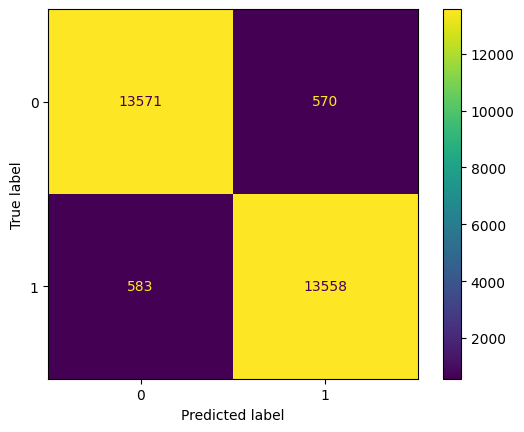

In [14]:
classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('catboost', CatBoostClassifier())
])

classification_param_grid = {
    'catboost__iterations': [100, 200, 300],
    'catboost__learning_rate': [0.01, 0.1, 0.2],
    'catboost__depth': [3, 4, 5]
}

run_classification(classification_pipeline, classification_param_grid, X, y)

### KNeighbors Classifier


Best Parameters:  {'knn__n_neighbors': 3}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     14141
           1       0.98      0.91      0.94     14141

    accuracy                           0.95     28282
   macro avg       0.95      0.95      0.95     28282
weighted avg       0.95      0.95      0.95     28282


R2 Score:  0.7843151120854254

AUC Score:  0.9753877373936867


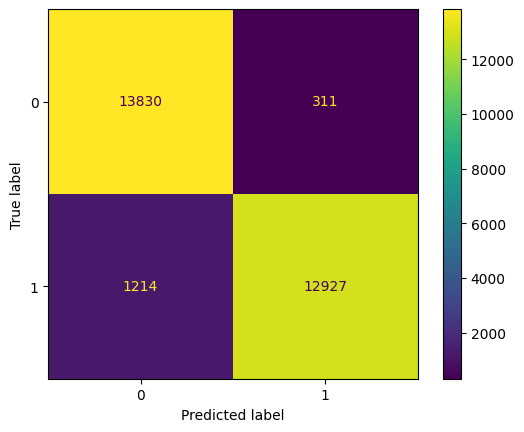

In [10]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10]
}

run_classification(pipeline_knn, param_grid_knn, X, y)

### RandomForest Classifier


Best Parameters:  {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 20}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     14141
           1       0.98      0.98      0.98     14141

    accuracy                           0.98     28282
   macro avg       0.98      0.98      0.98     28282
weighted avg       0.98      0.98      0.98     28282


R2 Score:  0.919524786083021

AUC Score:  0.9973235126695171


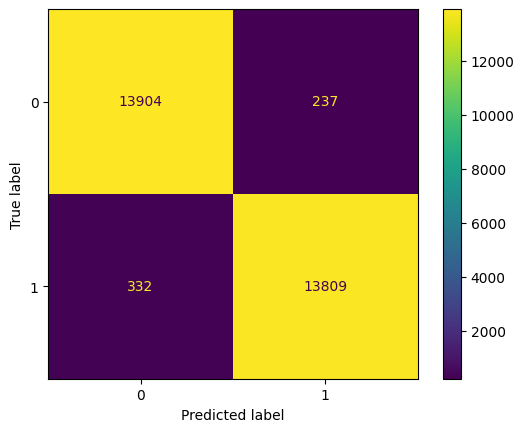

In [11]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

param_grid_rf = {
    'rf__n_estimators': [10, 20],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

run_classification(pipeline_rf, param_grid_rf, X, y)

### Conclusion

#### Extra Trees Classifier out performed other models in terms of overall metrics such as Accuracy, Precision, Recall, F1-score, R2 Score and AUC Score


Best Parameters:  {'et__max_depth': None, 'et__min_samples_leaf': 1, 'et__min_samples_split': 2, 'et__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     14141
           1       0.99      0.98      0.98     14141

    accuracy                           0.98     28282
   macro avg       0.98      0.98      0.98     28282
weighted avg       0.98      0.98      0.98     28282


R2 Score:  0.9383353369634396

AUC Score:  0.9981934273734689


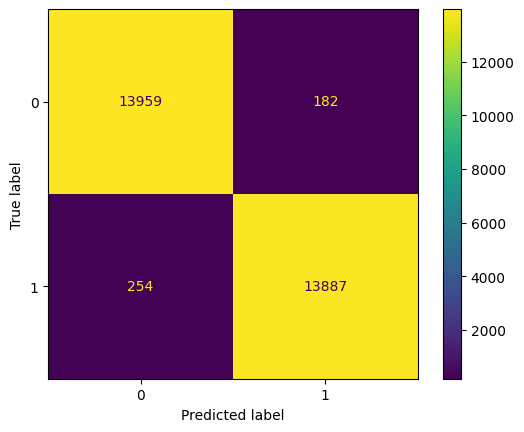

In [12]:
pipeline_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])

param_grid_et = {
    'et__n_estimators': [100],
    'et__max_depth': [None],
    'et__min_samples_split': [2],
    'et__min_samples_leaf': [1]
}

run_classification(pipeline_et, param_grid_et, X, y)

### Saving the model

In [13]:
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

pipeline_et.fit(X_train, y_train)

joblib.dump(pipeline_et, 'classification_model.joblib')

['classification_model_mod.joblib']

In [14]:
# Load the model from the file
loaded_model = joblib.load('classification_model.joblib')

# Use the loaded model for predictions
loaded_model.predict(X_test)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
# X_test.iloc[0,:]

In [ ]:
# y_test